# Real Time Facial Expression Recognition

## Description
Computer animated agents and robots bring new dimension in human computer interaction which makes it vital as how computers can affect our social life in day-to-day activities. Face to face communication is a real-time process operating at a a time scale in the order of milliseconds. The level of uncertainty at this time scale is considerable, making it necessary for humans and machines to rely on sensory rich perceptual primitives rather than slow symbolic inference processes.<br><br>
In this project we are presenting the real time facial expression recognition of seven most basic human expressions: ANGER, DISGUST, FEAR, HAPPY, NEUTRAL SAD, SURPRISE.<br><br>
This model can be used for prediction of expressions of both still images and real time video. However, in both the cases we have to provide image to the model. In case of real time video the image should be taken at any point in time and feed it to the model for prediction of expression. The system automatically detects face using HAAR cascade then its crops it and resize the image to a specific size and give it to the model for prediction. The model will generate seven probability values corresponding to seven expressions. The highest probability value to the corresponding expression will be the predicted expression for that image.<br><br>

## Business Problem
However, our goal here is to predict the human expressions, but we have trained our model on both human and animated images. Since, we had only approx 1500 human images which are very less to make a good model, so we took approximately 9000 animated images and leverage those animated images for training the model and ultimately do the prediction of expressions on human images.<br><br> 
For better prediction we have decided to keep the size of each image <b>350$*$350</b>.<br><br>
<b>For any image our goal is to predict the expression of the face in that image out of seven basic human expression</b>

## Problem Statement
<br>
<B>CLASSIFY THE EXPRESSION OF FACE IN IMAGE OUT OF SEVEN BASIC HUMAN EXPRESSION</B>

## Performance Metric
This is a multi-class classification problem with 7 different classes, so we have considered three performance metrics:<br>
1. Multi-Class Log-loss
2. Accuracy
3. Confusion Metric

## Source Data
We have downloaded data from 4 different sources.<br>
1. Human Images Source-1: http://www.consortium.ri.cmu.edu/ckagree/
2. Human Images Source-2: http://app.visgraf.impa.br/database/faces/
3. Human Images Source-3: http://www.kasrl.org/jaffe.html
4. Animated Images Source: https://grail.cs.washington.edu/projects/deepexpr/ferg-db.html

## Real-World Business Objective & Constraints
1. Low-latency is required.
2. Interpretability is important for still images but not in real time. For still images, probability of predicted expressions can be given.
3. Errors are not costly.

## Y- Encoded Labels
__Angry--1__<br>
__Disgust --2__<br>
__Fear--3__<br>
__Happy--4__<br>
__Neutral--5__<br>
__Sad--6__<br>
__Surprise--7__

## Mapping real-world to ML Problem

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import glob
import cv2
from sklearn.model_selection import train_test_split
from keras.layers import Dropout, Dense
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, load_model
from keras.applications import VGG16
from sklearn.metrics import accuracy_score, confusion_matrix

Using TensorFlow backend.


## 1. Reading the Data of Human Images

### Angry

In [2]:
human_angry = glob.glob("../Data/Humans/Angry/*")
print("Number of images in Angry emotion = "+str(len(human_angry)))

Number of images in Angry emotion = 206


In [3]:
human_angry_folderName = [str(i.split("\\")[0])+"/" for i in human_angry]
human_angry_imageName = [str(i.split("\\")[1]) for i in human_angry]
human_angry_emotion = [["Angry"]*len(human_angry)][0]
human_angry_label = [1]*len(human_angry)

len(human_angry_folderName), len(human_angry_imageName), len(human_angry_emotion), len(human_angry_label)

(206, 206, 206, 206)

In [4]:
df_angry = pd.DataFrame()
df_angry["folderName"] = human_angry_folderName
df_angry["imageName"] = human_angry_imageName
df_angry["Emotion"] = human_angry_emotion
df_angry["Labels"] = human_angry_label
df_angry.head()

folderName    imageName Emotion  Labels
0  ../Data/Humans/Angry/  AF01ANS.JPG   Angry       1
1  ../Data/Humans/Angry/  AF02ANS.JPG   Angry       1
2  ../Data/Humans/Angry/  AF03ANS.JPG   Angry       1
3  ../Data/Humans/Angry/  AF04ANS.jpg   Angry       1
4  ../Data/Humans/Angry/  AF05ANS.jpg   Angry       1

### Disgust

In [5]:
human_disgust = glob.glob("../Data/Humans/Disgust/*")
print("Number of images in Disgust emotion = "+str(len(human_disgust)))

Number of images in Disgust emotion = 205


In [6]:
human_disgust_folderName = [str(i.split("\\")[0])+"/" for i in human_disgust]
human_disgust_imageName = [str(i.split("\\")[1]) for i in human_disgust]
human_disgust_emotion = [["Disgust"]*len(human_disgust)][0]
human_disgust_label = [2]*len(human_disgust)

len(human_disgust_folderName), len(human_disgust_imageName), len(human_disgust_emotion), len(human_disgust_label)

(205, 205, 205, 205)

In [7]:
df_disgust = pd.DataFrame()
df_disgust["folderName"] = human_disgust_folderName
df_disgust["imageName"] = human_disgust_imageName
df_disgust["Emotion"] = human_disgust_emotion
df_disgust["Labels"] = human_disgust_label
df_disgust.head()

folderName    imageName  Emotion  Labels
0  ../Data/Humans/Disgust/  AF01DIS.JPG  Disgust       2
1  ../Data/Humans/Disgust/  AF02DIS.JPG  Disgust       2
2  ../Data/Humans/Disgust/  AF03DIS.JPG  Disgust       2
3  ../Data/Humans/Disgust/  AF04DIS.jpg  Disgust       2
4  ../Data/Humans/Disgust/  AF05DIS.jpg  Disgust       2

### Fear

In [8]:
human_fear = glob.glob("../Data/Humans/Fear/*")
print("Number of images in Fear emotion = "+str(len(human_fear)))

Number of images in Fear emotion = 207


In [9]:
human_fear_folderName = [str(i.split("\\")[0])+"/" for i in human_fear]
human_fear_imageName = [str(i.split("\\")[1]) for i in human_fear]
human_fear_emotion = [["Fear"]*len(human_fear)][0]
human_fear_label = [3]*len(human_fear)

len(human_fear_folderName), len(human_fear_imageName), len(human_fear_emotion), len(human_fear_label)

(207, 207, 207, 207)

In [10]:
df_fear = pd.DataFrame()
df_fear["folderName"] = human_fear_folderName
df_fear["imageName"] = human_fear_imageName
df_fear["Emotion"] = human_fear_emotion
df_fear["Labels"] = human_fear_label
df_fear.head()

folderName    imageName Emotion  Labels
0  ../Data/Humans/Fear/  AF01AFS.JPG    Fear       3
1  ../Data/Humans/Fear/  AF02AFS.JPG    Fear       3
2  ../Data/Humans/Fear/  AF03AFS.JPG    Fear       3
3  ../Data/Humans/Fear/  AF04AFS.jpg    Fear       3
4  ../Data/Humans/Fear/  AF05AFS.jpg    Fear       3

### Happy

In [11]:
human_happy = glob.glob("../Data/Humans/Happy/*")
print("Number of images in Happy emotion = "+str(len(human_happy)))

Number of images in Happy emotion = 207


In [12]:
human_happy_folderName = [str(i.split("\\")[0])+"/" for i in human_happy]
human_happy_imageName = [str(i.split("\\")[1]) for i in human_happy]
human_happy_emotion = [["Happy"]*len(human_happy)][0]
human_happy_label = [4]*len(human_happy)

len(human_happy_folderName), len(human_happy_imageName), len(human_happy_emotion), len(human_happy_label)

(207, 207, 207, 207)

In [13]:
df_happy = pd.DataFrame()
df_happy["folderName"] = human_happy_folderName
df_happy["imageName"] = human_happy_imageName
df_happy["Emotion"] = human_happy_emotion
df_happy["Labels"] = human_happy_label
df_happy.head()

folderName    imageName Emotion  Labels
0  ../Data/Humans/Happy/  AF01HAS.JPG   Happy       4
1  ../Data/Humans/Happy/  AF02HAS.JPG   Happy       4
2  ../Data/Humans/Happy/  AF03HAS.JPG   Happy       4
3  ../Data/Humans/Happy/  AF04HAS.jpg   Happy       4
4  ../Data/Humans/Happy/  AF05HAS.jpg   Happy       4

### Neutral

In [14]:
human_neutral = glob.glob("../Data/Humans/Neutral/*")
print("Number of images in Neutral emotion = "+str(len(human_neutral)))

Number of images in Neutral emotion = 206


In [15]:
human_neutral_folderName = [str(i.split("\\")[0])+"/" for i in human_neutral]
human_neutral_imageName = [str(i.split("\\")[1]) for i in human_neutral]
human_neutral_emotion = [["Neutral"]*len(human_neutral)][0]
human_neutral_label = [5]*len(human_neutral)

len(human_neutral_folderName), len(human_neutral_imageName), len(human_neutral_emotion), len(human_neutral_label)

(206, 206, 206, 206)

In [16]:
df_neutral = pd.DataFrame()
df_neutral["folderName"] = human_neutral_folderName
df_neutral["imageName"] = human_neutral_imageName
df_neutral["Emotion"] = human_neutral_emotion
df_neutral["Labels"] = human_neutral_label
df_neutral.head()

folderName    imageName  Emotion  Labels
0  ../Data/Humans/Neutral/  AF01NES.JPG  Neutral       5
1  ../Data/Humans/Neutral/  AF02NES.JPG  Neutral       5
2  ../Data/Humans/Neutral/  AF03NES.JPG  Neutral       5
3  ../Data/Humans/Neutral/  AF04NES.jpg  Neutral       5
4  ../Data/Humans/Neutral/  AF05NES.jpg  Neutral       5

### Sad

In [17]:
human_sad = glob.glob("../Data/Humans/Sad/*")
print("Number of images in Sad emotion = "+str(len(human_sad)))

Number of images in Sad emotion = 206


In [18]:
human_sad_folderName = [str(i.split("\\")[0])+"/" for i in human_sad]
human_sad_imageName = [str(i.split("\\")[1]) for i in human_sad]
human_sad_emotion = [["Sad"]*len(human_sad)][0]
human_sad_label = [6]*len(human_sad)

len(human_sad_folderName), len(human_sad_imageName), len(human_sad_emotion), len(human_sad_label)

(206, 206, 206, 206)

In [19]:
df_sad = pd.DataFrame()
df_sad["folderName"] = human_sad_folderName
df_sad["imageName"] = human_sad_imageName
df_sad["Emotion"] = human_sad_emotion
df_sad["Labels"] = human_sad_label
df_sad.head()

folderName    imageName Emotion  Labels
0  ../Data/Humans/Sad/  AF01SAS.jpg     Sad       6
1  ../Data/Humans/Sad/  AF02SAS.jpg     Sad       6
2  ../Data/Humans/Sad/  AF03SAS.jpg     Sad       6
3  ../Data/Humans/Sad/  AF04SAS.jpg     Sad       6
4  ../Data/Humans/Sad/  AF05SAS.jpg     Sad       6

### Surprise

In [20]:
human_surprise = glob.glob("../Data/Humans/Surprise/*")
print("Number of images in Surprise emotion = "+str(len(human_surprise)))

Number of images in Surprise emotion = 206


In [21]:
human_surprise_folderName = [str(i.split("\\")[0])+"/" for i in human_surprise]
human_surprise_imageName = [str(i.split("\\")[1]) for i in human_surprise]
human_surprise_emotion = [["Surprise"]*len(human_surprise)][0]
human_surprise_label = [7]*len(human_surprise)

len(human_surprise_folderName), len(human_surprise_imageName), len(human_surprise_emotion), len(human_surprise_label)

(206, 206, 206, 206)

In [22]:
df_surprise = pd.DataFrame()
df_surprise["folderName"] = human_surprise_folderName
df_surprise["imageName"] = human_surprise_imageName
df_surprise["Emotion"] = human_surprise_emotion
df_surprise["Labels"] = human_surprise_label
df_surprise.head()

folderName    imageName   Emotion  Labels
0  ../Data/Humans/Surprise/  AF01SUS.JPG  Surprise       7
1  ../Data/Humans/Surprise/  AF02SUS.JPG  Surprise       7
2  ../Data/Humans/Surprise/  AF03SUS.jpg  Surprise       7
3  ../Data/Humans/Surprise/  AF04SUS.jpg  Surprise       7
4  ../Data/Humans/Surprise/  AF05SUS.jpg  Surprise       7

In [23]:
length = df_angry.shape[0] + df_disgust.shape[0] + df_fear.shape[0] + df_happy.shape[0] + df_neutral.shape[0] + df_sad.shape[0] + df_surprise.shape[0]
print("Total number of images in all the emotions = "+str(length))

Total number of images in all the emotions = 1443


### Concatenating all dataframes

In [24]:
frames = [df_angry, df_disgust, df_fear, df_happy, df_neutral, df_sad, df_surprise]
Final_human = pd.concat(frames)
Final_human.shape

(1443, 4)

In [25]:
Final_human.reset_index(inplace = True, drop = True)
Final_human = Final_human.sample(frac = 1.0)   #shuffling the dataframe
Final_human.reset_index(inplace = True, drop = True)
Final_human.head()

folderName        imageName  Emotion  Labels
0      ../Data/Humans/Sad/  s012-02_img.tif      Sad       6
1    ../Data/Humans/Happy/      BF27HAS.jpg    Happy       4
2  ../Data/Humans/Neutral/      BM35NES.jpg  Neutral       5
3  ../Data/Humans/Disgust/  s009-05_img.tif  Disgust       2
4      ../Data/Humans/Sad/  s009-02_img.tif      Sad       6

## 2. Train, CV and Test Split for Human Images

In [26]:
df_human_train_data, df_human_test = train_test_split(Final_human, stratify=Final_human["Labels"], test_size = 0.197860)
df_human_train, df_human_cv = train_test_split(df_human_train_data, stratify=df_human_train_data["Labels"], test_size = 0.166666)
df_human_train.shape, df_human_cv.shape, df_human_test.shape 

((964, 4), (193, 4), (286, 4))

In [27]:
df_human_train.reset_index(inplace = True, drop = True)
df_human_train.to_pickle("../Data/Dataframes/Humans/df_human_train.pkl")

df_human_cv.reset_index(inplace = True, drop = True)
df_human_cv.to_pickle("../Data/Dataframes/Humans/df_human_cv.pkl")

df_human_test.reset_index(inplace = True, drop = True)
df_human_test.to_pickle("../Data/Dataframes/Humans/df_human_test.pkl")

In [28]:
df_human_train = pd.read_pickle("../Data/Dataframes/Humans/df_human_train.pkl")
df_human_train.head()

folderName        imageName   Emotion  Labels
0      ../Data/Humans/Fear/      AM24AFS.jpg      Fear       3
1   ../Data/Humans/Disgust/  s010-05_img.tif   Disgust       2
2      ../Data/Humans/Fear/      BF14AFS.jpg      Fear       3
3     ../Data/Humans/Happy/      BF25HAS.jpg     Happy       4
4  ../Data/Humans/Surprise/      BF17SUS.jpg  Surprise       7

In [29]:
df_human_train.shape

(964, 4)

In [30]:
df_human_cv = pd.read_pickle("../Data/Dataframes/Humans/df_human_cv.pkl")
df_human_cv.head()

folderName        imageName   Emotion  Labels
0  ../Data/Humans/Surprise/      AM05SUS.jpg  Surprise       7
1     ../Data/Humans/Angry/      BM09ANS.jpg     Angry       1
2       ../Data/Humans/Sad/  NA.SA3.207.tiff       Sad       6
3      ../Data/Humans/Fear/      BM07AFS.jpg      Fear       3
4   ../Data/Humans/Neutral/      AM05NES.jpg   Neutral       5

In [31]:
df_human_cv.shape

(193, 4)

In [32]:
df_human_test = pd.read_pickle("../Data/Dataframes/Humans/df_human_test.pkl")
df_human_test.head()

folderName    imageName   Emotion  Labels
0   ../Data/Humans/Neutral/  AF01NES.JPG   Neutral       5
1     ../Data/Humans/Happy/  BM23HAS.jpg     Happy       4
2  ../Data/Humans/Surprise/  BF07SUS.jpg  Surprise       7
3   ../Data/Humans/Disgust/  BM35DIS.jpg   Disgust       2
4   ../Data/Humans/Neutral/  AF23NES.jpg   Neutral       5

In [33]:
df_human_test.shape

(286, 4)

## 3. Analysing Data of Human Images
### Distribution of class labels in Train, CV and Test

In [34]:
df_temp_train = df_human_train.sort_values(by = "Labels", inplace = False)
df_temp_cv = df_human_cv.sort_values(by = "Labels", inplace = False)
df_temp_test = df_human_test.sort_values(by = "Labels", inplace = False)

TrainData_distribution = df_human_train["Emotion"].value_counts().sort_index()
CVData_distribution = df_human_cv["Emotion"].value_counts().sort_index()
TestData_distribution = df_human_test["Emotion"].value_counts().sort_index()

TrainData_distribution_sorted = sorted(TrainData_distribution.items(), key = lambda d: d[1], reverse = True)
CVData_distribution_sorted = sorted(CVData_distribution.items(), key = lambda d: d[1], reverse = True)
TestData_distribution_sorted = sorted(TestData_distribution.items(), key = lambda d: d[1], reverse = True)

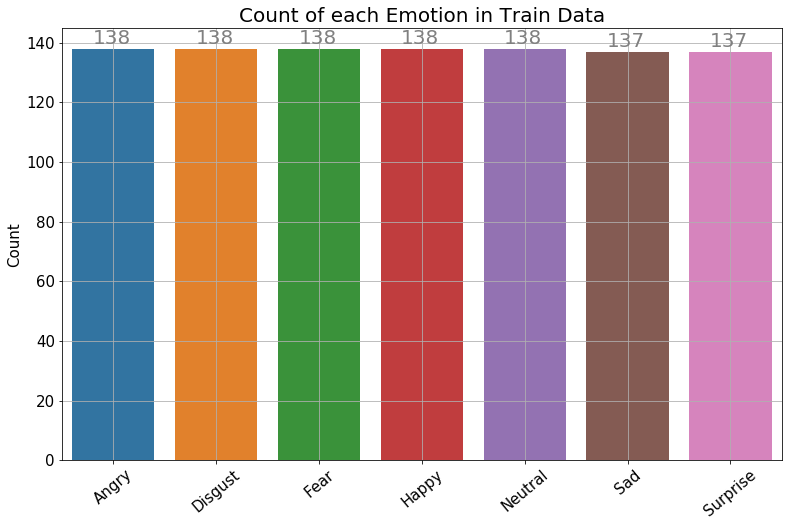

Number of training data points in class Angry = 138(14.3154%)
Number of training data points in class Disgust = 138(14.3154%)
Number of training data points in class Fear = 138(14.3154%)
Number of training data points in class Happy = 138(14.3154%)
Number of training data points in class Neutral = 138(14.3154%)
Number of training data points in class Sad = 137(14.2116%)
Number of training data points in class Surprise = 137(14.2116%)
--------------------------------------------------------------------------------


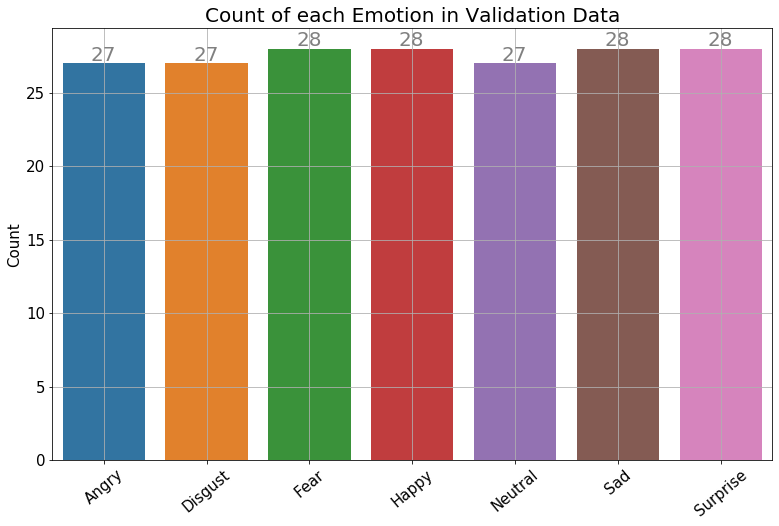

Number of training data points in class Fear = 28(14.5078%)
Number of training data points in class Happy = 28(14.5078%)
Number of training data points in class Sad = 28(14.5078%)
Number of training data points in class Surprise = 28(14.5078%)
Number of training data points in class Angry = 27(13.9896%)
Number of training data points in class Disgust = 27(13.9896%)
Number of training data points in class Neutral = 27(13.9896%)
--------------------------------------------------------------------------------


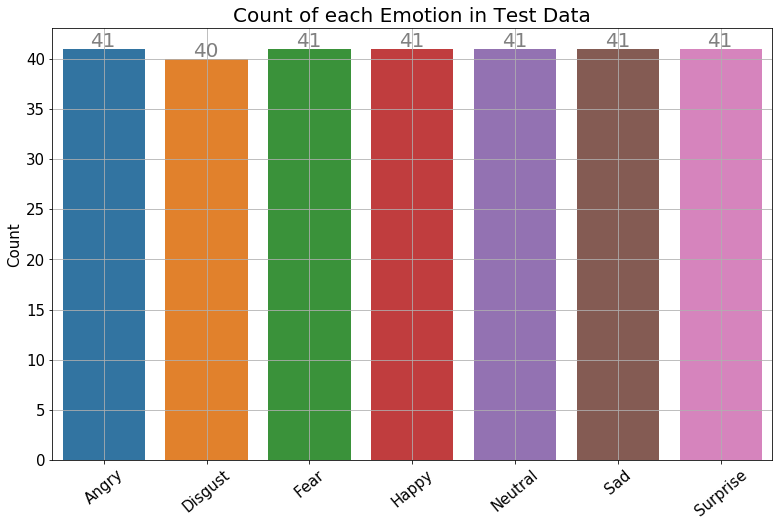

Number of training data points in class Angry = 41(14.3357%)
Number of training data points in class Fear = 41(14.3357%)
Number of training data points in class Happy = 41(14.3357%)
Number of training data points in class Neutral = 41(14.3357%)
Number of training data points in class Sad = 41(14.3357%)
Number of training data points in class Surprise = 41(14.3357%)
Number of training data points in class Disgust = 40(13.986%)


In [35]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Train Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_train)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+1.5, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in TrainData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_train.shape[0])*100), 4))+"%)")

print("-"*80)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Validation Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_cv)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.27, y = i.get_height()+0.2, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in CVData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_cv.shape[0])*100), 4))+"%)")

print("-"*80)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Test Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_test)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.27, y = i.get_height()+0.2, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in TestData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_test.shape[0])*100), 4))+"%)")

## 4. Pre-Processing Human Images

### 4.1 Converting all the images to grayscale and save them

In [200]:
def convt_to_gray(df):
    count = 0
    for i in range(len(df)):
        path1 = df["folderName"][i]
        path2 = df["imageName"][i]
        img = cv2.imread(os.path.join(path1, path2))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(path1, path2), gray)
        count += 1
    print("Total number of images converted and saved = "+str(count))

In [201]:
convt_to_gray(df_human_train)

Total number of images converted and saved = 964


In [202]:
convt_to_gray(df_human_cv)

Total number of images converted and saved = 193


In [203]:
convt_to_gray(df_human_test)

Total number of images converted and saved = 286


### 4.2 Detecting face in image using HAAR then crop it then resize then save the image

In [204]:
#detect the face in image using HAAR cascade then crop it then resize it and finally save it.
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
#download this xml file from link: https://github.com/opencv/opencv/tree/master/data/haarcascades.
def face_det_crop_resize(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:
        face_clip = img[y:y+h, x:x+w]  #cropping the face in image
        cv2.imwrite(img_path, cv2.resize(face_clip, (350, 350)))  #resizing image then saving it

In [205]:
for i, d in df_human_train.iterrows():
    img_path = os.path.join(d["folderName"], d["imageName"])
    face_det_crop_resize(img_path)

In [206]:
for i, d in df_human_cv.iterrows():
    img_path = os.path.join(d["folderName"], d["imageName"])
    face_det_crop_resize(img_path)

In [207]:
for i, d in df_human_test.iterrows():
    img_path = os.path.join(d["folderName"], d["imageName"])
    face_det_crop_resize(img_path)

## 5. Reading the Data of Animated Images

### Angry

In [36]:
anime_angry = glob.glob("../Data/Animated/Angry/*.png")
print("Number of images in Angry emotion = "+str(len(anime_angry)))

Number of images in Angry emotion = 1300


In [37]:
anime_angry_folderName = [str(i.split("\\")[0])+"/" for i in anime_angry]
anime_angry_imageName = [str(i.split("\\")[1]) for i in anime_angry]
anime_angry_emotion = [["Angry"]*len(anime_angry)][0]
anime_angry_label = [1]*len(anime_angry)

len(anime_angry_folderName), len(anime_angry_imageName), len(anime_angry_emotion), len(anime_angry_label)

(1300, 1300, 1300, 1300)

In [38]:
df_angry = pd.DataFrame()
df_angry["folderName"] = anime_angry_folderName
df_angry["imageName"] = anime_angry_imageName
df_angry["Emotion"] = anime_angry_emotion
df_angry["Labels"] = anime_angry_label
df_angry.head()

folderName           imageName Emotion  Labels
0  ../Data/Animated/Angry/  aia_anger_1003.png   Angry       1
1  ../Data/Animated/Angry/  aia_anger_1004.png   Angry       1
2  ../Data/Animated/Angry/  aia_anger_1009.png   Angry       1
3  ../Data/Animated/Angry/   aia_anger_101.png   Angry       1
4  ../Data/Animated/Angry/  aia_anger_1014.png   Angry       1

In [39]:
df_angry = df_angry.sample(frac = 1.0) #shuffling dataframe
df_angry_reduced = df_angry.sample(n = 1300)  #taking only 1300 random images
df_angry_reduced.shape

(1300, 4)

In [40]:
#removing all the extra images from storage
df_angry_reducedIndx = df_angry_reduced.index
count = 0
for i, d in df_angry.iterrows():
    if i not in df_angry_reducedIndx:
        os.remove(os.path.join(d["folderName"], d["imageName"]))
        count += 1
print("Total number of images removed = "+str(count))

Total number of images removed = 0


### Disgust

In [41]:
anime_disgust = glob.glob("../Data/Animated/Disgust/*.png")
print("Number of images in Disgust emotion = "+str(len(anime_disgust)))

Number of images in Disgust emotion = 1300


In [42]:
anime_disgust_folderName = [str(i.split("\\")[0])+"/" for i in anime_disgust]
anime_disgust_imageName = [str(i.split("\\")[1]) for i in anime_disgust]
anime_disgust_emotion = [["Disgust"]*len(anime_disgust)][0]
anime_disgust_label = [2]*len(anime_disgust)

len(anime_disgust_folderName), len(anime_disgust_imageName), len(anime_disgust_emotion), len(anime_disgust_label)

(1300, 1300, 1300, 1300)

In [43]:
df_disgust = pd.DataFrame()
df_disgust["folderName"] = anime_disgust_folderName
df_disgust["imageName"] = anime_disgust_imageName
df_disgust["Emotion"] = anime_disgust_emotion
df_disgust["Labels"] = anime_disgust_label
df_disgust.head()

folderName             imageName  Emotion  Labels
0  ../Data/Animated/Disgust/  aia_disgust_1020.png  Disgust       2
1  ../Data/Animated/Disgust/  aia_disgust_1028.png  Disgust       2
2  ../Data/Animated/Disgust/   aia_disgust_103.png  Disgust       2
3  ../Data/Animated/Disgust/  aia_disgust_1031.png  Disgust       2
4  ../Data/Animated/Disgust/  aia_disgust_1039.png  Disgust       2

In [44]:
df_disgust = df_disgust.sample(frac = 1.0) #shuffling dataframe
df_disgust_reduced = df_disgust.sample(n = 1300)  #taking only 1300 random images
df_disgust_reduced.shape

(1300, 4)

In [45]:
#removing all the extra images from storage
df_disgust_reducedIndx = df_disgust_reduced.index
count = 0
for i, d in df_disgust.iterrows():
    if i not in df_disgust_reducedIndx:
        os.remove(os.path.join(d["folderName"], d["imageName"]))
        count += 1
print("Total number of images removed = "+str(count))

Total number of images removed = 0


### Fear

In [46]:
anime_fear = glob.glob("../Data/Animated/Fear/*.png")
print("Number of images in Fear emotion = "+str(len(anime_fear)))

Number of images in Fear emotion = 1300


In [47]:
anime_fear_folderName = [str(i.split("\\")[0])+"/" for i in anime_fear]
anime_fear_imageName = [str(i.split("\\")[1]) for i in anime_fear]
anime_fear_emotion = [["Fear"]*len(anime_fear)][0]
anime_fear_label = [3]*len(anime_fear)

len(anime_fear_folderName), len(anime_fear_imageName), len(anime_fear_emotion), len(anime_fear_label)

(1300, 1300, 1300, 1300)

In [48]:
df_fear = pd.DataFrame()
df_fear["folderName"] = anime_fear_folderName
df_fear["imageName"] = anime_fear_imageName
df_fear["Emotion"] = anime_fear_emotion
df_fear["Labels"] = anime_fear_label
df_fear.head()

folderName          imageName Emotion  Labels
0  ../Data/Animated/Fear/     aia_fear_1.png    Fear       3
1  ../Data/Animated/Fear/  aia_fear_1002.png    Fear       3
2  ../Data/Animated/Fear/  aia_fear_1008.png    Fear       3
3  ../Data/Animated/Fear/  aia_fear_1012.png    Fear       3
4  ../Data/Animated/Fear/  aia_fear_1016.png    Fear       3

In [49]:
df_fear = df_fear.sample(frac = 1.0) #shuffling dataframe
df_fear_reduced = df_fear.sample(n = 1300)  #taking only 1300 random images
df_fear_reduced.shape

(1300, 4)

In [50]:
#removing all the extra images from storage
df_fear_reducedIndx = df_fear_reduced.index
count = 0
for i, d in df_fear.iterrows():
    if i not in df_fear_reducedIndx:
        os.remove(os.path.join(d["folderName"], d["imageName"]))
        count += 1
print("Total number of images removed = "+str(count))

Total number of images removed = 0


### Happy

In [51]:
anime_happy = glob.glob("../Data/Animated/Happy/*.png")
print("Number of images in Happy emotion = "+str(len(anime_happy)))

Number of images in Happy emotion = 1300


In [52]:
anime_happy_folderName = [str(i.split("\\")[0])+"/" for i in anime_happy]
anime_happy_imageName = [str(i.split("\\")[1]) for i in anime_happy]
anime_happy_emotion = [["Happy"]*len(anime_happy)][0]
anime_happy_label = [4]*len(anime_happy)

len(anime_happy_folderName), len(anime_happy_imageName), len(anime_happy_emotion), len(anime_happy_label)

(1300, 1300, 1300, 1300)

In [53]:
df_happy = pd.DataFrame()
df_happy["folderName"] = anime_happy_folderName
df_happy["imageName"] = anime_happy_imageName
df_happy["Emotion"] = anime_happy_emotion
df_happy["Labels"] = anime_happy_label
df_happy.head()

folderName         imageName Emotion  Labels
0  ../Data/Animated/Happy/     aia_joy_1.png   Happy       4
1  ../Data/Animated/Happy/   aia_joy_100.png   Happy       4
2  ../Data/Animated/Happy/  aia_joy_1004.png   Happy       4
3  ../Data/Animated/Happy/  aia_joy_1011.png   Happy       4
4  ../Data/Animated/Happy/  aia_joy_1012.png   Happy       4

In [54]:
df_happy = df_happy.sample(frac = 1.0) #shuffling dataframe
df_happy_reduced = df_happy.sample(n = 1300)  #taking only 1300 random images
df_happy_reduced.shape

(1300, 4)

In [55]:
#removing all the extra images from storage
df_happy_reducedIndx = df_happy_reduced.index
count = 0
for i, d in df_happy.iterrows():
    if i not in df_happy_reducedIndx:
        os.remove(os.path.join(d["folderName"], d["imageName"]))
        count += 1
print("Total number of images removed = "+str(count))

Total number of images removed = 0


### Neutral

In [56]:
anime_neutral = glob.glob("../Data/Animated/Neutral/*.png")
print("Number of images in Neutral emotion = "+str(len(anime_neutral)))

Number of images in Neutral emotion = 1300


In [57]:
anime_neutral_folderName = [str(i.split("\\")[0])+"/" for i in anime_neutral]
anime_neutral_imageName = [str(i.split("\\")[1]) for i in anime_neutral]
anime_neutral_emotion = [["Neutral"]*len(anime_neutral)][0]
anime_neutral_label = [5]*len(anime_neutral)

len(anime_neutral_folderName), len(anime_neutral_imageName), len(anime_neutral_emotion), len(anime_neutral_label)

(1300, 1300, 1300, 1300)

In [58]:
df_neutral = pd.DataFrame()
df_neutral["folderName"] = anime_neutral_folderName
df_neutral["imageName"] = anime_neutral_imageName
df_neutral["Emotion"] = anime_neutral_emotion
df_neutral["Labels"] = anime_neutral_label
df_neutral.head()

folderName             imageName  Emotion  Labels
0  ../Data/Animated/Neutral/     aia_neutral_1.png  Neutral       5
1  ../Data/Animated/Neutral/    aia_neutral_10.png  Neutral       5
2  ../Data/Animated/Neutral/   aia_neutral_100.png  Neutral       5
3  ../Data/Animated/Neutral/  aia_neutral_1002.png  Neutral       5
4  ../Data/Animated/Neutral/  aia_neutral_1003.png  Neutral       5

In [59]:
df_neutral = df_neutral.sample(frac = 1.0) #shuffling dataframe
df_neutral_reduced = df_neutral.sample(n = 1300)  #taking only 1300 random images
df_neutral_reduced.shape

(1300, 4)

In [60]:
#removing all the extra images from storage
df_neutral_reducedIndx = df_neutral_reduced.index
count = 0
for i, d in df_neutral.iterrows():
    if i not in df_neutral_reducedIndx:
        os.remove(os.path.join(d["folderName"], d["imageName"]))
        count += 1
print("Total number of images removed = "+str(count))

Total number of images removed = 0


### Sad

In [61]:
anime_sad = glob.glob("../Data/Animated/Sad/*.png")
print("Number of images in Sad emotion = "+str(len(anime_sad)))

Number of images in Sad emotion = 1300


In [62]:
anime_sad_folderName = [str(i.split("\\")[0])+"/" for i in anime_sad]
anime_sad_imageName = [str(i.split("\\")[1]) for i in anime_sad]
anime_sad_emotion = [["Sad"]*len(anime_sad)][0]
anime_sad_label = [6]*len(anime_sad)

len(anime_sad_folderName), len(anime_sad_imageName), len(anime_sad_emotion), len(anime_sad_label)

(1300, 1300, 1300, 1300)

In [63]:
df_sad = pd.DataFrame()
df_sad["folderName"] = anime_sad_folderName
df_sad["imageName"] = anime_sad_imageName
df_sad["Emotion"] = anime_sad_emotion
df_sad["Labels"] = anime_sad_label
df_sad.head()

folderName             imageName Emotion  Labels
0  ../Data/Animated/Sad/    aia_sadness_10.png     Sad       6
1  ../Data/Animated/Sad/  aia_sadness_1005.png     Sad       6
2  ../Data/Animated/Sad/  aia_sadness_1006.png     Sad       6
3  ../Data/Animated/Sad/  aia_sadness_1009.png     Sad       6
4  ../Data/Animated/Sad/  aia_sadness_1022.png     Sad       6

In [64]:
df_sad = df_sad.sample(frac = 1.0) #shuffling dataframe
df_sad_reduced = df_sad.sample(n = 1300)  #taking only 1300 random images
df_sad_reduced.shape

(1300, 4)

In [65]:
#removing all the extra images from storage
df_sad_reducedIndx = df_sad_reduced.index
count = 0
for i, d in df_sad.iterrows():
    if i not in df_sad_reducedIndx:
        os.remove(os.path.join(d["folderName"], d["imageName"]))
        count += 1
print("Total number of images removed = "+str(count))

Total number of images removed = 0


### Surprise

In [66]:
anime_surprise = glob.glob("../Data/Animated/Surprise/*.png")
print("Number of images in Surprise emotion = "+str(len(anime_surprise)))

Number of images in Surprise emotion = 1300


In [67]:
anime_surprise_folderName = [str(i.split("\\")[0])+"/" for i in anime_surprise]
anime_surprise_imageName = [str(i.split("\\")[1]) for i in anime_surprise]
anime_surprise_emotion = [["Surprise"]*len(anime_surprise)][0]
anime_surprise_label = [7]*len(anime_surprise)

len(anime_surprise_folderName), len(anime_surprise_imageName), len(anime_surprise_emotion), len(anime_surprise_label)

(1300, 1300, 1300, 1300)

In [68]:
df_surprise = pd.DataFrame()
df_surprise["folderName"] = anime_surprise_folderName
df_surprise["imageName"] = anime_surprise_imageName
df_surprise["Emotion"] = anime_surprise_emotion
df_surprise["Labels"] = anime_surprise_label
df_surprise.head()

folderName              imageName   Emotion  Labels
0  ../Data/Animated/Surprise/  aia_surprise_1004.png  Surprise       7
1  ../Data/Animated/Surprise/  aia_surprise_1011.png  Surprise       7
2  ../Data/Animated/Surprise/  aia_surprise_1032.png  Surprise       7
3  ../Data/Animated/Surprise/  aia_surprise_1036.png  Surprise       7
4  ../Data/Animated/Surprise/  aia_surprise_1039.png  Surprise       7

In [69]:
df_surprise = df_surprise.sample(frac = 1.0) #shuffling dataframe
df_surprise_reduced = df_surprise.sample(n = 1300)  #taking only 1300 random images
df_surprise_reduced.shape

(1300, 4)

In [70]:
#removing all the extra images from storage
df_surprise_reducedIndx = df_surprise_reduced.index
count = 0
for i, d in df_surprise.iterrows():
    if i not in df_surprise_reducedIndx:
        os.remove(os.path.join(d["folderName"], d["imageName"]))
        count += 1
print("Total number of images removed = "+str(count))

Total number of images removed = 0


### Concatenating all Datafames

In [71]:
frames = [df_angry_reduced, df_disgust_reduced, df_fear_reduced, df_happy_reduced, df_neutral_reduced, df_sad_reduced, df_surprise_reduced]
Final_Animated = pd.concat(frames)
Final_Animated.shape

(9100, 4)

In [72]:
Final_Animated.reset_index(inplace = True, drop = True)
Final_Animated = Final_Animated.sample(frac = 1.0)   #shuffling the dataframe
Final_Animated.reset_index(inplace = True, drop = True)
Final_Animated.head()

folderName                imageName  Emotion  Labels
0  ../Data/Animated/Neutral/  malcolm_neutral_585.png  Neutral       5
1    ../Data/Animated/Angry/      mery_anger_1034.png    Angry       1
2  ../Data/Animated/Neutral/      aia_neutral_120.png  Neutral       5
3    ../Data/Animated/Happy/     malcolm_joy_1017.png    Happy       4
4    ../Data/Animated/Happy/      malcolm_joy_695.png    Happy       4

## 6. Train, CV and Test Split for Animated Images

In [73]:
df_anime_train_data, df_anime_test = train_test_split(Final_Animated, stratify=Final_Animated["Labels"], test_size = 0.131868)
df_anime_train, df_anime_cv = train_test_split(df_anime_train_data, stratify=df_anime_train_data["Labels"], test_size = 0.088607)
df_anime_train.shape, df_anime_cv.shape, df_anime_test.shape

((7200, 4), (700, 4), (1200, 4))

In [74]:
df_anime_train.reset_index(inplace = True, drop = True)
df_anime_train.to_pickle("../Data/Dataframes/Animated/df_anime_train.pkl")

df_anime_cv.reset_index(inplace = True, drop = True)
df_anime_cv.to_pickle("../Data/Dataframes/Animated/df_anime_cv.pkl")

df_anime_test.reset_index(inplace = True, drop = True)
df_anime_test.to_pickle("../Data/Dataframes/Animated/df_anime_test.pkl")

In [75]:
df_anime_train = pd.read_pickle("../Data/Dataframes/Animated/df_anime_train.pkl")
df_anime_train.head()

folderName              imageName Emotion  Labels
0   ../Data/Animated/Fear/      aia_fear_1086.png    Fear       3
1  ../Data/Animated/Happy/        aia_joy_941.png   Happy       4
2  ../Data/Animated/Angry/  malcolm_anger_226.png   Angry       1
3  ../Data/Animated/Angry/      ray_anger_569.png   Angry       1
4  ../Data/Animated/Happy/       mery_joy_241.png   Happy       4

In [76]:
df_anime_train.shape

(7200, 4)

In [77]:
df_anime_cv = pd.read_pickle("../Data/Dataframes/Animated/df_anime_cv.pkl")
df_anime_cv.head()

folderName                 imageName   Emotion  Labels
0     ../Data/Animated/Happy/           ray_joy_381.png     Happy       4
1      ../Data/Animated/Fear/         jules_fear_32.png      Fear       3
2   ../Data/Animated/Neutral/   malcolm_neutral_866.png   Neutral       5
3      ../Data/Animated/Fear/        jules_fear_670.png      Fear       3
4  ../Data/Animated/Surprise/  bonnie_surprise_1464.png  Surprise       7

In [78]:
df_anime_cv.shape

(700, 4)

In [79]:
df_anime_test = pd.read_pickle("../Data/Dataframes/Animated/df_anime_test.pkl")
df_anime_test.tail(10)

folderName                imageName   Emotion  Labels
1190     ../Data/Animated/Angry/        aia_anger_640.png     Angry       1
1191       ../Data/Animated/Sad/     mery_sadness_472.png       Sad       6
1192      ../Data/Animated/Fear/         ray_fear_328.png      Fear       3
1193     ../Data/Animated/Angry/        ray_anger_336.png     Angry       1
1194       ../Data/Animated/Sad/   malcolm_sadness_64.png       Sad       6
1195      ../Data/Animated/Fear/        ray_fear_1026.png      Fear       3
1196  ../Data/Animated/Surprise/    jules_surprise_67.png  Surprise       7
1197  ../Data/Animated/Surprise/    ray_surprise_1187.png  Surprise       7
1198  ../Data/Animated/Surprise/    mery_surprise_781.png  Surprise       7
1199  ../Data/Animated/Surprise/  bonnie_surprise_457.png  Surprise       7

In [80]:
df_anime_test.shape

(1200, 4)

## 7. Analysing Data of Animated Images
### Distribution of class labels in Train, CV and Test

In [81]:
df_temp_train = df_anime_train.sort_values(by = "Labels", inplace = False)
df_temp_cv = df_anime_cv.sort_values(by = "Labels", inplace = False)
df_temp_test = df_anime_test.sort_values(by = "Labels", inplace = False)

TrainData_distribution = df_anime_train["Emotion"].value_counts().sort_index()
CVData_distribution = df_anime_cv["Emotion"].value_counts().sort_index()
TestData_distribution = df_anime_test["Emotion"].value_counts().sort_index()

TrainData_distribution_sorted = sorted(TrainData_distribution.items(), key = lambda d: d[1], reverse = True)
CVData_distribution_sorted = sorted(CVData_distribution.items(), key = lambda d: d[1], reverse = True)
TestData_distribution_sorted = sorted(TestData_distribution.items(), key = lambda d: d[1], reverse = True)

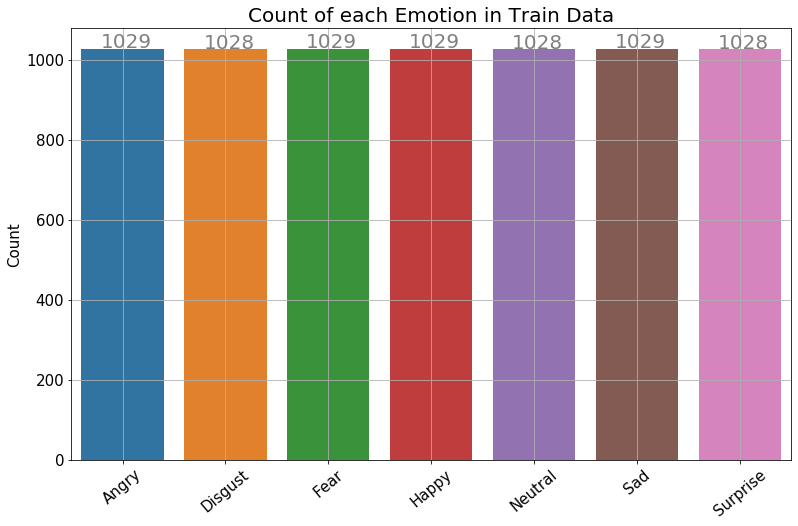

Number of training data points in class Angry = 1029(14.2917%)
Number of training data points in class Fear = 1029(14.2917%)
Number of training data points in class Happy = 1029(14.2917%)
Number of training data points in class Sad = 1029(14.2917%)
Number of training data points in class Disgust = 1028(14.2778%)
Number of training data points in class Neutral = 1028(14.2778%)
Number of training data points in class Surprise = 1028(14.2778%)
--------------------------------------------------------------------------------


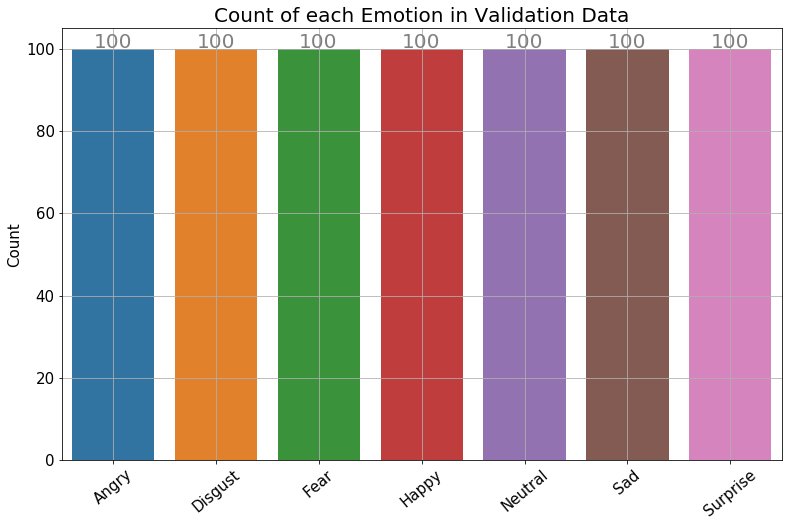

Number of training data points in class Angry = 100(14.2857%)
Number of training data points in class Disgust = 100(14.2857%)
Number of training data points in class Fear = 100(14.2857%)
Number of training data points in class Happy = 100(14.2857%)
Number of training data points in class Neutral = 100(14.2857%)
Number of training data points in class Sad = 100(14.2857%)
Number of training data points in class Surprise = 100(14.2857%)
--------------------------------------------------------------------------------


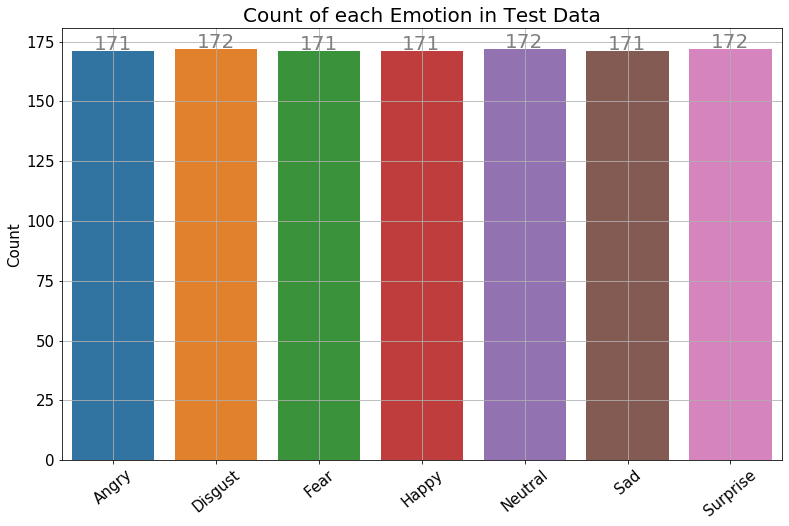

Number of training data points in class Disgust = 172(14.3333%)
Number of training data points in class Neutral = 172(14.3333%)
Number of training data points in class Surprise = 172(14.3333%)
Number of training data points in class Angry = 171(14.25%)
Number of training data points in class Fear = 171(14.25%)
Number of training data points in class Happy = 171(14.25%)
Number of training data points in class Sad = 171(14.25%)


In [82]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Train Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_train)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.185, y = i.get_height()+1.6, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in TrainData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_train.shape[0])*100), 4))+"%)")

print("-"*80)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Validation Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_cv)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.21, y = i.get_height()+0.3, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in CVData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_cv.shape[0])*100), 4))+"%)")

print("-"*80)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Test Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_test)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.21, y = i.get_height()+0.3, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in TestData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_test.shape[0])*100), 4))+"%)")

## 8. Pre-Processing Animated Images

### 8.1 Converting all the images to grayscale and save them

In [255]:
def convt_to_gray(df):
    count = 0
    for i in range(len(df)):
        path1 = df["folderName"][i]
        path2 = df["imageName"][i]
        img = cv2.imread(os.path.join(path1, path2))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(path1, path2), gray)
        count += 1
    print("Total number of images converted and saved = "+str(count))

In [256]:
convt_to_gray(df_anime_train)

Total number of images converted and saved = 7200


In [257]:
convt_to_gray(df_anime_cv)

Total number of images converted and saved = 700


In [258]:
convt_to_gray(df_anime_test)

Total number of images converted and saved = 1200


### 8.2 Crop the image then resize them then save them.

In [259]:
def change_image(df):
    count = 0
    for i, d in df.iterrows():
        img = cv2.imread(os.path.join(d["folderName"], d["imageName"]))
        face_resized = cv2.resize(img, (350, 350))
        cv2.imwrite(os.path.join(d["folderName"], d["imageName"]), face_resized) #resizing and saving the image
        count += 1
    print("Total number of images cropped and resized = {}".format(count))

In [260]:
change_image(df_anime_train)

Total number of images cropped and resized = 7200


In [261]:
change_image(df_anime_cv)

Total number of images cropped and resized = 700


In [262]:
change_image(df_anime_test)

Total number of images cropped and resized = 1200


## 9. Combining train data of both Animated and Human images

Remember, that here we have combined only the train images of both human and animated so that we can train our model on both human and animated images. However, we have kept CV and test images of both human and animated separate so that we can cross validation our results on both human and animated images separately. At the same time we will also be able to test the efficiency of our model separately on human and animated images. By this we will get to know that how well our model is performing on human and animated images separately.

In [83]:
frames = [df_human_train, df_anime_train]
combined_train = pd.concat(frames)
combined_train.shape

(8164, 4)

In [84]:
combined_train = combined_train.sample(frac = 1.0)  #shuffling the dataframe
combined_train.reset_index(inplace = True, drop = True)
combined_train.to_pickle("../Data/Dataframes/combined_train.pkl")

## 10. Creating bottleneck features from VGG-16 model. Here, we are using Transfer learning.

In [96]:
Train_Combined = pd.read_pickle("../Data/Dataframes/combined_train.pkl")
CV_Humans = pd.read_pickle("../Data/Dataframes/Humans/df_human_cv.pkl")
CV_Animated = pd.read_pickle("../Data/Dataframes/Animated/df_anime_cv.pkl")
Test_Humans = pd.read_pickle("../Data/Dataframes/Humans/df_human_test.pkl")
Test_Animated = pd.read_pickle("../Data/Dataframes/Animated/df_anime_test.pkl")

Train_Combined.shape, CV_Humans.shape, CV_Animated.shape, Test_Humans.shape, Test_Animated.shape

((8164, 4), (193, 4), (700, 4), (286, 4), (1200, 4))

In [86]:
TrainCombined_batch_pointer = 0
CVHumans_batch_pointer = 0
CVAnimated_batch_pointer = 0
TestHumans_batch_pointer = 0
TestAnimated_batch_pointer = 0

In [97]:
CV_Animated=CV_Animated[:697]

### 10.1 Bottleneck features for CombinedTrain Data

In [88]:
TrainCombined_Labels = pd.get_dummies(Train_Combined["Labels"]).as_matrix()
TrainCombined_Labels.shape

C:\Users\adhis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(8164, 7)

In [89]:
def loadCombinedTrainBatch(batch_size):
    global TrainCombined_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = Train_Combined.iloc[TrainCombined_batch_pointer + i]["folderName"]
        path2 = Train_Combined.iloc[TrainCombined_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(TrainCombined_Labels[TrainCombined_batch_pointer + i]) #appending corresponding labels
        
    TrainCombined_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [90]:
#creating bottleneck features for train data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "../Data/Bottleneck_Features/Bottleneck_CombinedTrain/"
SAVEDIR_LABELS = "../Data/Bottleneck_Features/CombinedTrain_Labels/"
batch_size = 10
for i in range(int(len(Train_Combined)/batch_size)):
    x, y = loadCombinedTrainBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

Batch 1 loaded
Creating bottleneck features for batch 1
Bottleneck features for batch 1 created and saved

Batch 2 loaded
Creating bottleneck features for batch 2
Bottleneck features for batch 2 created and saved

Batch 3 loaded
Creating bottleneck features for batch 3
Bottleneck features for batch 3 created and saved

Batch 4 loaded
Creating bottleneck features for batch 4
Bottleneck features for batch 4 created and saved

Batch 5 loaded
Creating bottleneck features for batch 5
Bottleneck features for batch 5 created and saved

Batch 6 loaded
Creating bottleneck features for batch 6
Bottleneck features for batch 6 created and saved

Batch 7 loaded
Creating bottleneck features for batch 7
Bottleneck features for batch 7 created and saved

Batch 8 loaded
Creating bottleneck features for batch 8
Bottleneck features for batch 8 created and saved

Batch 9 loaded
Creating bottleneck features for batch 9
Bottleneck features for batch 9 created and saved

Batch 10 loaded
Creating bottleneck f

Batch 76 loaded
Creating bottleneck features for batch 76
Bottleneck features for batch 76 created and saved

Batch 77 loaded
Creating bottleneck features for batch 77
Bottleneck features for batch 77 created and saved

Batch 78 loaded
Creating bottleneck features for batch 78
Bottleneck features for batch 78 created and saved

Batch 79 loaded
Creating bottleneck features for batch 79
Bottleneck features for batch 79 created and saved

Batch 80 loaded
Creating bottleneck features for batch 80
Bottleneck features for batch 80 created and saved

Batch 81 loaded
Creating bottleneck features for batch 81
Bottleneck features for batch 81 created and saved

Batch 82 loaded
Creating bottleneck features for batch 82
Bottleneck features for batch 82 created and saved

Batch 83 loaded
Creating bottleneck features for batch 83
Bottleneck features for batch 83 created and saved

Batch 84 loaded
Creating bottleneck features for batch 84
Bottleneck features for batch 84 created and saved

Batch 85 l

Bottleneck features for batch 149 created and saved

Batch 150 loaded
Creating bottleneck features for batch 150
Bottleneck features for batch 150 created and saved

Batch 151 loaded
Creating bottleneck features for batch 151
Bottleneck features for batch 151 created and saved

Batch 152 loaded
Creating bottleneck features for batch 152
Bottleneck features for batch 152 created and saved

Batch 153 loaded
Creating bottleneck features for batch 153
Bottleneck features for batch 153 created and saved

Batch 154 loaded
Creating bottleneck features for batch 154
Bottleneck features for batch 154 created and saved

Batch 155 loaded
Creating bottleneck features for batch 155
Bottleneck features for batch 155 created and saved

Batch 156 loaded
Creating bottleneck features for batch 156
Bottleneck features for batch 156 created and saved

Batch 157 loaded
Creating bottleneck features for batch 157
Bottleneck features for batch 157 created and saved

Batch 158 loaded
Creating bottleneck featur

Bottleneck features for batch 222 created and saved

Batch 223 loaded
Creating bottleneck features for batch 223
Bottleneck features for batch 223 created and saved

Batch 224 loaded
Creating bottleneck features for batch 224
Bottleneck features for batch 224 created and saved

Batch 225 loaded
Creating bottleneck features for batch 225
Bottleneck features for batch 225 created and saved

Batch 226 loaded
Creating bottleneck features for batch 226
Bottleneck features for batch 226 created and saved

Batch 227 loaded
Creating bottleneck features for batch 227
Bottleneck features for batch 227 created and saved

Batch 228 loaded
Creating bottleneck features for batch 228
Bottleneck features for batch 228 created and saved

Batch 229 loaded
Creating bottleneck features for batch 229
Bottleneck features for batch 229 created and saved

Batch 230 loaded
Creating bottleneck features for batch 230
Bottleneck features for batch 230 created and saved

Batch 231 loaded
Creating bottleneck featur

Bottleneck features for batch 295 created and saved

Batch 296 loaded
Creating bottleneck features for batch 296
Bottleneck features for batch 296 created and saved

Batch 297 loaded
Creating bottleneck features for batch 297
Bottleneck features for batch 297 created and saved

Batch 298 loaded
Creating bottleneck features for batch 298
Bottleneck features for batch 298 created and saved

Batch 299 loaded
Creating bottleneck features for batch 299
Bottleneck features for batch 299 created and saved

Batch 300 loaded
Creating bottleneck features for batch 300
Bottleneck features for batch 300 created and saved

Batch 301 loaded
Creating bottleneck features for batch 301
Bottleneck features for batch 301 created and saved

Batch 302 loaded
Creating bottleneck features for batch 302
Bottleneck features for batch 302 created and saved

Batch 303 loaded
Creating bottleneck features for batch 303
Bottleneck features for batch 303 created and saved

Batch 304 loaded
Creating bottleneck featur

Bottleneck features for batch 368 created and saved

Batch 369 loaded
Creating bottleneck features for batch 369
Bottleneck features for batch 369 created and saved

Batch 370 loaded
Creating bottleneck features for batch 370
Bottleneck features for batch 370 created and saved

Batch 371 loaded
Creating bottleneck features for batch 371
Bottleneck features for batch 371 created and saved

Batch 372 loaded
Creating bottleneck features for batch 372
Bottleneck features for batch 372 created and saved

Batch 373 loaded
Creating bottleneck features for batch 373
Bottleneck features for batch 373 created and saved

Batch 374 loaded
Creating bottleneck features for batch 374
Bottleneck features for batch 374 created and saved

Batch 375 loaded
Creating bottleneck features for batch 375
Bottleneck features for batch 375 created and saved

Batch 376 loaded
Creating bottleneck features for batch 376
Bottleneck features for batch 376 created and saved

Batch 377 loaded
Creating bottleneck featur

Bottleneck features for batch 441 created and saved

Batch 442 loaded
Creating bottleneck features for batch 442
Bottleneck features for batch 442 created and saved

Batch 443 loaded
Creating bottleneck features for batch 443
Bottleneck features for batch 443 created and saved

Batch 444 loaded
Creating bottleneck features for batch 444
Bottleneck features for batch 444 created and saved

Batch 445 loaded
Creating bottleneck features for batch 445
Bottleneck features for batch 445 created and saved

Batch 446 loaded
Creating bottleneck features for batch 446
Bottleneck features for batch 446 created and saved

Batch 447 loaded
Creating bottleneck features for batch 447
Bottleneck features for batch 447 created and saved

Batch 448 loaded
Creating bottleneck features for batch 448
Bottleneck features for batch 448 created and saved

Batch 449 loaded
Creating bottleneck features for batch 449
Bottleneck features for batch 449 created and saved

Batch 450 loaded
Creating bottleneck featur

Bottleneck features for batch 514 created and saved

Batch 515 loaded
Creating bottleneck features for batch 515
Bottleneck features for batch 515 created and saved

Batch 516 loaded
Creating bottleneck features for batch 516
Bottleneck features for batch 516 created and saved

Batch 517 loaded
Creating bottleneck features for batch 517
Bottleneck features for batch 517 created and saved

Batch 518 loaded
Creating bottleneck features for batch 518
Bottleneck features for batch 518 created and saved

Batch 519 loaded
Creating bottleneck features for batch 519
Bottleneck features for batch 519 created and saved

Batch 520 loaded
Creating bottleneck features for batch 520
Bottleneck features for batch 520 created and saved

Batch 521 loaded
Creating bottleneck features for batch 521
Bottleneck features for batch 521 created and saved

Batch 522 loaded
Creating bottleneck features for batch 522
Bottleneck features for batch 522 created and saved

Batch 523 loaded
Creating bottleneck featur

Bottleneck features for batch 587 created and saved

Batch 588 loaded
Creating bottleneck features for batch 588
Bottleneck features for batch 588 created and saved

Batch 589 loaded
Creating bottleneck features for batch 589
Bottleneck features for batch 589 created and saved

Batch 590 loaded
Creating bottleneck features for batch 590
Bottleneck features for batch 590 created and saved

Batch 591 loaded
Creating bottleneck features for batch 591
Bottleneck features for batch 591 created and saved

Batch 592 loaded
Creating bottleneck features for batch 592
Bottleneck features for batch 592 created and saved

Batch 593 loaded
Creating bottleneck features for batch 593
Bottleneck features for batch 593 created and saved

Batch 594 loaded
Creating bottleneck features for batch 594
Bottleneck features for batch 594 created and saved

Batch 595 loaded
Creating bottleneck features for batch 595
Bottleneck features for batch 595 created and saved

Batch 596 loaded
Creating bottleneck featur

Bottleneck features for batch 660 created and saved

Batch 661 loaded
Creating bottleneck features for batch 661
Bottleneck features for batch 661 created and saved

Batch 662 loaded
Creating bottleneck features for batch 662
Bottleneck features for batch 662 created and saved

Batch 663 loaded
Creating bottleneck features for batch 663
Bottleneck features for batch 663 created and saved

Batch 664 loaded
Creating bottleneck features for batch 664
Bottleneck features for batch 664 created and saved

Batch 665 loaded
Creating bottleneck features for batch 665
Bottleneck features for batch 665 created and saved

Batch 666 loaded
Creating bottleneck features for batch 666
Bottleneck features for batch 666 created and saved

Batch 667 loaded
Creating bottleneck features for batch 667
Bottleneck features for batch 667 created and saved

Batch 668 loaded
Creating bottleneck features for batch 668
Bottleneck features for batch 668 created and saved

Batch 669 loaded
Creating bottleneck featur

Bottleneck features for batch 733 created and saved

Batch 734 loaded
Creating bottleneck features for batch 734
Bottleneck features for batch 734 created and saved

Batch 735 loaded
Creating bottleneck features for batch 735
Bottleneck features for batch 735 created and saved

Batch 736 loaded
Creating bottleneck features for batch 736
Bottleneck features for batch 736 created and saved

Batch 737 loaded
Creating bottleneck features for batch 737
Bottleneck features for batch 737 created and saved

Batch 738 loaded
Creating bottleneck features for batch 738
Bottleneck features for batch 738 created and saved

Batch 739 loaded
Creating bottleneck features for batch 739
Bottleneck features for batch 739 created and saved

Batch 740 loaded
Creating bottleneck features for batch 740
Bottleneck features for batch 740 created and saved

Batch 741 loaded
Creating bottleneck features for batch 741
Bottleneck features for batch 741 created and saved

Batch 742 loaded
Creating bottleneck featur

Bottleneck features for batch 806 created and saved

Batch 807 loaded
Creating bottleneck features for batch 807
Bottleneck features for batch 807 created and saved

Batch 808 loaded
Creating bottleneck features for batch 808
Bottleneck features for batch 808 created and saved

Batch 809 loaded
Creating bottleneck features for batch 809
Bottleneck features for batch 809 created and saved

Batch 810 loaded
Creating bottleneck features for batch 810
Bottleneck features for batch 810 created and saved

Batch 811 loaded
Creating bottleneck features for batch 811
Bottleneck features for batch 811 created and saved

Batch 812 loaded
Creating bottleneck features for batch 812
Bottleneck features for batch 812 created and saved

Batch 813 loaded
Creating bottleneck features for batch 813
Bottleneck features for batch 813 created and saved

Batch 814 loaded
Creating bottleneck features for batch 814
Bottleneck features for batch 814 created and saved

Batch 815 loaded
Creating bottleneck featur

### 10.2 Bottleneck features for CV Human

In [91]:
CVHumans_Labels = pd.get_dummies(CV_Humans["Labels"]).as_matrix()
CVHumans_Labels.shape

C:\Users\adhis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(193, 7)

In [92]:
def loadCVHumanBatch(batch_size):
    global CVHumans_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = CV_Humans.iloc[CVHumans_batch_pointer + i]["folderName"]
        path2 = CV_Humans.iloc[CVHumans_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(CVHumans_Labels[CVHumans_batch_pointer + i]) #appending corresponding labels
        
    CVHumans_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [93]:
#creating bottleneck features for CV Human data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "../Data/Bottleneck_Features/Bottleneck_CVHumans/"
SAVEDIR_LABELS = "../Data/Bottleneck_Features/CVHumans_Labels/"
batch_size = 10
for i in range(int(len(CV_Humans)/batch_size)):
    x, y = loadCVHumanBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

Batch 1 loaded
Creating bottleneck features for batch 1
Bottleneck features for batch 1 created and saved

Batch 2 loaded
Creating bottleneck features for batch 2
Bottleneck features for batch 2 created and saved

Batch 3 loaded
Creating bottleneck features for batch 3
Bottleneck features for batch 3 created and saved

Batch 4 loaded
Creating bottleneck features for batch 4
Bottleneck features for batch 4 created and saved

Batch 5 loaded
Creating bottleneck features for batch 5
Bottleneck features for batch 5 created and saved

Batch 6 loaded
Creating bottleneck features for batch 6
Bottleneck features for batch 6 created and saved

Batch 7 loaded
Creating bottleneck features for batch 7
Bottleneck features for batch 7 created and saved

Batch 8 loaded
Creating bottleneck features for batch 8
Bottleneck features for batch 8 created and saved

Batch 9 loaded
Creating bottleneck features for batch 9
Bottleneck features for batch 9 created and saved

Batch 10 loaded
Creating bottleneck f

### 10.3 Bottleneck features for CV Animated

In [98]:
CVAnimated_Labels = pd.get_dummies(CV_Animated["Labels"]).as_matrix()
CVAnimated_Labels.shape

C:\Users\adhis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(697, 7)

In [99]:
def loadCVAnimatedBatch(batch_size):
    global CVAnimated_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = CV_Animated.iloc[CVAnimated_batch_pointer + i]["folderName"]
        path2 = CV_Animated.iloc[CVAnimated_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(CVAnimated_Labels[CVAnimated_batch_pointer + i]) #appending corresponding labels
        
    CVAnimated_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [100]:
#creating bottleneck features for CV Animated data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "../Data/Bottleneck_Features/Bottleneck_CVAnimated/"
SAVEDIR_LABELS = "../Data/Bottleneck_Features/CVAnimated_Labels/"
batch_size = 10
for i in range(int(len(CV_Animated)/batch_size)):
    x, y = loadCVAnimatedBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

Batch 1 loaded
Creating bottleneck features for batch 1
Bottleneck features for batch 1 created and saved

Batch 2 loaded
Creating bottleneck features for batch 2
Bottleneck features for batch 2 created and saved

Batch 3 loaded
Creating bottleneck features for batch 3
Bottleneck features for batch 3 created and saved

Batch 4 loaded
Creating bottleneck features for batch 4
Bottleneck features for batch 4 created and saved

Batch 5 loaded
Creating bottleneck features for batch 5
Bottleneck features for batch 5 created and saved

Batch 6 loaded
Creating bottleneck features for batch 6
Bottleneck features for batch 6 created and saved

Batch 7 loaded
Creating bottleneck features for batch 7
Bottleneck features for batch 7 created and saved

Batch 8 loaded
Creating bottleneck features for batch 8
Bottleneck features for batch 8 created and saved

Batch 9 loaded
Creating bottleneck features for batch 9
Bottleneck features for batch 9 created and saved

Batch 10 loaded
Creating bottleneck f

### 10.4 Bottleneck Features for Test Human Data

In [101]:
TestHuman_Labels = pd.get_dummies(Test_Humans["Labels"]).as_matrix()
TestHuman_Labels.shape

C:\Users\adhis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(286, 7)

In [102]:
def loadTestHumansBatch(batch_size):
    global TestHumans_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = Test_Humans.iloc[TestHumans_batch_pointer + i]["folderName"]
        path2 = Test_Humans.iloc[TestHumans_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(TestHuman_Labels[TestHumans_batch_pointer + i]) #appending corresponding labels
        
    TestHumans_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [103]:
#creating bottleneck features for Test Humans data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "../Data/Bottleneck_Features/Bottleneck_TestHumans/"
SAVEDIR_LABELS = "../Data/Bottleneck_Features/TestHumans_Labels/"
batch_size = 10
for i in range(int(len(Test_Humans)/batch_size)):
    x, y = loadTestHumansBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

leftover_points = len(Test_Humans) - TestHumans_batch_pointer
x, y = loadTestHumansBatch(leftover_points)
np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(int(len(Test_Humans)/batch_size) + 1)), y)
bottleneck_features = model.predict(x)
np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(int(len(Test_Humans)/batch_size) + 1)), bottleneck_features)

Batch 1 loaded
Creating bottleneck features for batch 1
Bottleneck features for batch 1 created and saved

Batch 2 loaded
Creating bottleneck features for batch 2
Bottleneck features for batch 2 created and saved

Batch 3 loaded
Creating bottleneck features for batch 3
Bottleneck features for batch 3 created and saved

Batch 4 loaded
Creating bottleneck features for batch 4
Bottleneck features for batch 4 created and saved

Batch 5 loaded
Creating bottleneck features for batch 5
Bottleneck features for batch 5 created and saved

Batch 6 loaded
Creating bottleneck features for batch 6
Bottleneck features for batch 6 created and saved

Batch 7 loaded
Creating bottleneck features for batch 7
Bottleneck features for batch 7 created and saved

Batch 8 loaded
Creating bottleneck features for batch 8
Bottleneck features for batch 8 created and saved

Batch 9 loaded
Creating bottleneck features for batch 9
Bottleneck features for batch 9 created and saved

Batch 10 loaded
Creating bottleneck f

### 10.5 Bottleneck Features for Test Animated Data

In [104]:
TestAnimated_Labels = pd.get_dummies(Test_Animated["Labels"]).as_matrix()
TestAnimated_Labels.shape

C:\Users\adhis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(1200, 7)

In [105]:
def loadTestAnimatedBatch(batch_size):
    global TestAnimated_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = Test_Animated.iloc[TestAnimated_batch_pointer + i]["folderName"]
        path2 = Test_Animated.iloc[TestAnimated_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(TestAnimated_Labels[TestAnimated_batch_pointer + i]) #appending corresponding labels
        
    TestAnimated_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [106]:
#creating bottleneck features for Test Animated data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "../Data/Bottleneck_Features/Bottleneck_TestAnimated/"
SAVEDIR_LABELS = "../Data/Bottleneck_Features/TestAnimated_Labels/"
batch_size = 10
for i in range(int(len(Test_Animated)/batch_size)):
    x, y = loadTestAnimatedBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

Batch 1 loaded
Creating bottleneck features for batch 1
Bottleneck features for batch 1 created and saved

Batch 2 loaded
Creating bottleneck features for batch 2
Bottleneck features for batch 2 created and saved

Batch 3 loaded
Creating bottleneck features for batch 3
Bottleneck features for batch 3 created and saved

Batch 4 loaded
Creating bottleneck features for batch 4
Bottleneck features for batch 4 created and saved

Batch 5 loaded
Creating bottleneck features for batch 5
Bottleneck features for batch 5 created and saved

Batch 6 loaded
Creating bottleneck features for batch 6
Bottleneck features for batch 6 created and saved

Batch 7 loaded
Creating bottleneck features for batch 7
Bottleneck features for batch 7 created and saved

Batch 8 loaded
Creating bottleneck features for batch 8
Bottleneck features for batch 8 created and saved

Batch 9 loaded
Creating bottleneck features for batch 9
Bottleneck features for batch 9 created and saved

Batch 10 loaded
Creating bottleneck f

Batch 76 loaded
Creating bottleneck features for batch 76
Bottleneck features for batch 76 created and saved

Batch 77 loaded
Creating bottleneck features for batch 77
Bottleneck features for batch 77 created and saved

Batch 78 loaded
Creating bottleneck features for batch 78
Bottleneck features for batch 78 created and saved

Batch 79 loaded
Creating bottleneck features for batch 79
Bottleneck features for batch 79 created and saved

Batch 80 loaded
Creating bottleneck features for batch 80
Bottleneck features for batch 80 created and saved

Batch 81 loaded
Creating bottleneck features for batch 81
Bottleneck features for batch 81 created and saved

Batch 82 loaded
Creating bottleneck features for batch 82
Bottleneck features for batch 82 created and saved

Batch 83 loaded
Creating bottleneck features for batch 83
Bottleneck features for batch 83 created and saved

Batch 84 loaded
Creating bottleneck features for batch 84
Bottleneck features for batch 84 created and saved

Batch 85 l

## 11. Modelling & Training

In [107]:
no_of_classes = 7

In [108]:
#model architecture
def model(input_shape):
    model = Sequential()
        
    model.add(Dense(512, activation='relu', input_dim = input_shape))
    model.add(Dropout(0.1))
    
    model.add(Dense(256, activation='relu'))
    
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_dim = no_of_classes, activation='softmax')) 
    
    return model

In [109]:
#training the model
SAVEDIR_COMB_TRAIN = "../Data/Bottleneck_Features/Bottleneck_CombinedTrain/"
SAVEDIR_COMB_TRAIN_LABELS = "../Data/Bottleneck_Features/CombinedTrain_Labels/"

SAVEDIR_CV_HUMANS = "../Data/Bottleneck_Features/Bottleneck_CVHumans/"
SAVEDIR_CV_HUMANS_LABELS = "../Data/Bottleneck_Features/CVHumans_Labels/"

SAVEDIR_CV_ANIME = "../Data/Bottleneck_Features/Bottleneck_CVAnimated/"
SAVEDIR_CV_ANIME_LABELS =  "../Data/Bottleneck_Features/CVAnimated_Labels/"

SAVER = "../Data/Model_Save/"

input_shape = 10*10*512   #this is the shape of bottleneck feature of each image which comes after passing the image through VGG-16

model = model(input_shape)
# model.load_weights(os.path.join(SAVER, "model.h5"))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ["accuracy"])

epochs = 20
batch_size = 10
step = 0
combTrain_bottleneck_files = int(len(Train_Combined) / batch_size)
CVHuman_bottleneck_files = int(len(CV_Humans) / batch_size)
CVAnime_bottleneck_files = int(len(CV_Animated) / batch_size)
epoch_number, CombTrain_loss, CombTrain_acc, CVHuman_loss, CVHuman_acc, CVAnime_loss, CVAnime_acc = [], [], [], [], [], [], []

for epoch in range(epochs):
    avg_epoch_CombTr_loss, avg_epoch_CombTr_acc, avg_epoch_CVHum_loss, avg_epoch_CVHum_acc, avg_epoch_CVAnime_loss, avg_epoch_CVAnime_acc = 0, 0, 0, 0, 0, 0
    epoch_number.append(epoch + 1)
    
    for i in range(combTrain_bottleneck_files):
        
        step += 1
        
        #loading batch of train bottleneck features for training MLP.
        X_CombTrain_load = np.load(os.path.join(SAVEDIR_COMB_TRAIN, "bottleneck_{}.npy".format(i+1)))
        X_CombTrain = X_CombTrain_load.reshape(X_CombTrain_load.shape[0], X_CombTrain_load.shape[1]*X_CombTrain_load.shape[2]*X_CombTrain_load.shape[3])
        Y_CombTrain = np.load(os.path.join(SAVEDIR_COMB_TRAIN_LABELS, "bottleneck_labels_{}.npy".format(i+1)))
        
        #loading batch of Human CV bottleneck features for cross-validation.
        X_CVHuman_load = np.load(os.path.join(SAVEDIR_CV_HUMANS, "bottleneck_{}.npy".format((i % CVHuman_bottleneck_files) + 1)))
        X_CVHuman = X_CVHuman_load.reshape(X_CVHuman_load.shape[0], X_CVHuman_load.shape[1]*X_CVHuman_load.shape[2]*X_CVHuman_load.shape[3])
        Y_CVHuman = np.load(os.path.join(SAVEDIR_CV_HUMANS_LABELS, "bottleneck_labels_{}.npy".format((i % CVHuman_bottleneck_files) + 1)))
        
        #loading batch of animated CV bottleneck features for cross-validation.
        X_CVAnime_load = np.load(os.path.join(SAVEDIR_CV_ANIME, "bottleneck_{}.npy".format((i % CVAnime_bottleneck_files) + 1)))
        X_CVAnime = X_CVAnime_load.reshape(X_CVAnime_load.shape[0], X_CVAnime_load.shape[1]*X_CVAnime_load.shape[2]*X_CVAnime_load.shape[3])
        Y_CVAnime = np.load(os.path.join(SAVEDIR_CV_ANIME_LABELS, "bottleneck_labels_{}.npy".format((i % CVAnime_bottleneck_files) + 1)))
        
        CombTrain_Loss, CombTrain_Accuracy = model.train_on_batch(X_CombTrain, Y_CombTrain) #train the model on batch
        CVHuman_Loss, CVHuman_Accuracy = model.test_on_batch(X_CVHuman, Y_CVHuman) #cross validate the model on CV Human batch
        CVAnime_Loss, CVAnime_Accuracy = model.test_on_batch(X_CVAnime, Y_CVAnime) #cross validate the model on CV Animated batch
        
        print("Epoch: {}, Step: {}, CombTr_Loss: {}, CombTr_Acc: {}, CVHum_Loss: {}, CVHum_Acc: {}, CVAni_Loss: {}, CVAni_Acc: {}".format(epoch+1, step, np.round(float(CombTrain_Loss), 2), np.round(float(CombTrain_Accuracy), 2), np.round(float(CVHuman_Loss), 2), np.round(float(CVHuman_Accuracy), 2), np.round(float(CVAnime_Loss), 2), np.round(float(CVAnime_Accuracy), 2)))
        
        avg_epoch_CombTr_loss += CombTrain_Loss / combTrain_bottleneck_files
        avg_epoch_CombTr_acc += CombTrain_Accuracy / combTrain_bottleneck_files
        avg_epoch_CVHum_loss += CVHuman_Loss / combTrain_bottleneck_files
        avg_epoch_CVHum_acc += CVHuman_Accuracy / combTrain_bottleneck_files
        avg_epoch_CVAnime_loss += CVAnime_Loss / combTrain_bottleneck_files
        avg_epoch_CVAnime_acc += CVAnime_Accuracy / combTrain_bottleneck_files
        
    print("Avg_CombTrain_Loss: {}, Avg_CombTrain_Acc: {}, Avg_CVHum_Loss: {}, Avg_CVHum_Acc: {}, Avg_CVAnime_Loss: {}, Avg_CVAnime_Acc: {}".format(np.round(float(avg_epoch_CombTr_loss), 2), np.round(float(avg_epoch_CombTr_acc), 2), np.round(float(avg_epoch_CVHum_loss), 2), np.round(float(avg_epoch_CVHum_acc), 2), np.round(float(avg_epoch_CVAnime_loss), 2), np.round(float(avg_epoch_CVAnime_acc), 2)))

    CombTrain_loss.append(avg_epoch_CombTr_loss)
    CombTrain_acc.append(avg_epoch_CombTr_acc)
    CVHuman_loss.append(avg_epoch_CVHum_loss)
    CVHuman_acc.append(avg_epoch_CVHum_acc)
    CVAnime_loss.append(avg_epoch_CVAnime_loss)
    CVAnime_acc.append(avg_epoch_CVAnime_acc)
    
    model.save(os.path.join(SAVER, "model.h5"))  #saving the model on each epoc
    model.save_weights(os.path.join(SAVER, "model_weights.h5")) #saving the weights of model on each epoch
    print("Model and weights saved at epoch {}".format(epoch + 1))
          
log_frame = pd.DataFrame(columns = ["Epoch", "Comb_Train_Loss", "Comb_Train_Accuracy", "CVHuman_Loss", "CVHuman_Accuracy", "CVAnime_Loss", "CVAnime_Accuracy"])
log_frame["Epoch"] = epoch_number
log_frame["Comb_Train_Loss"] = CombTrain_loss
log_frame["Comb_Train_Accuracy"] = CombTrain_acc
log_frame["CVHuman_Loss"] = CVHuman_loss
log_frame["CVHuman_Accuracy"] = CVHuman_acc
log_frame["CVAnime_Loss"] = CVAnime_loss
log_frame["CVAnime_Accuracy"] = CVAnime_acc
log_frame.to_csv("../Data/Logs/Log.csv", index = False)

C:\Users\adhis\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=7)`
  


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               26214912  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 7)                

Epoch: 1, Step: 58, CombTr_Loss: 1.71, CombTr_Acc: 0.3, CVHum_Loss: 6.33, CVHum_Acc: 0.1, CVAni_Loss: 5.98, CVAni_Acc: 0.3
Epoch: 1, Step: 59, CombTr_Loss: 1.74, CombTr_Acc: 0.1, CVHum_Loss: 7.54, CVHum_Acc: 0.0, CVAni_Loss: 5.94, CVAni_Acc: 0.1
Epoch: 1, Step: 60, CombTr_Loss: 1.45, CombTr_Acc: 0.5, CVHum_Loss: 6.08, CVHum_Acc: 0.1, CVAni_Loss: 7.44, CVAni_Acc: 0.0
Epoch: 1, Step: 61, CombTr_Loss: 1.73, CombTr_Acc: 0.4, CVHum_Loss: 5.39, CVHum_Acc: 0.0, CVAni_Loss: 4.91, CVAni_Acc: 0.2
Epoch: 1, Step: 62, CombTr_Loss: 1.78, CombTr_Acc: 0.4, CVHum_Loss: 4.52, CVHum_Acc: 0.0, CVAni_Loss: 6.3, CVAni_Acc: 0.0
Epoch: 1, Step: 63, CombTr_Loss: 1.52, CombTr_Acc: 0.3, CVHum_Loss: 4.66, CVHum_Acc: 0.1, CVAni_Loss: 4.54, CVAni_Acc: 0.2
Epoch: 1, Step: 64, CombTr_Loss: 1.7, CombTr_Acc: 0.3, CVHum_Loss: 3.16, CVHum_Acc: 0.1, CVAni_Loss: 4.0, CVAni_Acc: 0.3
Epoch: 1, Step: 65, CombTr_Loss: 1.48, CombTr_Acc: 0.6, CVHum_Loss: 3.91, CVHum_Acc: 0.2, CVAni_Loss: 4.05, CVAni_Acc: 0.3
Epoch: 1, Step: 66,

Epoch: 1, Step: 125, CombTr_Loss: 1.36, CombTr_Acc: 0.6, CVHum_Loss: 1.91, CVHum_Acc: 0.4, CVAni_Loss: 0.26, CVAni_Acc: 1.0
Epoch: 1, Step: 126, CombTr_Loss: 0.73, CombTr_Acc: 0.7, CVHum_Loss: 2.15, CVHum_Acc: 0.1, CVAni_Loss: 0.87, CVAni_Acc: 0.6
Epoch: 1, Step: 127, CombTr_Loss: 1.2, CombTr_Acc: 0.6, CVHum_Loss: 3.07, CVHum_Acc: 0.0, CVAni_Loss: 0.53, CVAni_Acc: 0.9
Epoch: 1, Step: 128, CombTr_Loss: 0.82, CombTr_Acc: 0.8, CVHum_Loss: 2.02, CVHum_Acc: 0.3, CVAni_Loss: 0.61, CVAni_Acc: 0.7
Epoch: 1, Step: 129, CombTr_Loss: 0.73, CombTr_Acc: 0.8, CVHum_Loss: 2.09, CVHum_Acc: 0.1, CVAni_Loss: 0.72, CVAni_Acc: 0.7
Epoch: 1, Step: 130, CombTr_Loss: 0.69, CombTr_Acc: 0.9, CVHum_Loss: 1.7, CVHum_Acc: 0.3, CVAni_Loss: 0.68, CVAni_Acc: 0.6
Epoch: 1, Step: 131, CombTr_Loss: 0.8, CombTr_Acc: 0.8, CVHum_Loss: 2.03, CVHum_Acc: 0.1, CVAni_Loss: 0.84, CVAni_Acc: 0.5
Epoch: 1, Step: 132, CombTr_Loss: 0.74, CombTr_Acc: 0.7, CVHum_Loss: 2.36, CVHum_Acc: 0.3, CVAni_Loss: 0.7, CVAni_Acc: 0.7
Epoch: 1, St

Epoch: 1, Step: 192, CombTr_Loss: 0.49, CombTr_Acc: 0.9, CVHum_Loss: 1.27, CVHum_Acc: 0.5, CVAni_Loss: 0.23, CVAni_Acc: 0.9
Epoch: 1, Step: 193, CombTr_Loss: 0.61, CombTr_Acc: 0.8, CVHum_Loss: 1.27, CVHum_Acc: 0.5, CVAni_Loss: 0.22, CVAni_Acc: 1.0
Epoch: 1, Step: 194, CombTr_Loss: 0.42, CombTr_Acc: 0.9, CVHum_Loss: 1.42, CVHum_Acc: 0.4, CVAni_Loss: 0.17, CVAni_Acc: 0.9
Epoch: 1, Step: 195, CombTr_Loss: 0.45, CombTr_Acc: 0.9, CVHum_Loss: 1.87, CVHum_Acc: 0.3, CVAni_Loss: 0.4, CVAni_Acc: 0.8
Epoch: 1, Step: 196, CombTr_Loss: 0.73, CombTr_Acc: 0.7, CVHum_Loss: 1.44, CVHum_Acc: 0.5, CVAni_Loss: 0.1, CVAni_Acc: 1.0
Epoch: 1, Step: 197, CombTr_Loss: 0.43, CombTr_Acc: 0.9, CVHum_Loss: 1.7, CVHum_Acc: 0.2, CVAni_Loss: 0.12, CVAni_Acc: 1.0
Epoch: 1, Step: 198, CombTr_Loss: 0.42, CombTr_Acc: 0.9, CVHum_Loss: 1.49, CVHum_Acc: 0.4, CVAni_Loss: 0.19, CVAni_Acc: 1.0
Epoch: 1, Step: 199, CombTr_Loss: 0.6, CombTr_Acc: 0.8, CVHum_Loss: 2.38, CVHum_Acc: 0.3, CVAni_Loss: 0.35, CVAni_Acc: 0.8
Epoch: 1, St

Epoch: 1, Step: 259, CombTr_Loss: 0.5, CombTr_Acc: 0.9, CVHum_Loss: 3.52, CVHum_Acc: 0.2, CVAni_Loss: 2.09, CVAni_Acc: 0.5
Epoch: 1, Step: 260, CombTr_Loss: 0.27, CombTr_Acc: 1.0, CVHum_Loss: 2.53, CVHum_Acc: 0.4, CVAni_Loss: 0.75, CVAni_Acc: 0.7
Epoch: 1, Step: 261, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 3.58, CVHum_Acc: 0.2, CVAni_Loss: 1.99, CVAni_Acc: 0.2
Epoch: 1, Step: 262, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 3.0, CVHum_Acc: 0.3, CVAni_Loss: 2.27, CVAni_Acc: 0.4
Epoch: 1, Step: 263, CombTr_Loss: 0.61, CombTr_Acc: 0.8, CVHum_Loss: 3.45, CVHum_Acc: 0.2, CVAni_Loss: 1.92, CVAni_Acc: 0.3
Epoch: 1, Step: 264, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 2.98, CVHum_Acc: 0.2, CVAni_Loss: 1.11, CVAni_Acc: 0.7
Epoch: 1, Step: 265, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 3.77, CVHum_Acc: 0.1, CVAni_Loss: 2.12, CVAni_Acc: 0.4
Epoch: 1, Step: 266, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 4.65, CVHum_Acc: 0.0, CVAni_Loss: 2.59, CVAni_Acc: 0.4
Epoch: 1, 

Epoch: 1, Step: 326, CombTr_Loss: 1.07, CombTr_Acc: 0.5, CVHum_Loss: 1.9, CVHum_Acc: 0.5, CVAni_Loss: 0.18, CVAni_Acc: 0.9
Epoch: 1, Step: 327, CombTr_Loss: 0.39, CombTr_Acc: 0.9, CVHum_Loss: 2.11, CVHum_Acc: 0.3, CVAni_Loss: 0.2, CVAni_Acc: 1.0
Epoch: 1, Step: 328, CombTr_Loss: 0.23, CombTr_Acc: 1.0, CVHum_Loss: 2.5, CVHum_Acc: 0.2, CVAni_Loss: 0.44, CVAni_Acc: 0.8
Epoch: 1, Step: 329, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 1.62, CVHum_Acc: 0.4, CVAni_Loss: 0.56, CVAni_Acc: 0.8
Epoch: 1, Step: 330, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 1.97, CVHum_Acc: 0.3, CVAni_Loss: 0.3, CVAni_Acc: 0.9
Epoch: 1, Step: 331, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 1.5, CVHum_Acc: 0.5, CVAni_Loss: 0.38, CVAni_Acc: 0.8
Epoch: 1, Step: 332, CombTr_Loss: 0.47, CombTr_Acc: 0.9, CVHum_Loss: 2.59, CVHum_Acc: 0.3, CVAni_Loss: 0.6, CVAni_Acc: 0.6
Epoch: 1, Step: 333, CombTr_Loss: 0.53, CombTr_Acc: 0.8, CVHum_Loss: 2.24, CVHum_Acc: 0.4, CVAni_Loss: 0.6, CVAni_Acc: 0.7
Epoch: 1, Step:

Epoch: 1, Step: 393, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 1.67, CVHum_Acc: 0.2, CVAni_Loss: 0.09, CVAni_Acc: 1.0
Epoch: 1, Step: 394, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 1.33, CVHum_Acc: 0.5, CVAni_Loss: 0.46, CVAni_Acc: 0.7
Epoch: 1, Step: 395, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 1.55, CVHum_Acc: 0.4, CVAni_Loss: 0.84, CVAni_Acc: 0.6
Epoch: 1, Step: 396, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 1.3, CVHum_Acc: 0.5, CVAni_Loss: 0.23, CVAni_Acc: 1.0
Epoch: 1, Step: 397, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 1.63, CVHum_Acc: 0.3, CVAni_Loss: 0.56, CVAni_Acc: 0.9
Epoch: 1, Step: 398, CombTr_Loss: 0.41, CombTr_Acc: 0.9, CVHum_Loss: 1.7, CVHum_Acc: 0.3, CVAni_Loss: 0.63, CVAni_Acc: 0.8
Epoch: 1, Step: 399, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 1.43, CVHum_Acc: 0.5, CVAni_Loss: 0.46, CVAni_Acc: 0.9
Epoch: 1, Step: 400, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 1.16, CVHum_Acc: 0.6, CVAni_Loss: 0.47, CVAni_Acc: 0.7
Epoch: 1, St

Epoch: 1, Step: 460, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 1.78, CVHum_Acc: 0.2, CVAni_Loss: 0.25, CVAni_Acc: 0.9
Epoch: 1, Step: 461, CombTr_Loss: 0.6, CombTr_Acc: 0.9, CVHum_Loss: 1.76, CVHum_Acc: 0.2, CVAni_Loss: 0.25, CVAni_Acc: 0.9
Epoch: 1, Step: 462, CombTr_Loss: 1.32, CombTr_Acc: 0.5, CVHum_Loss: 1.36, CVHum_Acc: 0.5, CVAni_Loss: 0.33, CVAni_Acc: 0.9
Epoch: 1, Step: 463, CombTr_Loss: 0.34, CombTr_Acc: 0.8, CVHum_Loss: 1.5, CVHum_Acc: 0.2, CVAni_Loss: 0.23, CVAni_Acc: 0.9
Epoch: 1, Step: 464, CombTr_Loss: 0.48, CombTr_Acc: 0.9, CVHum_Loss: 1.05, CVHum_Acc: 0.7, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 1, Step: 465, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 1.71, CVHum_Acc: 0.1, CVAni_Loss: 0.16, CVAni_Acc: 1.0
Epoch: 1, Step: 466, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 1.05, CVHum_Acc: 0.5, CVAni_Loss: 0.55, CVAni_Acc: 0.8
Epoch: 1, Step: 467, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 1.2, CVHum_Acc: 0.5, CVAni_Loss: 0.15, CVAni_Acc: 0.9
Epoch: 1, Ste

Epoch: 1, Step: 527, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 2.53, CVHum_Acc: 0.3, CVAni_Loss: 2.19, CVAni_Acc: 0.4
Epoch: 1, Step: 528, CombTr_Loss: 0.51, CombTr_Acc: 0.8, CVHum_Loss: 4.0, CVHum_Acc: 0.1, CVAni_Loss: 2.97, CVAni_Acc: 0.5
Epoch: 1, Step: 529, CombTr_Loss: 0.6, CombTr_Acc: 0.7, CVHum_Loss: 3.59, CVHum_Acc: 0.3, CVAni_Loss: 3.01, CVAni_Acc: 0.5
Epoch: 1, Step: 530, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 3.78, CVHum_Acc: 0.1, CVAni_Loss: 2.53, CVAni_Acc: 0.6
Epoch: 1, Step: 531, CombTr_Loss: 0.21, CombTr_Acc: 0.8, CVHum_Loss: 4.13, CVHum_Acc: 0.2, CVAni_Loss: 4.5, CVAni_Acc: 0.3
Epoch: 1, Step: 532, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 3.14, CVHum_Acc: 0.3, CVAni_Loss: 2.95, CVAni_Acc: 0.6
Epoch: 1, Step: 533, CombTr_Loss: 0.25, CombTr_Acc: 1.0, CVHum_Loss: 2.21, CVHum_Acc: 0.6, CVAni_Loss: 3.72, CVAni_Acc: 0.5
Epoch: 1, Step: 534, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 3.48, CVHum_Acc: 0.4, CVAni_Loss: 2.39, CVAni_Acc: 0.6
Epoch: 1, S

Epoch: 1, Step: 594, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 1.46, CVHum_Acc: 0.4, CVAni_Loss: 0.1, CVAni_Acc: 1.0
Epoch: 1, Step: 595, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 1.39, CVHum_Acc: 0.3, CVAni_Loss: 0.15, CVAni_Acc: 0.9
Epoch: 1, Step: 596, CombTr_Loss: 0.54, CombTr_Acc: 0.9, CVHum_Loss: 1.24, CVHum_Acc: 0.5, CVAni_Loss: 0.1, CVAni_Acc: 0.9
Epoch: 1, Step: 597, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 1.27, CVHum_Acc: 0.7, CVAni_Loss: 0.3, CVAni_Acc: 0.9
Epoch: 1, Step: 598, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 1.6, CVHum_Acc: 0.3, CVAni_Loss: 0.35, CVAni_Acc: 0.8
Epoch: 1, Step: 599, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 1.49, CVHum_Acc: 0.4, CVAni_Loss: 0.25, CVAni_Acc: 0.8
Epoch: 1, Step: 600, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 1.32, CVHum_Acc: 0.6, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 1, Step: 601, CombTr_Loss: 0.54, CombTr_Acc: 0.7, CVHum_Loss: 1.35, CVHum_Acc: 0.5, CVAni_Loss: 0.05, CVAni_Acc: 1.0
Epoch: 1, St

Epoch: 1, Step: 661, CombTr_Loss: 0.56, CombTr_Acc: 0.7, CVHum_Loss: 1.46, CVHum_Acc: 0.4, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 1, Step: 662, CombTr_Loss: 0.2, CombTr_Acc: 1.0, CVHum_Loss: 1.45, CVHum_Acc: 0.4, CVAni_Loss: 0.17, CVAni_Acc: 0.9
Epoch: 1, Step: 663, CombTr_Loss: 0.58, CombTr_Acc: 0.8, CVHum_Loss: 1.22, CVHum_Acc: 0.5, CVAni_Loss: 0.12, CVAni_Acc: 1.0
Epoch: 1, Step: 664, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.22, CVHum_Acc: 0.6, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 1, Step: 665, CombTr_Loss: 0.8, CombTr_Acc: 0.7, CVHum_Loss: 1.11, CVHum_Acc: 0.7, CVAni_Loss: 0.12, CVAni_Acc: 0.9
Epoch: 1, Step: 666, CombTr_Loss: 0.59, CombTr_Acc: 0.8, CVHum_Loss: 1.05, CVHum_Acc: 0.5, CVAni_Loss: 0.05, CVAni_Acc: 1.0
Epoch: 1, Step: 667, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.2, CVHum_Acc: 0.5, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 1, Step: 668, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.06, CVHum_Acc: 0.5, CVAni_Loss: 0.13, CVAni_Acc: 0.9
Epoch: 1, S

Epoch: 1, Step: 728, CombTr_Loss: 0.49, CombTr_Acc: 0.7, CVHum_Loss: 2.2, CVHum_Acc: 0.3, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 1, Step: 729, CombTr_Loss: 0.65, CombTr_Acc: 0.8, CVHum_Loss: 2.03, CVHum_Acc: 0.3, CVAni_Loss: 0.08, CVAni_Acc: 1.0
Epoch: 1, Step: 730, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 2.39, CVHum_Acc: 0.4, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 1, Step: 731, CombTr_Loss: 0.37, CombTr_Acc: 0.8, CVHum_Loss: 2.88, CVHum_Acc: 0.3, CVAni_Loss: 0.12, CVAni_Acc: 0.9
Epoch: 1, Step: 732, CombTr_Loss: 0.47, CombTr_Acc: 0.9, CVHum_Loss: 1.84, CVHum_Acc: 0.6, CVAni_Loss: 0.16, CVAni_Acc: 0.9
Epoch: 1, Step: 733, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 2.69, CVHum_Acc: 0.1, CVAni_Loss: 0.04, CVAni_Acc: 1.0
Epoch: 1, Step: 734, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 2.28, CVHum_Acc: 0.6, CVAni_Loss: 0.05, CVAni_Acc: 1.0
Epoch: 1, Step: 735, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 1.56, CVHum_Acc: 0.5, CVAni_Loss: 0.49, CVAni_Acc: 0.8
Epoch: 1,

Epoch: 1, Step: 795, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 5.66, CVHum_Acc: 0.2, CVAni_Loss: 1.98, CVAni_Acc: 0.6
Epoch: 1, Step: 796, CombTr_Loss: 0.16, CombTr_Acc: 1.0, CVHum_Loss: 7.27, CVHum_Acc: 0.2, CVAni_Loss: 2.54, CVAni_Acc: 0.4
Epoch: 1, Step: 797, CombTr_Loss: 0.18, CombTr_Acc: 1.0, CVHum_Loss: 8.25, CVHum_Acc: 0.1, CVAni_Loss: 3.14, CVAni_Acc: 0.4
Epoch: 1, Step: 798, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 10.44, CVHum_Acc: 0.0, CVAni_Loss: 2.43, CVAni_Acc: 0.3
Epoch: 1, Step: 799, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 7.72, CVHum_Acc: 0.2, CVAni_Loss: 1.8, CVAni_Acc: 0.7
Epoch: 1, Step: 800, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 9.63, CVHum_Acc: 0.1, CVAni_Loss: 1.54, CVAni_Acc: 0.7
Epoch: 1, Step: 801, CombTr_Loss: 0.52, CombTr_Acc: 0.9, CVHum_Loss: 7.79, CVHum_Acc: 0.2, CVAni_Loss: 2.94, CVAni_Acc: 0.4
Epoch: 1, Step: 802, CombTr_Loss: 0.79, CombTr_Acc: 0.8, CVHum_Loss: 7.18, CVHum_Acc: 0.2, CVAni_Loss: 1.94, CVAni_Acc: 0.6
Epoch: 1

Epoch: 2, Step: 860, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 2.36, CVHum_Acc: 0.5, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 2, Step: 861, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 1.68, CVHum_Acc: 0.4, CVAni_Loss: 0.05, CVAni_Acc: 1.0
Epoch: 2, Step: 862, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.27, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2, Step: 863, CombTr_Loss: 0.39, CombTr_Acc: 0.8, CVHum_Loss: 1.85, CVHum_Acc: 0.3, CVAni_Loss: 0.04, CVAni_Acc: 1.0
Epoch: 2, Step: 864, CombTr_Loss: 0.85, CombTr_Acc: 0.6, CVHum_Loss: 0.67, CVHum_Acc: 0.8, CVAni_Loss: 0.23, CVAni_Acc: 0.9
Epoch: 2, Step: 865, CombTr_Loss: 0.48, CombTr_Acc: 0.9, CVHum_Loss: 1.37, CVHum_Acc: 0.4, CVAni_Loss: 0.04, CVAni_Acc: 1.0
Epoch: 2, Step: 866, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 1.09, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2, Step: 867, CombTr_Loss: 0.57, CombTr_Acc: 0.8, CVHum_Loss: 1.52, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2

Epoch: 2, Step: 927, CombTr_Loss: 0.18, CombTr_Acc: 1.0, CVHum_Loss: 2.64, CVHum_Acc: 0.3, CVAni_Loss: 0.14, CVAni_Acc: 0.9
Epoch: 2, Step: 928, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 2.04, CVHum_Acc: 0.2, CVAni_Loss: 0.06, CVAni_Acc: 1.0
Epoch: 2, Step: 929, CombTr_Loss: 0.36, CombTr_Acc: 0.9, CVHum_Loss: 1.41, CVHum_Acc: 0.4, CVAni_Loss: 0.19, CVAni_Acc: 0.9
Epoch: 2, Step: 930, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 1.65, CVHum_Acc: 0.5, CVAni_Loss: 0.12, CVAni_Acc: 1.0
Epoch: 2, Step: 931, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.92, CVHum_Acc: 0.4, CVAni_Loss: 0.26, CVAni_Acc: 0.9
Epoch: 2, Step: 932, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.49, CVHum_Acc: 0.5, CVAni_Loss: 0.08, CVAni_Acc: 1.0
Epoch: 2, Step: 933, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 1.42, CVHum_Acc: 0.5, CVAni_Loss: 0.1, CVAni_Acc: 1.0
Epoch: 2, Step: 934, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.93, CVHum_Acc: 0.2, CVAni_Loss: 0.09, CVAni_Acc: 1.0
Epoch: 2,

Epoch: 2, Step: 994, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 2.1, CVHum_Acc: 0.2, CVAni_Loss: 0.04, CVAni_Acc: 1.0
Epoch: 2, Step: 995, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 1.26, CVHum_Acc: 0.4, CVAni_Loss: 0.15, CVAni_Acc: 1.0
Epoch: 2, Step: 996, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 2.3, CVHum_Acc: 0.4, CVAni_Loss: 0.09, CVAni_Acc: 1.0
Epoch: 2, Step: 997, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 1.61, CVHum_Acc: 0.4, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 2, Step: 998, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 1.12, CVHum_Acc: 0.6, CVAni_Loss: 0.08, CVAni_Acc: 1.0
Epoch: 2, Step: 999, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 1.45, CVHum_Acc: 0.4, CVAni_Loss: 0.04, CVAni_Acc: 1.0
Epoch: 2, Step: 1000, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 2.34, CVHum_Acc: 0.2, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2, Step: 1001, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 1.04, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2

Epoch: 2, Step: 1060, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.19, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2, Step: 1061, CombTr_Loss: 0.48, CombTr_Acc: 0.7, CVHum_Loss: 1.06, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2, Step: 1062, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.34, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2, Step: 1063, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.04, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2, Step: 1064, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 1.52, CVHum_Acc: 0.4, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 2, Step: 1065, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 1.19, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2, Step: 1066, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 1.14, CVHum_Acc: 0.5, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 2, Step: 1067, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.19, CVHum_Acc: 0.6, CVAni_Loss: 0.08, CVAni_Acc: 1.0


Epoch: 2, Step: 1126, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 2.06, CVHum_Acc: 0.3, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2, Step: 1127, CombTr_Loss: 0.5, CombTr_Acc: 0.8, CVHum_Loss: 2.12, CVHum_Acc: 0.2, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2, Step: 1128, CombTr_Loss: 0.68, CombTr_Acc: 0.7, CVHum_Loss: 1.27, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 2, Step: 1129, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.89, CVHum_Acc: 0.4, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2, Step: 1130, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.08, CVHum_Acc: 0.6, CVAni_Loss: 0.27, CVAni_Acc: 0.9
Epoch: 2, Step: 1131, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.24, CVHum_Acc: 0.6, CVAni_Loss: 1.51, CVAni_Acc: 0.8
Epoch: 2, Step: 1132, CombTr_Loss: 0.41, CombTr_Acc: 0.9, CVHum_Loss: 1.02, CVHum_Acc: 0.5, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 2, Step: 1133, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.97, CVHum_Acc: 0.4, CVAni_Loss: 0.44, CVAni_Acc: 0.8
Epoc

Epoch: 2, Step: 1192, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 10.79, CVHum_Acc: 0.1, CVAni_Loss: 13.35, CVAni_Acc: 0.0
Epoch: 2, Step: 1193, CombTr_Loss: 0.58, CombTr_Acc: 0.8, CVHum_Loss: 8.33, CVHum_Acc: 0.3, CVAni_Loss: 8.56, CVAni_Acc: 0.3
Epoch: 2, Step: 1194, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 7.13, CVHum_Acc: 0.2, CVAni_Loss: 8.21, CVAni_Acc: 0.3
Epoch: 2, Step: 1195, CombTr_Loss: 0.19, CombTr_Acc: 1.0, CVHum_Loss: 9.5, CVHum_Acc: 0.2, CVAni_Loss: 7.55, CVAni_Acc: 0.3
Epoch: 2, Step: 1196, CombTr_Loss: 0.52, CombTr_Acc: 0.7, CVHum_Loss: 7.36, CVHum_Acc: 0.3, CVAni_Loss: 6.01, CVAni_Acc: 0.4
Epoch: 2, Step: 1197, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 3.64, CVHum_Acc: 0.6, CVAni_Loss: 4.63, CVAni_Acc: 0.4
Epoch: 2, Step: 1198, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 3.29, CVHum_Acc: 0.4, CVAni_Loss: 4.64, CVAni_Acc: 0.4
Epoch: 2, Step: 1199, CombTr_Loss: 0.14, CombTr_Acc: 1.0, CVHum_Loss: 4.39, CVHum_Acc: 0.5, CVAni_Loss: 2.78, CVAni_Acc: 0.3

Epoch: 2, Step: 1258, CombTr_Loss: 0.39, CombTr_Acc: 0.9, CVHum_Loss: 1.94, CVHum_Acc: 0.3, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 2, Step: 1259, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.5, CVHum_Acc: 0.5, CVAni_Loss: 0.08, CVAni_Acc: 1.0
Epoch: 2, Step: 1260, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.63, CVHum_Acc: 0.6, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 2, Step: 1261, CombTr_Loss: 0.41, CombTr_Acc: 0.9, CVHum_Loss: 0.93, CVHum_Acc: 0.6, CVAni_Loss: 0.06, CVAni_Acc: 1.0
Epoch: 2, Step: 1262, CombTr_Loss: 0.4, CombTr_Acc: 0.8, CVHum_Loss: 2.12, CVHum_Acc: 0.4, CVAni_Loss: 0.04, CVAni_Acc: 1.0
Epoch: 2, Step: 1263, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 2.43, CVHum_Acc: 0.3, CVAni_Loss: 0.13, CVAni_Acc: 0.9
Epoch: 2, Step: 1264, CombTr_Loss: 0.18, CombTr_Acc: 1.0, CVHum_Loss: 1.58, CVHum_Acc: 0.7, CVAni_Loss: 0.37, CVAni_Acc: 0.8
Epoch: 2, Step: 1265, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 1.75, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Ep

Epoch: 2, Step: 1324, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.31, CVHum_Acc: 0.5, CVAni_Loss: 0.11, CVAni_Acc: 1.0
Epoch: 2, Step: 1325, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.27, CVHum_Acc: 0.5, CVAni_Loss: 0.04, CVAni_Acc: 1.0
Epoch: 2, Step: 1326, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.25, CVHum_Acc: 0.6, CVAni_Loss: 0.07, CVAni_Acc: 1.0
Epoch: 2, Step: 1327, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 1.35, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2, Step: 1328, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.6, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2, Step: 1329, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 1.28, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2, Step: 1330, CombTr_Loss: 0.55, CombTr_Acc: 0.8, CVHum_Loss: 1.06, CVHum_Acc: 0.8, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2, Step: 1331, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 1.23, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Ep

Epoch: 2, Step: 1390, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.16, CVHum_Acc: 0.6, CVAni_Loss: 0.1, CVAni_Acc: 1.0
Epoch: 2, Step: 1391, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 1.33, CVHum_Acc: 0.3, CVAni_Loss: 0.27, CVAni_Acc: 0.9
Epoch: 2, Step: 1392, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.59, CVHum_Acc: 0.9, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2, Step: 1393, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 1.3, CVHum_Acc: 0.4, CVAni_Loss: 0.06, CVAni_Acc: 1.0
Epoch: 2, Step: 1394, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.52, CVHum_Acc: 1.0, CVAni_Loss: 0.08, CVAni_Acc: 0.9
Epoch: 2, Step: 1395, CombTr_Loss: 0.37, CombTr_Acc: 0.8, CVHum_Loss: 1.36, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2, Step: 1396, CombTr_Loss: 0.79, CombTr_Acc: 0.8, CVHum_Loss: 1.27, CVHum_Acc: 0.4, CVAni_Loss: 0.57, CVAni_Acc: 0.8
Epoch: 2, Step: 1397, CombTr_Loss: 0.09, CombTr_Acc: 0.9, CVHum_Loss: 0.83, CVHum_Acc: 0.7, CVAni_Loss: 0.14, CVAni_Acc: 0.9
Ep

Epoch: 2, Step: 1456, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 1.16, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 2, Step: 1457, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 0.82, CVHum_Acc: 0.9, CVAni_Loss: 0.13, CVAni_Acc: 0.9
Epoch: 2, Step: 1458, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.15, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 2, Step: 1459, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.02, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 2, Step: 1460, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.04, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2, Step: 1461, CombTr_Loss: 0.14, CombTr_Acc: 1.0, CVHum_Loss: 1.09, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2, Step: 1462, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.8, CVHum_Acc: 0.8, CVAni_Loss: 0.04, CVAni_Acc: 1.0
Epoch: 2, Step: 1463, CombTr_Loss: 0.43, CombTr_Acc: 0.9, CVHum_Loss: 1.1, CVHum_Acc: 0.7, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch:

Epoch: 2, Step: 1522, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.12, CVHum_Acc: 0.5, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 2, Step: 1523, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 1.24, CVHum_Acc: 0.6, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 2, Step: 1524, CombTr_Loss: 0.23, CombTr_Acc: 0.8, CVHum_Loss: 1.19, CVHum_Acc: 0.5, CVAni_Loss: 0.14, CVAni_Acc: 0.9
Epoch: 2, Step: 1525, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 1.83, CVHum_Acc: 0.4, CVAni_Loss: 0.04, CVAni_Acc: 1.0
Epoch: 2, Step: 1526, CombTr_Loss: 0.63, CombTr_Acc: 0.8, CVHum_Loss: 1.66, CVHum_Acc: 0.4, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2, Step: 1527, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.13, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2, Step: 1528, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.65, CVHum_Acc: 0.5, CVAni_Loss: 0.07, CVAni_Acc: 1.0
Epoch: 2, Step: 1529, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.4, CVHum_Acc: 0.4, CVAni_Loss: 0.02, CVAni_Acc: 1.0
E

Epoch: 2, Step: 1588, CombTr_Loss: 1.36, CombTr_Acc: 0.8, CVHum_Loss: 1.31, CVHum_Acc: 0.6, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 2, Step: 1589, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.45, CVHum_Acc: 0.4, CVAni_Loss: 0.23, CVAni_Acc: 0.9
Epoch: 2, Step: 1590, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 1.68, CVHum_Acc: 0.5, CVAni_Loss: 0.06, CVAni_Acc: 1.0
Epoch: 2, Step: 1591, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.87, CVHum_Acc: 0.8, CVAni_Loss: 0.21, CVAni_Acc: 0.9
Epoch: 2, Step: 1592, CombTr_Loss: 0.75, CombTr_Acc: 0.9, CVHum_Loss: 3.49, CVHum_Acc: 0.3, CVAni_Loss: 0.41, CVAni_Acc: 0.8
Epoch: 2, Step: 1593, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 1.73, CVHum_Acc: 0.2, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 2, Step: 1594, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 1.47, CVHum_Acc: 0.4, CVAni_Loss: 0.04, CVAni_Acc: 1.0
Epoch: 2, Step: 1595, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 1.15, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0


Epoch: 3, Step: 1653, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 2.31, CVHum_Acc: 0.3, CVAni_Loss: 0.2, CVAni_Acc: 0.9
Epoch: 3, Step: 1654, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 2.51, CVHum_Acc: 0.5, CVAni_Loss: 0.26, CVAni_Acc: 0.8
Epoch: 3, Step: 1655, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 2.69, CVHum_Acc: 0.4, CVAni_Loss: 0.14, CVAni_Acc: 0.9
Epoch: 3, Step: 1656, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.28, CVHum_Acc: 0.4, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 3, Step: 1657, CombTr_Loss: 0.54, CombTr_Acc: 0.9, CVHum_Loss: 1.37, CVHum_Acc: 0.4, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 3, Step: 1658, CombTr_Loss: 0.31, CombTr_Acc: 0.8, CVHum_Loss: 1.11, CVHum_Acc: 0.5, CVAni_Loss: 0.05, CVAni_Acc: 1.0
Epoch: 3, Step: 1659, CombTr_Loss: 0.18, CombTr_Acc: 1.0, CVHum_Loss: 1.0, CVHum_Acc: 0.6, CVAni_Loss: 0.07, CVAni_Acc: 1.0
Epoch: 3, Step: 1660, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 1.86, CVHum_Acc: 0.3, CVAni_Loss: 0.1, CVAni_Acc: 1.0
Epoc

Epoch: 3, Step: 1719, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.11, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 3, Step: 1720, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.77, CVHum_Acc: 0.5, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 3, Step: 1721, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 3.54, CVHum_Acc: 0.2, CVAni_Loss: 0.06, CVAni_Acc: 1.0
Epoch: 3, Step: 1722, CombTr_Loss: 0.36, CombTr_Acc: 0.9, CVHum_Loss: 2.14, CVHum_Acc: 0.4, CVAni_Loss: 0.11, CVAni_Acc: 1.0
Epoch: 3, Step: 1723, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.22, CVHum_Acc: 0.5, CVAni_Loss: 0.09, CVAni_Acc: 1.0
Epoch: 3, Step: 1724, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 2.12, CVHum_Acc: 0.2, CVAni_Loss: 0.09, CVAni_Acc: 0.9
Epoch: 3, Step: 1725, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 2.02, CVHum_Acc: 0.2, CVAni_Loss: 0.17, CVAni_Acc: 0.9
Epoch: 3, Step: 1726, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 1.65, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Ep

Epoch: 3, Step: 1785, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 3.38, CVHum_Acc: 0.3, CVAni_Loss: 0.35, CVAni_Acc: 0.8
Epoch: 3, Step: 1786, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 2.06, CVHum_Acc: 0.5, CVAni_Loss: 1.35, CVAni_Acc: 0.5
Epoch: 3, Step: 1787, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.64, CVHum_Acc: 0.5, CVAni_Loss: 0.31, CVAni_Acc: 0.8
Epoch: 3, Step: 1788, CombTr_Loss: 0.23, CombTr_Acc: 0.8, CVHum_Loss: 1.48, CVHum_Acc: 0.6, CVAni_Loss: 1.73, CVAni_Acc: 0.8
Epoch: 3, Step: 1789, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.23, CVHum_Acc: 0.6, CVAni_Loss: 0.33, CVAni_Acc: 0.9
Epoch: 3, Step: 1790, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 2.46, CVHum_Acc: 0.3, CVAni_Loss: 0.53, CVAni_Acc: 0.7
Epoch: 3, Step: 1791, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 2.01, CVHum_Acc: 0.3, CVAni_Loss: 0.52, CVAni_Acc: 0.8
Epoch: 3, Step: 1792, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 1.46, CVHum_Acc: 0.6, CVAni_Loss: 0.52, CVAni_Acc: 0.8


Epoch: 3, Step: 1851, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 2.64, CVHum_Acc: 0.6, CVAni_Loss: 0.22, CVAni_Acc: 0.8
Epoch: 3, Step: 1852, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 4.2, CVHum_Acc: 0.4, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 3, Step: 1853, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 2.19, CVHum_Acc: 0.4, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 3, Step: 1854, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.75, CVHum_Acc: 0.6, CVAni_Loss: 0.05, CVAni_Acc: 1.0
Epoch: 3, Step: 1855, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 2.44, CVHum_Acc: 0.4, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 3, Step: 1856, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 0.88, CVHum_Acc: 0.6, CVAni_Loss: 0.21, CVAni_Acc: 0.9
Epoch: 3, Step: 1857, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 2.09, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 3, Step: 1858, CombTr_Loss: 0.1, CombTr_Acc: 0.9, CVHum_Loss: 2.37, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch

Epoch: 3, Step: 1917, CombTr_Loss: 0.34, CombTr_Acc: 0.8, CVHum_Loss: 1.03, CVHum_Acc: 0.8, CVAni_Loss: 0.12, CVAni_Acc: 1.0
Epoch: 3, Step: 1918, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.89, CVHum_Acc: 0.6, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 3, Step: 1919, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.47, CVHum_Acc: 1.0, CVAni_Loss: 0.77, CVAni_Acc: 0.9
Epoch: 3, Step: 1920, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.47, CVHum_Acc: 0.4, CVAni_Loss: 0.32, CVAni_Acc: 0.9
Epoch: 3, Step: 1921, CombTr_Loss: 0.28, CombTr_Acc: 0.8, CVHum_Loss: 1.27, CVHum_Acc: 0.5, CVAni_Loss: 0.05, CVAni_Acc: 1.0
Epoch: 3, Step: 1922, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.87, CVHum_Acc: 0.7, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 3, Step: 1923, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.37, CVHum_Acc: 0.4, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 3, Step: 1924, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 1.12, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Ep

Epoch: 3, Step: 1983, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.56, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 3, Step: 1984, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.84, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 3, Step: 1985, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.88, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 3, Step: 1986, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.86, CVHum_Acc: 0.8, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 3, Step: 1987, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 1.22, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 3, Step: 1988, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.92, CVHum_Acc: 0.7, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 3, Step: 1989, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.15, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 3, Step: 1990, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 1.56, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch:

Epoch: 3, Step: 2049, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.15, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 3, Step: 2050, CombTr_Loss: 0.14, CombTr_Acc: 1.0, CVHum_Loss: 0.87, CVHum_Acc: 0.8, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 3, Step: 2051, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 1.1, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 3, Step: 2052, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.8, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 3, Step: 2053, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.35, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 3, Step: 2054, CombTr_Loss: 0.5, CombTr_Acc: 0.8, CVHum_Loss: 1.41, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 3, Step: 2055, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.89, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 3, Step: 2056, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 1.12, CVHum_Acc: 0.7, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 

Epoch: 3, Step: 2115, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 2.0, CVHum_Acc: 0.4, CVAni_Loss: 0.65, CVAni_Acc: 0.8
Epoch: 3, Step: 2116, CombTr_Loss: 0.61, CombTr_Acc: 0.8, CVHum_Loss: 2.47, CVHum_Acc: 0.2, CVAni_Loss: 2.31, CVAni_Acc: 0.7
Epoch: 3, Step: 2117, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 2.62, CVHum_Acc: 0.2, CVAni_Loss: 1.52, CVAni_Acc: 0.7
Epoch: 3, Step: 2118, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 2.91, CVHum_Acc: 0.4, CVAni_Loss: 2.78, CVAni_Acc: 0.7
Epoch: 3, Step: 2119, CombTr_Loss: 0.38, CombTr_Acc: 0.9, CVHum_Loss: 3.04, CVHum_Acc: 0.3, CVAni_Loss: 4.48, CVAni_Acc: 0.5
Epoch: 3, Step: 2120, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 2.85, CVHum_Acc: 0.0, CVAni_Loss: 2.02, CVAni_Acc: 0.7
Epoch: 3, Step: 2121, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 1.88, CVHum_Acc: 0.4, CVAni_Loss: 1.88, CVAni_Acc: 0.7
Epoch: 3, Step: 2122, CombTr_Loss: 0.6, CombTr_Acc: 0.8, CVHum_Loss: 3.2, CVHum_Acc: 0.4, CVAni_Loss: 1.85, CVAni_Acc: 0.8
Epo

Epoch: 3, Step: 2181, CombTr_Loss: 0.7, CombTr_Acc: 0.8, CVHum_Loss: 1.35, CVHum_Acc: 0.4, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 3, Step: 2182, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 2.5, CVHum_Acc: 0.3, CVAni_Loss: 0.09, CVAni_Acc: 1.0
Epoch: 3, Step: 2183, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 1.46, CVHum_Acc: 0.5, CVAni_Loss: 0.11, CVAni_Acc: 0.9
Epoch: 3, Step: 2184, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.79, CVHum_Acc: 0.7, CVAni_Loss: 0.46, CVAni_Acc: 0.8
Epoch: 3, Step: 2185, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 1.19, CVHum_Acc: 0.8, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 3, Step: 2186, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.54, CVHum_Acc: 0.5, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 3, Step: 2187, CombTr_Loss: 0.29, CombTr_Acc: 0.8, CVHum_Loss: 1.52, CVHum_Acc: 0.5, CVAni_Loss: 0.04, CVAni_Acc: 1.0
Epoch: 3, Step: 2188, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.48, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Ep

Epoch: 3, Step: 2247, CombTr_Loss: 0.3, CombTr_Acc: 0.8, CVHum_Loss: 2.12, CVHum_Acc: 0.2, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 3, Step: 2248, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.19, CVHum_Acc: 0.6, CVAni_Loss: 0.08, CVAni_Acc: 1.0
Epoch: 3, Step: 2249, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 1.77, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 3, Step: 2250, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 1.15, CVHum_Acc: 0.4, CVAni_Loss: 0.16, CVAni_Acc: 0.9
Epoch: 3, Step: 2251, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 1.45, CVHum_Acc: 0.3, CVAni_Loss: 0.05, CVAni_Acc: 1.0
Epoch: 3, Step: 2252, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.46, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 3, Step: 2253, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.15, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 3, Step: 2254, CombTr_Loss: 0.23, CombTr_Acc: 0.8, CVHum_Loss: 1.5, CVHum_Acc: 0.6, CVAni_Loss: 0.09, CVAni_Acc: 1.0
Epoc

Epoch: 3, Step: 2313, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 1.66, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 3, Step: 2314, CombTr_Loss: 0.19, CombTr_Acc: 1.0, CVHum_Loss: 1.1, CVHum_Acc: 0.6, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 3, Step: 2315, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.93, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 3, Step: 2316, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.83, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 3, Step: 2317, CombTr_Loss: 0.47, CombTr_Acc: 0.9, CVHum_Loss: 1.62, CVHum_Acc: 0.4, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 3, Step: 2318, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 1.49, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 3, Step: 2319, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.9, CVHum_Acc: 0.5, CVAni_Loss: 0.39, CVAni_Acc: 0.9
Epoch: 3, Step: 2320, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 2.12, CVHum_Acc: 0.5, CVAni_Loss: 0.83, CVAni_Acc: 0.8
Epoc

Epoch: 3, Step: 2379, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 2.02, CVHum_Acc: 0.3, CVAni_Loss: 0.35, CVAni_Acc: 0.8
Epoch: 3, Step: 2380, CombTr_Loss: 0.6, CombTr_Acc: 0.8, CVHum_Loss: 3.12, CVHum_Acc: 0.2, CVAni_Loss: 0.05, CVAni_Acc: 1.0
Epoch: 3, Step: 2381, CombTr_Loss: 0.4, CombTr_Acc: 0.9, CVHum_Loss: 1.69, CVHum_Acc: 0.3, CVAni_Loss: 0.11, CVAni_Acc: 0.9
Epoch: 3, Step: 2382, CombTr_Loss: 0.38, CombTr_Acc: 0.9, CVHum_Loss: 2.49, CVHum_Acc: 0.2, CVAni_Loss: 0.09, CVAni_Acc: 1.0
Epoch: 3, Step: 2383, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 1.11, CVHum_Acc: 0.6, CVAni_Loss: 0.37, CVAni_Acc: 0.9
Epoch: 3, Step: 2384, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 2.44, CVHum_Acc: 0.2, CVAni_Loss: 0.06, CVAni_Acc: 1.0
Epoch: 3, Step: 2385, CombTr_Loss: 0.28, CombTr_Acc: 1.0, CVHum_Loss: 1.76, CVHum_Acc: 0.4, CVAni_Loss: 0.06, CVAni_Acc: 1.0
Epoch: 3, Step: 2386, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.29, CVHum_Acc: 0.3, CVAni_Loss: 0.08, CVAni_Acc: 1.0
Ep

Epoch: 3, Step: 2445, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.86, CVHum_Acc: 0.4, CVAni_Loss: 0.23, CVAni_Acc: 0.9
Epoch: 3, Step: 2446, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 1.74, CVHum_Acc: 0.5, CVAni_Loss: 0.05, CVAni_Acc: 1.0
Epoch: 3, Step: 2447, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.19, CVHum_Acc: 0.6, CVAni_Loss: 0.08, CVAni_Acc: 1.0
Epoch: 3, Step: 2448, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.2, CVHum_Acc: 0.6, CVAni_Loss: 0.05, CVAni_Acc: 1.0
Avg_CombTrain_Loss: 0.19, Avg_CombTrain_Acc: 0.93, Avg_CVHum_Loss: 1.85, Avg_CVHum_Acc: 0.46, Avg_CVAnime_Loss: 0.36, Avg_CVAnime_Acc: 0.91
Model and weights saved at epoch 3
Epoch: 4, Step: 2449, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.89, CVHum_Acc: 0.7, CVAni_Loss: 0.05, CVAni_Acc: 1.0
Epoch: 4, Step: 2450, CombTr_Loss: 0.13, CombTr_Acc: 0.9, CVHum_Loss: 1.24, CVHum_Acc: 0.6, CVAni_Loss: 0.07, CVAni_Acc: 1.0
Epoch: 4, Step: 2451, CombTr_Loss: 0.36, CombTr_Acc: 0.9, CVHum_Loss: 2.22, 

Epoch: 4, Step: 2510, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.96, CVHum_Acc: 0.6, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 4, Step: 2511, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 1.01, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 2512, CombTr_Loss: 0.25, CombTr_Acc: 0.8, CVHum_Loss: 1.68, CVHum_Acc: 0.3, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 4, Step: 2513, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.64, CVHum_Acc: 0.8, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 4, Step: 2514, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 1.56, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 2515, CombTr_Loss: 0.33, CombTr_Acc: 0.8, CVHum_Loss: 0.57, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 2516, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 1.12, CVHum_Acc: 0.4, CVAni_Loss: 0.05, CVAni_Acc: 1.0
Epoch: 4, Step: 2517, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.02, CVHum_Acc: 0.6, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoc

Epoch: 4, Step: 2576, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 2.82, CVHum_Acc: 0.5, CVAni_Loss: 1.41, CVAni_Acc: 0.6
Epoch: 4, Step: 2577, CombTr_Loss: 0.1, CombTr_Acc: 0.9, CVHum_Loss: 0.85, CVHum_Acc: 0.7, CVAni_Loss: 1.31, CVAni_Acc: 0.6
Epoch: 4, Step: 2578, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 2.63, CVHum_Acc: 0.3, CVAni_Loss: 0.17, CVAni_Acc: 0.9
Epoch: 4, Step: 2579, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 1.52, CVHum_Acc: 0.5, CVAni_Loss: 0.25, CVAni_Acc: 0.8
Epoch: 4, Step: 2580, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 1.92, CVHum_Acc: 0.5, CVAni_Loss: 0.2, CVAni_Acc: 0.9
Epoch: 4, Step: 2581, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 1.09, CVHum_Acc: 0.5, CVAni_Loss: 0.22, CVAni_Acc: 0.9
Epoch: 4, Step: 2582, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.91, CVHum_Acc: 0.6, CVAni_Loss: 0.23, CVAni_Acc: 0.8
Epoch: 4, Step: 2583, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.82, CVHum_Acc: 0.9, CVAni_Loss: 0.08, CVAni_Acc: 0.9
Epoc

Epoch: 4, Step: 2642, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 3.14, CVHum_Acc: 0.2, CVAni_Loss: 0.37, CVAni_Acc: 0.8
Epoch: 4, Step: 2643, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 3.82, CVHum_Acc: 0.2, CVAni_Loss: 1.34, CVAni_Acc: 0.5
Epoch: 4, Step: 2644, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 2.07, CVHum_Acc: 0.4, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 4, Step: 2645, CombTr_Loss: 0.18, CombTr_Acc: 1.0, CVHum_Loss: 4.51, CVHum_Acc: 0.1, CVAni_Loss: 0.72, CVAni_Acc: 0.9
Epoch: 4, Step: 2646, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 0.86, CVHum_Acc: 0.7, CVAni_Loss: 0.33, CVAni_Acc: 0.9
Epoch: 4, Step: 2647, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 1.64, CVHum_Acc: 0.6, CVAni_Loss: 1.06, CVAni_Acc: 0.9
Epoch: 4, Step: 2648, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.57, CVHum_Acc: 0.5, CVAni_Loss: 0.28, CVAni_Acc: 1.0
Epoch: 4, Step: 2649, CombTr_Loss: 0.54, CombTr_Acc: 0.8, CVHum_Loss: 1.29, CVHum_Acc: 0.6, CVAni_Loss: 0.14, CVAni_Acc: 1.0


Epoch: 4, Step: 2708, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.61, CVHum_Acc: 0.6, CVAni_Loss: 0.15, CVAni_Acc: 0.9
Epoch: 4, Step: 2709, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.38, CVHum_Acc: 0.7, CVAni_Loss: 0.07, CVAni_Acc: 1.0
Epoch: 4, Step: 2710, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 1.17, CVHum_Acc: 0.5, CVAni_Loss: 0.07, CVAni_Acc: 1.0
Epoch: 4, Step: 2711, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.63, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 2712, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 1.63, CVHum_Acc: 0.6, CVAni_Loss: 0.31, CVAni_Acc: 0.9
Epoch: 4, Step: 2713, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 1.78, CVHum_Acc: 0.2, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 2714, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.66, CVHum_Acc: 0.5, CVAni_Loss: 0.15, CVAni_Acc: 0.9
Epoch: 4, Step: 2715, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.46, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epo

Epoch: 4, Step: 2774, CombTr_Loss: 0.59, CombTr_Acc: 0.8, CVHum_Loss: 1.49, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 4, Step: 2775, CombTr_Loss: 0.39, CombTr_Acc: 0.9, CVHum_Loss: 1.87, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 2776, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 1.37, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 2777, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 1.24, CVHum_Acc: 0.7, CVAni_Loss: 0.1, CVAni_Acc: 1.0
Epoch: 4, Step: 2778, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.99, CVHum_Acc: 0.6, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 4, Step: 2779, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.6, CVHum_Acc: 0.8, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 4, Step: 2780, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 1.56, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 2781, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.79, CVHum_Acc: 0.6, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch

Epoch: 4, Step: 2840, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 2.18, CVHum_Acc: 0.3, CVAni_Loss: 0.33, CVAni_Acc: 0.8
Epoch: 4, Step: 2841, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 2.64, CVHum_Acc: 0.1, CVAni_Loss: 0.24, CVAni_Acc: 0.8
Epoch: 4, Step: 2842, CombTr_Loss: 0.34, CombTr_Acc: 0.8, CVHum_Loss: 1.23, CVHum_Acc: 0.6, CVAni_Loss: 0.26, CVAni_Acc: 0.9
Epoch: 4, Step: 2843, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 2.38, CVHum_Acc: 0.3, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 4, Step: 2844, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 1.77, CVHum_Acc: 0.4, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 4, Step: 2845, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.85, CVHum_Acc: 0.4, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 4, Step: 2846, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 1.91, CVHum_Acc: 0.4, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 4, Step: 2847, CombTr_Loss: 0.31, CombTr_Acc: 0.8, CVHum_Loss: 1.55, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0


Epoch: 4, Step: 2906, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.93, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 2907, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.98, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 4, Step: 2908, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 1.29, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 2909, CombTr_Loss: 0.4, CombTr_Acc: 0.9, CVHum_Loss: 1.23, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 2910, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 1.54, CVHum_Acc: 0.6, CVAni_Loss: 0.05, CVAni_Acc: 1.0
Epoch: 4, Step: 2911, CombTr_Loss: 0.1, CombTr_Acc: 0.9, CVHum_Loss: 0.69, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 2912, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.46, CVHum_Acc: 0.9, CVAni_Loss: 0.06, CVAni_Acc: 1.0
Epoch: 4, Step: 2913, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 2.1, CVHum_Acc: 0.4, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 4

Epoch: 4, Step: 2972, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.67, CVHum_Acc: 0.3, CVAni_Loss: 0.42, CVAni_Acc: 0.8
Epoch: 4, Step: 2973, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.37, CVHum_Acc: 0.5, CVAni_Loss: 0.22, CVAni_Acc: 0.9
Epoch: 4, Step: 2974, CombTr_Loss: 0.64, CombTr_Acc: 0.9, CVHum_Loss: 1.13, CVHum_Acc: 0.6, CVAni_Loss: 0.07, CVAni_Acc: 1.0
Epoch: 4, Step: 2975, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.76, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 2976, CombTr_Loss: 0.62, CombTr_Acc: 0.8, CVHum_Loss: 1.06, CVHum_Acc: 0.7, CVAni_Loss: 1.16, CVAni_Acc: 0.8
Epoch: 4, Step: 2977, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 1.17, CVHum_Acc: 0.5, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 4, Step: 2978, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.77, CVHum_Acc: 0.7, CVAni_Loss: 0.63, CVAni_Acc: 0.8
Epoch: 4, Step: 2979, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 1.27, CVHum_Acc: 0.4, CVAni_Loss: 0.87, CVAni_Acc: 0.8
Ep

Epoch: 4, Step: 3038, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.2, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 3039, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 1.13, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 3040, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 1.71, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 3041, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.85, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 3042, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 1.73, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 3043, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 1.18, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 3044, CombTr_Loss: 0.43, CombTr_Acc: 0.7, CVHum_Loss: 0.81, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 3045, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 0.53, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4,

Epoch: 4, Step: 3104, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.27, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 4, Step: 3105, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.59, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 4, Step: 3106, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.17, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 3107, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.97, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 4, Step: 3108, CombTr_Loss: 0.19, CombTr_Acc: 1.0, CVHum_Loss: 0.58, CVHum_Acc: 0.8, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 4, Step: 3109, CombTr_Loss: 0.6, CombTr_Acc: 0.9, CVHum_Loss: 1.47, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 3110, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 1.1, CVHum_Acc: 0.7, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 4, Step: 3111, CombTr_Loss: 0.57, CombTr_Acc: 0.9, CVHum_Loss: 0.91, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch:

Epoch: 4, Step: 3170, CombTr_Loss: 0.39, CombTr_Acc: 0.8, CVHum_Loss: 0.68, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 3171, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 0.87, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 3172, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.96, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 3173, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.25, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 3174, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 1.56, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 3175, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 1.15, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 3176, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 1.07, CVHum_Acc: 0.8, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 4, Step: 3177, CombTr_Loss: 0.33, CombTr_Acc: 0.8, CVHum_Loss: 1.03, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4,

Epoch: 4, Step: 3237, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.06, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 3238, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 1.04, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 3239, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.32, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 3240, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.85, CVHum_Acc: 0.2, CVAni_Loss: 0.05, CVAni_Acc: 1.0
Epoch: 4, Step: 3241, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.21, CVHum_Acc: 0.6, CVAni_Loss: 0.22, CVAni_Acc: 0.9
Epoch: 4, Step: 3242, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.59, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 4, Step: 3243, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 1.71, CVHum_Acc: 0.4, CVAni_Loss: 0.11, CVAni_Acc: 0.9
Epoch: 4, Step: 3244, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.45, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch:

Epoch: 5, Step: 3302, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.84, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3303, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.66, CVHum_Acc: 0.8, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 5, Step: 3304, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.64, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3305, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 1.47, CVHum_Acc: 0.3, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 5, Step: 3306, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 1.22, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3307, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 1.64, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3308, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.0, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3309, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 1.12, CVHum_Acc: 0.6, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 

Epoch: 5, Step: 3368, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.79, CVHum_Acc: 0.4, CVAni_Loss: 0.18, CVAni_Acc: 0.9
Epoch: 5, Step: 3369, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.51, CVHum_Acc: 0.3, CVAni_Loss: 0.26, CVAni_Acc: 0.9
Epoch: 5, Step: 3370, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.69, CVHum_Acc: 0.6, CVAni_Loss: 0.2, CVAni_Acc: 0.9
Epoch: 5, Step: 3371, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.24, CVHum_Acc: 0.5, CVAni_Loss: 0.69, CVAni_Acc: 0.7
Epoch: 5, Step: 3372, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 1.51, CVHum_Acc: 0.4, CVAni_Loss: 0.19, CVAni_Acc: 0.9
Epoch: 5, Step: 3373, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 1.29, CVHum_Acc: 0.6, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 5, Step: 3374, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.37, CVHum_Acc: 0.6, CVAni_Loss: 0.14, CVAni_Acc: 0.9
Epoch: 5, Step: 3375, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 2.1, CVHum_Acc: 0.3, CVAni_Loss: 0.06, CVAni_Acc: 1.0
Epoc

Epoch: 5, Step: 3434, CombTr_Loss: 0.4, CombTr_Acc: 0.8, CVHum_Loss: 1.99, CVHum_Acc: 0.5, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 5, Step: 3435, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 1.16, CVHum_Acc: 0.6, CVAni_Loss: 0.26, CVAni_Acc: 0.9
Epoch: 5, Step: 3436, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.38, CVHum_Acc: 0.5, CVAni_Loss: 0.66, CVAni_Acc: 0.8
Epoch: 5, Step: 3437, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.96, CVHum_Acc: 0.6, CVAni_Loss: 0.7, CVAni_Acc: 0.7
Epoch: 5, Step: 3438, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.7, CVHum_Acc: 0.5, CVAni_Loss: 0.34, CVAni_Acc: 0.8
Epoch: 5, Step: 3439, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 1.78, CVHum_Acc: 0.5, CVAni_Loss: 0.42, CVAni_Acc: 0.8
Epoch: 5, Step: 3440, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 1.26, CVHum_Acc: 0.6, CVAni_Loss: 0.39, CVAni_Acc: 0.7
Epoch: 5, Step: 3441, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.16, CVHum_Acc: 0.6, CVAni_Loss: 0.09, CVAni_Acc: 1.0
Epoch:

Epoch: 5, Step: 3500, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.37, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3501, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 1.94, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3502, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.32, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3503, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.97, CVHum_Acc: 0.6, CVAni_Loss: 0.23, CVAni_Acc: 0.8
Epoch: 5, Step: 3504, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 1.64, CVHum_Acc: 0.7, CVAni_Loss: 0.39, CVAni_Acc: 0.9
Epoch: 5, Step: 3505, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.99, CVHum_Acc: 0.6, CVAni_Loss: 1.16, CVAni_Acc: 0.7
Epoch: 5, Step: 3506, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.21, CVHum_Acc: 0.6, CVAni_Loss: 0.24, CVAni_Acc: 0.9
Epoch: 5, Step: 3507, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.98, CVHum_Acc: 0.7, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch

Epoch: 5, Step: 3567, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.02, CVHum_Acc: 0.7, CVAni_Loss: 0.06, CVAni_Acc: 1.0
Epoch: 5, Step: 3568, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 1.28, CVHum_Acc: 0.5, CVAni_Loss: 0.3, CVAni_Acc: 0.9
Epoch: 5, Step: 3569, CombTr_Loss: 0.4, CombTr_Acc: 0.9, CVHum_Loss: 1.24, CVHum_Acc: 0.5, CVAni_Loss: 0.06, CVAni_Acc: 1.0
Epoch: 5, Step: 3570, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.26, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3571, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 1.76, CVHum_Acc: 0.5, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 5, Step: 3572, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 2.0, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 5, Step: 3573, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.11, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3574, CombTr_Loss: 0.1, CombTr_Acc: 0.9, CVHum_Loss: 1.13, CVHum_Acc: 0.5, CVAni_Loss: 0.85, CVAni_Acc: 0.9
Epoch: 5

Epoch: 5, Step: 3633, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.92, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 5, Step: 3634, CombTr_Loss: 0.81, CombTr_Acc: 0.8, CVHum_Loss: 13.74, CVHum_Acc: 0.3, CVAni_Loss: 0.25, CVAni_Acc: 0.9
Epoch: 5, Step: 3635, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 9.79, CVHum_Acc: 0.4, CVAni_Loss: 3.03, CVAni_Acc: 0.7
Epoch: 5, Step: 3636, CombTr_Loss: 0.62, CombTr_Acc: 0.9, CVHum_Loss: 3.44, CVHum_Acc: 0.1, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 5, Step: 3637, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 3.2, CVHum_Acc: 0.3, CVAni_Loss: 0.24, CVAni_Acc: 0.9
Epoch: 5, Step: 3638, CombTr_Loss: 1.22, CombTr_Acc: 0.7, CVHum_Loss: 0.97, CVHum_Acc: 0.5, CVAni_Loss: 0.12, CVAni_Acc: 1.0
Epoch: 5, Step: 3639, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.91, CVHum_Acc: 0.6, CVAni_Loss: 0.05, CVAni_Acc: 1.0
Epoch: 5, Step: 3640, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.21, CVHum_Acc: 0.5, CVAni_Loss: 0.23, CVAni_Acc: 0.9
E

Epoch: 5, Step: 3699, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.85, CVHum_Acc: 0.6, CVAni_Loss: 0.55, CVAni_Acc: 0.9
Epoch: 5, Step: 3700, CombTr_Loss: 0.1, CombTr_Acc: 0.9, CVHum_Loss: 0.99, CVHum_Acc: 0.7, CVAni_Loss: 0.11, CVAni_Acc: 0.9
Epoch: 5, Step: 3701, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.9, CVHum_Acc: 0.6, CVAni_Loss: 0.17, CVAni_Acc: 0.9
Epoch: 5, Step: 3702, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.45, CVHum_Acc: 0.5, CVAni_Loss: 0.06, CVAni_Acc: 1.0
Epoch: 5, Step: 3703, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.83, CVHum_Acc: 0.6, CVAni_Loss: 0.17, CVAni_Acc: 0.9
Epoch: 5, Step: 3704, CombTr_Loss: 0.46, CombTr_Acc: 0.9, CVHum_Loss: 0.78, CVHum_Acc: 0.7, CVAni_Loss: 0.32, CVAni_Acc: 0.9
Epoch: 5, Step: 3705, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.0, CVHum_Acc: 0.6, CVAni_Loss: 0.08, CVAni_Acc: 1.0
Epoch: 5, Step: 3706, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.96, CVHum_Acc: 0.6, CVAni_Loss: 0.24, CVAni_Acc: 0.9
Epo

Epoch: 5, Step: 3765, CombTr_Loss: 0.3, CombTr_Acc: 0.8, CVHum_Loss: 1.33, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3766, CombTr_Loss: 0.38, CombTr_Acc: 0.9, CVHum_Loss: 0.5, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3767, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.42, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3768, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.9, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3769, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.04, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3770, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.15, CVHum_Acc: 0.5, CVAni_Loss: 0.04, CVAni_Acc: 1.0
Epoch: 5, Step: 3771, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 1.22, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3772, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.42, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, St

Epoch: 5, Step: 3831, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 1.74, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3832, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.07, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 5, Step: 3833, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.2, CVHum_Acc: 0.4, CVAni_Loss: 0.08, CVAni_Acc: 1.0
Epoch: 5, Step: 3834, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.9, CVHum_Acc: 0.6, CVAni_Loss: 0.16, CVAni_Acc: 0.9
Epoch: 5, Step: 3835, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 1.53, CVHum_Acc: 0.4, CVAni_Loss: 0.15, CVAni_Acc: 0.9
Epoch: 5, Step: 3836, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.59, CVHum_Acc: 0.7, CVAni_Loss: 0.09, CVAni_Acc: 1.0
Epoch: 5, Step: 3837, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.0, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3838, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.92, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5,

Epoch: 5, Step: 3897, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.66, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3898, CombTr_Loss: 0.5, CombTr_Acc: 0.8, CVHum_Loss: 0.71, CVHum_Acc: 0.7, CVAni_Loss: 0.12, CVAni_Acc: 0.9
Epoch: 5, Step: 3899, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.43, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3900, CombTr_Loss: 0.59, CombTr_Acc: 0.8, CVHum_Loss: 1.49, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3901, CombTr_Loss: 0.11, CombTr_Acc: 0.9, CVHum_Loss: 0.96, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3902, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.78, CVHum_Acc: 0.9, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 5, Step: 3903, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.06, CVHum_Acc: 0.6, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 5, Step: 3904, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 0.84, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch

Epoch: 5, Step: 3964, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 2.02, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3965, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.14, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3966, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.0, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3967, CombTr_Loss: 0.87, CombTr_Acc: 0.8, CVHum_Loss: 0.65, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3968, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.71, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3969, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.62, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3970, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.74, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 3971, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 1.29, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, St

Epoch: 5, Step: 4030, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 2.75, CVHum_Acc: 0.5, CVAni_Loss: 0.46, CVAni_Acc: 0.9
Epoch: 5, Step: 4031, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 3.41, CVHum_Acc: 0.3, CVAni_Loss: 1.19, CVAni_Acc: 0.8
Epoch: 5, Step: 4032, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.4, CVHum_Acc: 0.8, CVAni_Loss: 0.36, CVAni_Acc: 0.8
Epoch: 5, Step: 4033, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 3.37, CVHum_Acc: 0.4, CVAni_Loss: 0.09, CVAni_Acc: 1.0
Epoch: 5, Step: 4034, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 3.43, CVHum_Acc: 0.3, CVAni_Loss: 0.53, CVAni_Acc: 0.9
Epoch: 5, Step: 4035, CombTr_Loss: 0.52, CombTr_Acc: 0.8, CVHum_Loss: 1.8, CVHum_Acc: 0.7, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 5, Step: 4036, CombTr_Loss: 0.67, CombTr_Acc: 0.8, CVHum_Loss: 1.76, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 5, Step: 4037, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 2.94, CVHum_Acc: 0.4, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epo

Epoch: 6, Step: 4095, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 3.8, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4096, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 3.22, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 6, Step: 4097, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.97, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4098, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.03, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4099, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.32, CVHum_Acc: 0.2, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 6, Step: 4100, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.09, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4101, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.83, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4102, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.71, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6,

Epoch: 6, Step: 4161, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 1.61, CVHum_Acc: 0.4, CVAni_Loss: 1.43, CVAni_Acc: 0.9
Epoch: 6, Step: 4162, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 1.12, CVHum_Acc: 0.4, CVAni_Loss: 0.07, CVAni_Acc: 1.0
Epoch: 6, Step: 4163, CombTr_Loss: 0.23, CombTr_Acc: 1.0, CVHum_Loss: 0.85, CVHum_Acc: 0.7, CVAni_Loss: 0.17, CVAni_Acc: 1.0
Epoch: 6, Step: 4164, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.58, CVHum_Acc: 0.8, CVAni_Loss: 0.07, CVAni_Acc: 1.0
Epoch: 6, Step: 4165, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 1.97, CVHum_Acc: 0.2, CVAni_Loss: 0.18, CVAni_Acc: 1.0
Epoch: 6, Step: 4166, CombTr_Loss: 0.1, CombTr_Acc: 0.9, CVHum_Loss: 1.2, CVHum_Acc: 0.7, CVAni_Loss: 0.15, CVAni_Acc: 1.0
Epoch: 6, Step: 4167, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.05, CVHum_Acc: 0.7, CVAni_Loss: 0.05, CVAni_Acc: 1.0
Epoch: 6, Step: 4168, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.11, CVHum_Acc: 0.4, CVAni_Loss: 0.2, CVAni_Acc: 0.9
Epo

Epoch: 6, Step: 4227, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.67, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4228, CombTr_Loss: 0.73, CombTr_Acc: 0.9, CVHum_Loss: 0.52, CVHum_Acc: 0.8, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 6, Step: 4229, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 2.4, CVHum_Acc: 0.2, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4230, CombTr_Loss: 0.66, CombTr_Acc: 0.7, CVHum_Loss: 1.83, CVHum_Acc: 0.3, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 6, Step: 4231, CombTr_Loss: 0.38, CombTr_Acc: 0.7, CVHum_Loss: 1.6, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4232, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 1.29, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 6, Step: 4233, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 1.32, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 6, Step: 4234, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.46, CVHum_Acc: 0.5, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch

Epoch: 6, Step: 4293, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 2.44, CVHum_Acc: 0.2, CVAni_Loss: 0.14, CVAni_Acc: 1.0
Epoch: 6, Step: 4294, CombTr_Loss: 0.42, CombTr_Acc: 0.8, CVHum_Loss: 1.81, CVHum_Acc: 0.3, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 6, Step: 4295, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 1.76, CVHum_Acc: 0.3, CVAni_Loss: 0.07, CVAni_Acc: 1.0
Epoch: 6, Step: 4296, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 1.46, CVHum_Acc: 0.6, CVAni_Loss: 0.07, CVAni_Acc: 1.0
Epoch: 6, Step: 4297, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 1.18, CVHum_Acc: 0.5, CVAni_Loss: 0.17, CVAni_Acc: 0.9
Epoch: 6, Step: 4298, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 2.03, CVHum_Acc: 0.4, CVAni_Loss: 0.14, CVAni_Acc: 1.0
Epoch: 6, Step: 4299, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.85, CVHum_Acc: 0.7, CVAni_Loss: 0.23, CVAni_Acc: 0.8
Epoch: 6, Step: 4300, CombTr_Loss: 0.13, CombTr_Acc: 0.9, CVHum_Loss: 1.63, CVHum_Acc: 0.3, CVAni_Loss: 0.08, CVAni_Acc: 1.0


Epoch: 6, Step: 4359, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 3.15, CVHum_Acc: 0.4, CVAni_Loss: 0.04, CVAni_Acc: 1.0
Epoch: 6, Step: 4360, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.69, CVHum_Acc: 0.4, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 6, Step: 4361, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.79, CVHum_Acc: 0.2, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4362, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 1.26, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4363, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 1.01, CVHum_Acc: 0.7, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 6, Step: 4364, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 1.4, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4365, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 1.4, CVHum_Acc: 0.6, CVAni_Loss: 0.04, CVAni_Acc: 1.0
Epoch: 6, Step: 4366, CombTr_Loss: 0.26, CombTr_Acc: 0.8, CVHum_Loss: 1.24, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch:

Epoch: 6, Step: 4425, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 1.01, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 6, Step: 4426, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 2.1, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4427, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 2.11, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4428, CombTr_Loss: 1.32, CombTr_Acc: 0.8, CVHum_Loss: 0.98, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4429, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 2.35, CVHum_Acc: 0.1, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 6, Step: 4430, CombTr_Loss: 0.16, CombTr_Acc: 1.0, CVHum_Loss: 0.58, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4431, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.43, CVHum_Acc: 0.3, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 6, Step: 4432, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.15, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 

Epoch: 6, Step: 4491, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 1.18, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4492, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 1.57, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4493, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.86, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4494, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 1.61, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4495, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 1.38, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4496, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.77, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4497, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.01, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4498, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.0, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, 

Epoch: 6, Step: 4558, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.03, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4559, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.93, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4560, CombTr_Loss: 0.4, CombTr_Acc: 0.9, CVHum_Loss: 1.23, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4561, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.86, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4562, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 1.2, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4563, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.5, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4564, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 1.65, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4565, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.78, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Ste

Epoch: 6, Step: 4625, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 3.72, CVHum_Acc: 0.3, CVAni_Loss: 1.18, CVAni_Acc: 0.7
Epoch: 6, Step: 4626, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 3.55, CVHum_Acc: 0.3, CVAni_Loss: 0.82, CVAni_Acc: 0.8
Epoch: 6, Step: 4627, CombTr_Loss: 0.32, CombTr_Acc: 0.8, CVHum_Loss: 2.44, CVHum_Acc: 0.4, CVAni_Loss: 1.27, CVAni_Acc: 0.8
Epoch: 6, Step: 4628, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 5.16, CVHum_Acc: 0.1, CVAni_Loss: 0.9, CVAni_Acc: 0.8
Epoch: 6, Step: 4629, CombTr_Loss: 1.29, CombTr_Acc: 0.6, CVHum_Loss: 5.82, CVHum_Acc: 0.0, CVAni_Loss: 3.4, CVAni_Acc: 0.5
Epoch: 6, Step: 4630, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 5.07, CVHum_Acc: 0.1, CVAni_Loss: 2.64, CVAni_Acc: 0.4
Epoch: 6, Step: 4631, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 4.48, CVHum_Acc: 0.2, CVAni_Loss: 2.93, CVAni_Acc: 0.4
Epoch: 6, Step: 4632, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 7.65, CVHum_Acc: 0.0, CVAni_Loss: 2.14, CVAni_Acc: 0.7
Epo

Epoch: 6, Step: 4691, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 1.22, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4692, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.4, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4693, CombTr_Loss: 0.28, CombTr_Acc: 0.8, CVHum_Loss: 1.28, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4694, CombTr_Loss: 0.13, CombTr_Acc: 0.9, CVHum_Loss: 0.91, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4695, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 1.19, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4696, CombTr_Loss: 0.54, CombTr_Acc: 0.9, CVHum_Loss: 0.56, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4697, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.19, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4698, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.82, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, 

Epoch: 6, Step: 4757, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 2.71, CVHum_Acc: 0.4, CVAni_Loss: 0.34, CVAni_Acc: 0.8
Epoch: 6, Step: 4758, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 5.16, CVHum_Acc: 0.2, CVAni_Loss: 0.38, CVAni_Acc: 0.8
Epoch: 6, Step: 4759, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 2.97, CVHum_Acc: 0.4, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 6, Step: 4760, CombTr_Loss: 0.49, CombTr_Acc: 0.8, CVHum_Loss: 3.88, CVHum_Acc: 0.5, CVAni_Loss: 0.1, CVAni_Acc: 1.0
Epoch: 6, Step: 4761, CombTr_Loss: 0.14, CombTr_Acc: 1.0, CVHum_Loss: 3.54, CVHum_Acc: 0.5, CVAni_Loss: 0.37, CVAni_Acc: 0.9
Epoch: 6, Step: 4762, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 3.23, CVHum_Acc: 0.2, CVAni_Loss: 0.2, CVAni_Acc: 0.9
Epoch: 6, Step: 4763, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 2.36, CVHum_Acc: 0.5, CVAni_Loss: 0.1, CVAni_Acc: 1.0
Epoch: 6, Step: 4764, CombTr_Loss: 0.1, CombTr_Acc: 0.9, CVHum_Loss: 2.19, CVHum_Acc: 0.4, CVAni_Loss: 0.07, CVAni_Acc: 1.0
Epoc

Epoch: 6, Step: 4823, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.57, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4824, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 1.09, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4825, CombTr_Loss: 0.09, CombTr_Acc: 0.9, CVHum_Loss: 1.57, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4826, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.91, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4827, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 1.26, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 6, Step: 4828, CombTr_Loss: 0.4, CombTr_Acc: 0.8, CVHum_Loss: 2.41, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4829, CombTr_Loss: 0.51, CombTr_Acc: 0.8, CVHum_Loss: 0.65, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4830, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 1.94, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6

Epoch: 6, Step: 4890, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 1.12, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4891, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 1.39, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4892, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.97, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4893, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.33, CVHum_Acc: 0.5, CVAni_Loss: 0.05, CVAni_Acc: 1.0
Epoch: 6, Step: 4894, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 1.49, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 6, Step: 4895, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.92, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 6, Step: 4896, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 1.12, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Avg_CombTrain_Loss: 0.2, Avg_CombTrain_Acc: 0.93, Avg_CVHum_Loss: 1.86, Avg_CVHum_Acc: 0.52, Avg_CVAnime_Loss: 0.42, Avg_CVAnime_Ac

Epoch: 7, Step: 4955, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.88, CVHum_Acc: 0.6, CVAni_Loss: 0.1, CVAni_Acc: 1.0
Epoch: 7, Step: 4956, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.67, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 7, Step: 4957, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 1.01, CVHum_Acc: 0.7, CVAni_Loss: 0.18, CVAni_Acc: 1.0
Epoch: 7, Step: 4958, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.93, CVHum_Acc: 0.3, CVAni_Loss: 0.13, CVAni_Acc: 1.0
Epoch: 7, Step: 4959, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 1.23, CVHum_Acc: 0.6, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 7, Step: 4960, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 1.92, CVHum_Acc: 0.3, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 7, Step: 4961, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.94, CVHum_Acc: 0.7, CVAni_Loss: 0.04, CVAni_Acc: 1.0
Epoch: 7, Step: 4962, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 1.81, CVHum_Acc: 0.4, CVAni_Loss: 0.08, CVAni_Acc: 1.0
E

Epoch: 7, Step: 5021, CombTr_Loss: 0.78, CombTr_Acc: 0.8, CVHum_Loss: 0.65, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 7, Step: 5022, CombTr_Loss: 0.38, CombTr_Acc: 0.9, CVHum_Loss: 0.84, CVHum_Acc: 0.7, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 7, Step: 5023, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.91, CVHum_Acc: 0.8, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 7, Step: 5024, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 1.16, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 7, Step: 5025, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.68, CVHum_Acc: 0.9, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 7, Step: 5026, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 1.53, CVHum_Acc: 0.5, CVAni_Loss: 0.09, CVAni_Acc: 0.9
Epoch: 7, Step: 5027, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 1.17, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 7, Step: 5028, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 1.61, CVHum_Acc: 0.5, CVAni_Loss: 0.02, CVAni_Acc: 1.0
E

Epoch: 7, Step: 5087, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.8, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5088, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.78, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5089, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 1.46, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5090, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 1.72, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5091, CombTr_Loss: 0.53, CombTr_Acc: 0.8, CVHum_Loss: 1.15, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5092, CombTr_Loss: 0.36, CombTr_Acc: 0.8, CVHum_Loss: 1.0, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5093, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 0.86, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 7, Step: 5094, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 0.53, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7,

Epoch: 7, Step: 5154, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.21, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5155, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.87, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5156, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.75, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5157, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.23, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5158, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 0.92, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5159, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 1.61, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5160, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.96, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5161, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 1.11, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7,

Epoch: 7, Step: 5221, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.77, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5222, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 1.41, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5223, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.44, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5224, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.77, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 7, Step: 5225, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 1.21, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5226, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.87, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5227, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.42, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5228, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 1.71, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7

Epoch: 7, Step: 5288, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.53, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5289, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.65, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5290, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.85, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5291, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 1.05, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5292, CombTr_Loss: 0.1, CombTr_Acc: 0.9, CVHum_Loss: 1.64, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5293, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.85, CVHum_Acc: 0.8, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 7, Step: 5294, CombTr_Loss: 0.43, CombTr_Acc: 0.9, CVHum_Loss: 0.96, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5295, CombTr_Loss: 0.37, CombTr_Acc: 0.8, CVHum_Loss: 0.66, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7,

Epoch: 7, Step: 5355, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.34, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5356, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 1.21, CVHum_Acc: 0.6, CVAni_Loss: 0.08, CVAni_Acc: 1.0
Epoch: 7, Step: 5357, CombTr_Loss: 0.57, CombTr_Acc: 0.8, CVHum_Loss: 1.14, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5358, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.26, CVHum_Acc: 0.6, CVAni_Loss: 0.11, CVAni_Acc: 0.9
Epoch: 7, Step: 5359, CombTr_Loss: 0.39, CombTr_Acc: 0.9, CVHum_Loss: 0.9, CVHum_Acc: 0.6, CVAni_Loss: 0.19, CVAni_Acc: 0.9
Epoch: 7, Step: 5360, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.65, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5361, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 2.39, CVHum_Acc: 0.2, CVAni_Loss: 0.33, CVAni_Acc: 0.9
Epoch: 7, Step: 5362, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.79, CVHum_Acc: 0.7, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch:

Epoch: 7, Step: 5422, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 1.16, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5423, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 1.02, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5424, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 1.03, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5425, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 1.03, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5426, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.96, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5427, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.18, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5428, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.93, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5429, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.83, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7

Epoch: 7, Step: 5489, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 3.86, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5490, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 3.88, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 7, Step: 5491, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 1.66, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5492, CombTr_Loss: 0.18, CombTr_Acc: 1.0, CVHum_Loss: 2.28, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5493, CombTr_Loss: 0.4, CombTr_Acc: 0.8, CVHum_Loss: 2.19, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5494, CombTr_Loss: 0.6, CombTr_Acc: 0.7, CVHum_Loss: 5.55, CVHum_Acc: 0.2, CVAni_Loss: 0.05, CVAni_Acc: 1.0
Epoch: 7, Step: 5495, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 3.52, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5496, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 1.36, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7

Epoch: 7, Step: 5556, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 1.41, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5557, CombTr_Loss: 0.71, CombTr_Acc: 0.8, CVHum_Loss: 0.69, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5558, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.28, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5559, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 1.15, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5560, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.05, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5561, CombTr_Loss: 0.28, CombTr_Acc: 0.8, CVHum_Loss: 0.73, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5562, CombTr_Loss: 0.54, CombTr_Acc: 0.8, CVHum_Loss: 0.88, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5563, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.76, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7,

Epoch: 7, Step: 5622, CombTr_Loss: 0.46, CombTr_Acc: 0.9, CVHum_Loss: 7.21, CVHum_Acc: 0.0, CVAni_Loss: 0.18, CVAni_Acc: 0.9
Epoch: 7, Step: 5623, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 7.87, CVHum_Acc: 0.0, CVAni_Loss: 0.29, CVAni_Acc: 0.9
Epoch: 7, Step: 5624, CombTr_Loss: 0.7, CombTr_Acc: 0.8, CVHum_Loss: 5.39, CVHum_Acc: 0.1, CVAni_Loss: 0.49, CVAni_Acc: 0.9
Epoch: 7, Step: 5625, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 7.73, CVHum_Acc: 0.2, CVAni_Loss: 0.46, CVAni_Acc: 0.9
Epoch: 7, Step: 5626, CombTr_Loss: 0.56, CombTr_Acc: 0.8, CVHum_Loss: 4.09, CVHum_Acc: 0.2, CVAni_Loss: 1.0, CVAni_Acc: 0.7
Epoch: 7, Step: 5627, CombTr_Loss: 0.96, CombTr_Acc: 0.7, CVHum_Loss: 4.12, CVHum_Acc: 0.3, CVAni_Loss: 0.82, CVAni_Acc: 0.8
Epoch: 7, Step: 5628, CombTr_Loss: 0.47, CombTr_Acc: 0.9, CVHum_Loss: 5.54, CVHum_Acc: 0.1, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 7, Step: 5629, CombTr_Loss: 0.14, CombTr_Acc: 1.0, CVHum_Loss: 3.64, CVHum_Acc: 0.2, CVAni_Loss: 1.27, CVAni_Acc: 0.7
Ep

Epoch: 7, Step: 5688, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.75, CVHum_Acc: 0.3, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 7, Step: 5689, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 1.14, CVHum_Acc: 0.7, CVAni_Loss: 0.04, CVAni_Acc: 1.0
Epoch: 7, Step: 5690, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.66, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5691, CombTr_Loss: 0.46, CombTr_Acc: 0.9, CVHum_Loss: 1.9, CVHum_Acc: 0.3, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 7, Step: 5692, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 1.26, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5693, CombTr_Loss: 0.39, CombTr_Acc: 0.8, CVHum_Loss: 1.08, CVHum_Acc: 0.6, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 7, Step: 5694, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.05, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 7, Step: 5695, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.27, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch

Epoch: 8, Step: 5753, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.09, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 8, Step: 5754, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 1.04, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5755, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 0.87, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5756, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 1.22, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5757, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.23, CVHum_Acc: 0.5, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 8, Step: 5758, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.69, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5759, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 1.98, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5760, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 1.02, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch

Epoch: 8, Step: 5820, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.11, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5821, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.26, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5822, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.77, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5823, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 1.26, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5824, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.11, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5825, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 1.21, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5826, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.01, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5827, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.41, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, S

Epoch: 8, Step: 5887, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 1.75, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5888, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.21, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5889, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.86, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 8, Step: 5890, CombTr_Loss: 0.29, CombTr_Acc: 0.9, CVHum_Loss: 1.45, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5891, CombTr_Loss: 0.36, CombTr_Acc: 0.9, CVHum_Loss: 0.69, CVHum_Acc: 0.6, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 8, Step: 5892, CombTr_Loss: 0.09, CombTr_Acc: 0.9, CVHum_Loss: 1.85, CVHum_Acc: 0.4, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 8, Step: 5893, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.7, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5894, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 1.0, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 

Epoch: 8, Step: 5954, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.25, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5955, CombTr_Loss: 0.33, CombTr_Acc: 0.8, CVHum_Loss: 1.26, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5956, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.87, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5957, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 0.99, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5958, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.07, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5959, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.0, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5960, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.78, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 5961, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.74, CVHum_Acc: 0.7, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 8, 

Epoch: 8, Step: 6021, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.29, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6022, CombTr_Loss: 0.13, CombTr_Acc: 0.9, CVHum_Loss: 1.07, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 8, Step: 6023, CombTr_Loss: 0.3, CombTr_Acc: 0.8, CVHum_Loss: 1.72, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6024, CombTr_Loss: 0.2, CombTr_Acc: 1.0, CVHum_Loss: 0.41, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6025, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.54, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6026, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.76, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6027, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.78, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6028, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.9, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, S

Epoch: 8, Step: 6088, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.19, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6089, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 1.39, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6090, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.84, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6091, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.99, CVHum_Acc: 0.6, CVAni_Loss: 0.05, CVAni_Acc: 1.0
Epoch: 8, Step: 6092, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 0.84, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6093, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.56, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6094, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.87, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6095, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.09, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8

Epoch: 8, Step: 6155, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.86, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6156, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.97, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6157, CombTr_Loss: 0.53, CombTr_Acc: 0.8, CVHum_Loss: 0.34, CVHum_Acc: 1.0, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 8, Step: 6158, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 1.78, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6159, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.58, CVHum_Acc: 0.9, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 8, Step: 6160, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.93, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 8, Step: 6161, CombTr_Loss: 0.09, CombTr_Acc: 0.9, CVHum_Loss: 0.73, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6162, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.84, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch:

Epoch: 8, Step: 6222, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.54, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6223, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.23, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6224, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 2.1, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6225, CombTr_Loss: 0.11, CombTr_Acc: 0.9, CVHum_Loss: 1.23, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6226, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 1.61, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6227, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.04, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6228, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.63, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6229, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 2.01, CVHum_Acc: 0.4, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 8,

Epoch: 8, Step: 6289, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 1.18, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6290, CombTr_Loss: 0.28, CombTr_Acc: 0.8, CVHum_Loss: 0.31, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6291, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 1.78, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6292, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.79, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6293, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.73, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6294, CombTr_Loss: 0.43, CombTr_Acc: 0.9, CVHum_Loss: 0.63, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6295, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.99, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6296, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.08, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, 

Epoch: 8, Step: 6355, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.05, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6356, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.63, CVHum_Acc: 0.6, CVAni_Loss: 0.09, CVAni_Acc: 1.0
Epoch: 8, Step: 6357, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.58, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6358, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.9, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6359, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.85, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6360, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 1.12, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 8, Step: 6361, CombTr_Loss: 0.43, CombTr_Acc: 0.9, CVHum_Loss: 1.3, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6362, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 1.87, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 

Epoch: 8, Step: 6422, CombTr_Loss: 0.11, CombTr_Acc: 0.9, CVHum_Loss: 1.04, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6423, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.33, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6424, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.7, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6425, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.89, CVHum_Acc: 0.7, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 8, Step: 6426, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.75, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6427, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.68, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6428, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 0.6, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6429, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.78, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Ste

Epoch: 8, Step: 6489, CombTr_Loss: 0.23, CombTr_Acc: 0.8, CVHum_Loss: 1.13, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6490, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.19, CVHum_Acc: 0.5, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 8, Step: 6491, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.86, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6492, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.72, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6493, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.7, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6494, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.01, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 8, Step: 6495, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 1.15, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8, Step: 6496, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.76, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 8

Epoch: 9, Step: 6554, CombTr_Loss: 0.4, CombTr_Acc: 0.9, CVHum_Loss: 1.05, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6555, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.71, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6556, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 2.13, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6557, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.42, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6558, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 1.04, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6559, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.31, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6560, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.9, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6561, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.59, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, St

Epoch: 9, Step: 6621, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.58, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6622, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.89, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6623, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.81, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6624, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.99, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6625, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 1.11, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6626, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.84, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6627, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.2, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6628, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.29, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 

Epoch: 9, Step: 6688, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 3.61, CVHum_Acc: 0.3, CVAni_Loss: 1.14, CVAni_Acc: 0.6
Epoch: 9, Step: 6689, CombTr_Loss: 0.47, CombTr_Acc: 0.9, CVHum_Loss: 4.02, CVHum_Acc: 0.2, CVAni_Loss: 2.68, CVAni_Acc: 0.6
Epoch: 9, Step: 6690, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 3.41, CVHum_Acc: 0.4, CVAni_Loss: 1.15, CVAni_Acc: 0.8
Epoch: 9, Step: 6691, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 3.92, CVHum_Acc: 0.3, CVAni_Loss: 1.39, CVAni_Acc: 0.7
Epoch: 9, Step: 6692, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 3.74, CVHum_Acc: 0.3, CVAni_Loss: 0.42, CVAni_Acc: 0.9
Epoch: 9, Step: 6693, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 3.99, CVHum_Acc: 0.3, CVAni_Loss: 0.59, CVAni_Acc: 0.8
Epoch: 9, Step: 6694, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 2.65, CVHum_Acc: 0.4, CVAni_Loss: 0.92, CVAni_Acc: 0.8
Epoch: 9, Step: 6695, CombTr_Loss: 0.78, CombTr_Acc: 0.8, CVHum_Loss: 3.39, CVHum_Acc: 0.4, CVAni_Loss: 1.09, CVAni_Acc: 0.8
E

Epoch: 9, Step: 6754, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.37, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6755, CombTr_Loss: 0.38, CombTr_Acc: 0.7, CVHum_Loss: 1.32, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6756, CombTr_Loss: 0.56, CombTr_Acc: 0.8, CVHum_Loss: 1.3, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6757, CombTr_Loss: 0.5, CombTr_Acc: 0.9, CVHum_Loss: 0.67, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6758, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.95, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6759, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.09, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6760, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.28, CVHum_Acc: 0.6, CVAni_Loss: 0.07, CVAni_Acc: 1.0
Epoch: 9, Step: 6761, CombTr_Loss: 0.11, CombTr_Acc: 0.9, CVHum_Loss: 1.3, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, 

Epoch: 9, Step: 6821, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.81, CVHum_Acc: 0.6, CVAni_Loss: 0.06, CVAni_Acc: 1.0
Epoch: 9, Step: 6822, CombTr_Loss: 0.56, CombTr_Acc: 0.8, CVHum_Loss: 2.75, CVHum_Acc: 0.3, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 9, Step: 6823, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.81, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6824, CombTr_Loss: 0.64, CombTr_Acc: 0.8, CVHum_Loss: 0.44, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6825, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.8, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6826, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.37, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 9, Step: 6827, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 1.05, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 9, Step: 6828, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 0.82, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 

Epoch: 9, Step: 6888, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 1.03, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6889, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.68, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6890, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.34, CVHum_Acc: 0.4, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 9, Step: 6891, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.89, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6892, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.41, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6893, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 1.69, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6894, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.1, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6895, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 1.27, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 9

Epoch: 9, Step: 6955, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 2.02, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6956, CombTr_Loss: 0.48, CombTr_Acc: 0.8, CVHum_Loss: 0.79, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6957, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.97, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6958, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.99, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6959, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 1.19, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 9, Step: 6960, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.09, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6961, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 1.49, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 6962, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.12, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9,

Epoch: 9, Step: 7022, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.09, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7023, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 0.71, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7024, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.72, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7025, CombTr_Loss: 0.09, CombTr_Acc: 0.9, CVHum_Loss: 1.13, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7026, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 1.0, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7027, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.5, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7028, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.58, CVHum_Acc: 0.8, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 9, Step: 7029, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 1.45, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Ste

Epoch: 9, Step: 7089, CombTr_Loss: 0.1, CombTr_Acc: 0.9, CVHum_Loss: 1.23, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7090, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.7, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7091, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.15, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7092, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.9, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7093, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.97, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7094, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.74, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7095, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.63, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7096, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.65, CVHum_Acc: 0.8, CVAni_Loss: 0.07, CVAni_Acc: 1.0
Epoch: 9, S

Epoch: 9, Step: 7156, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.88, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7157, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.66, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7158, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.92, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7159, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 1.15, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7160, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.93, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7161, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.94, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7162, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 1.69, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7163, CombTr_Loss: 0.1, CombTr_Acc: 0.9, CVHum_Loss: 0.36, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9,

Epoch: 9, Step: 7223, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.02, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7224, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 1.14, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7225, CombTr_Loss: 0.14, CombTr_Acc: 1.0, CVHum_Loss: 0.72, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7226, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.0, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7227, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.84, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7228, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.92, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7229, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 0.63, CVHum_Acc: 0.8, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 9, Step: 7230, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.08, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, S

Epoch: 9, Step: 7290, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.73, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7291, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.68, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7292, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.89, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7293, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.37, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7294, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.7, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7295, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 2.16, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7296, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.4, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Step: 7297, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.94, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 9, Ste

Epoch: 10, Step: 7355, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.79, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7356, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.31, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7357, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.89, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7358, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.82, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7359, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 1.09, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7360, CombTr_Loss: 0.46, CombTr_Acc: 0.9, CVHum_Loss: 1.06, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7361, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.69, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 10, Step: 7362, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.95, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Ep

Epoch: 10, Step: 7421, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.68, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7422, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.38, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7423, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.83, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7424, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.92, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7425, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.99, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7426, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.66, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7427, CombTr_Loss: 0.32, CombTr_Acc: 0.8, CVHum_Loss: 1.27, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7428, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.27, CVHum_Acc: 1.0, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Ep

Epoch: 10, Step: 7487, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.7, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7488, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.78, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7489, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.8, CVHum_Acc: 0.8, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 10, Step: 7490, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.61, CVHum_Acc: 0.8, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 10, Step: 7491, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.92, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7492, CombTr_Loss: 0.87, CombTr_Acc: 0.8, CVHum_Loss: 1.06, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7493, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.42, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7494, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.84, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Ep

Epoch: 10, Step: 7553, CombTr_Loss: 0.22, CombTr_Acc: 0.8, CVHum_Loss: 0.84, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7554, CombTr_Loss: 0.14, CombTr_Acc: 1.0, CVHum_Loss: 0.74, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7555, CombTr_Loss: 0.35, CombTr_Acc: 0.9, CVHum_Loss: 1.11, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7556, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 1.4, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7557, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.91, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7558, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.71, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7559, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.42, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7560, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 1.68, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epo

Epoch: 10, Step: 7619, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 1.67, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7620, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.6, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7621, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.46, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7622, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.98, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7623, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 0.83, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7624, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.45, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7625, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.31, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7626, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.08, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch:

Epoch: 10, Step: 7685, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.35, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 10, Step: 7686, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.96, CVHum_Acc: 0.7, CVAni_Loss: 0.1, CVAni_Acc: 0.9
Epoch: 10, Step: 7687, CombTr_Loss: 0.39, CombTr_Acc: 0.8, CVHum_Loss: 0.81, CVHum_Acc: 0.8, CVAni_Loss: 0.1, CVAni_Acc: 0.9
Epoch: 10, Step: 7688, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.4, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7689, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.0, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 10, Step: 7690, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.8, CVHum_Acc: 0.8, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 10, Step: 7691, CombTr_Loss: 0.23, CombTr_Acc: 1.0, CVHum_Loss: 1.63, CVHum_Acc: 0.4, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 10, Step: 7692, CombTr_Loss: 0.08, CombTr_Acc: 0.9, CVHum_Loss: 0.84, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
E

Epoch: 10, Step: 7751, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.25, CVHum_Acc: 1.0, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7752, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.97, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7753, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.31, CVHum_Acc: 1.0, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7754, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.79, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7755, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 1.19, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7756, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.76, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7757, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.44, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7758, CombTr_Loss: 0.36, CombTr_Acc: 0.9, CVHum_Loss: 1.23, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Ep

Epoch: 10, Step: 7817, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.71, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7818, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.8, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7819, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.8, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7820, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.78, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7821, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.79, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7822, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.82, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7823, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.02, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7824, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.1, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 

Epoch: 10, Step: 7883, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.2, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7884, CombTr_Loss: 0.4, CombTr_Acc: 0.9, CVHum_Loss: 0.4, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7885, CombTr_Loss: 0.69, CombTr_Acc: 0.8, CVHum_Loss: 2.16, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7886, CombTr_Loss: 0.13, CombTr_Acc: 0.9, CVHum_Loss: 1.12, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7887, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.74, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7888, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.16, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7889, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.15, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7890, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.86, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoc

Epoch: 10, Step: 7949, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.38, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7950, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.85, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7951, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.83, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7952, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.69, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7953, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.29, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7954, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.89, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7955, CombTr_Loss: 0.13, CombTr_Acc: 0.9, CVHum_Loss: 1.34, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 7956, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.57, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoc

Epoch: 10, Step: 8015, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.34, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 8016, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.35, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 8017, CombTr_Loss: 0.08, CombTr_Acc: 0.9, CVHum_Loss: 0.3, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 8018, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 2.78, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 8019, CombTr_Loss: 0.42, CombTr_Acc: 0.9, CVHum_Loss: 1.29, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 8020, CombTr_Loss: 0.5, CombTr_Acc: 0.9, CVHum_Loss: 0.46, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 8021, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 1.19, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 8022, CombTr_Loss: 0.11, CombTr_Acc: 0.9, CVHum_Loss: 0.99, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epo

Epoch: 10, Step: 8081, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.88, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 10, Step: 8082, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 1.41, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 8083, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 1.53, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 8084, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 1.72, CVHum_Acc: 0.4, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 10, Step: 8085, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 2.05, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 8086, CombTr_Loss: 0.64, CombTr_Acc: 0.8, CVHum_Loss: 0.79, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 8087, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 2.0, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 10, Step: 8088, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 2.28, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.

Epoch: 10, Step: 8147, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.18, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 8148, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.86, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 8149, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 2.09, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 8150, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.25, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 8151, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.88, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 8152, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.62, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 8153, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.68, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 10, Step: 8154, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.97, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
E

Epoch: 11, Step: 8212, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.74, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8213, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.83, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8214, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.8, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8215, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.96, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8216, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.27, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8217, CombTr_Loss: 0.29, CombTr_Acc: 0.8, CVHum_Loss: 0.89, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8218, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.03, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8219, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.53, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch:

Epoch: 11, Step: 8278, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.83, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8279, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.84, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8280, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 1.07, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8281, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.71, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8282, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.53, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8283, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 2.11, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8284, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.06, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8285, CombTr_Loss: 0.8, CombTr_Acc: 0.7, CVHum_Loss: 0.9, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epo

Epoch: 11, Step: 8344, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 2.47, CVHum_Acc: 0.3, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 11, Step: 8345, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 1.11, CVHum_Acc: 0.7, CVAni_Loss: 0.04, CVAni_Acc: 1.0
Epoch: 11, Step: 8346, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 1.48, CVHum_Acc: 0.5, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 11, Step: 8347, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.83, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 11, Step: 8348, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 1.84, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8349, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.53, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8350, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.34, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8351, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.76, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1

Epoch: 11, Step: 8410, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.65, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8411, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.23, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8412, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.06, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8413, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 1.18, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8414, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.19, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8415, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.16, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8416, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.73, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8417, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.71, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
E

Epoch: 11, Step: 8476, CombTr_Loss: 0.18, CombTr_Acc: 1.0, CVHum_Loss: 0.78, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8477, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.76, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8478, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.71, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8479, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.93, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8480, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.36, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8481, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.88, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8482, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 1.14, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8483, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.87, CVHum_Acc: 0.7, CVAni_Loss: 0.03, CVAni_Acc: 1.0


Epoch: 11, Step: 8542, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.25, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8543, CombTr_Loss: 0.64, CombTr_Acc: 0.9, CVHum_Loss: 2.08, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8544, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.45, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8545, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 2.41, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8546, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 1.17, CVHum_Acc: 0.6, CVAni_Loss: 0.27, CVAni_Acc: 0.9
Epoch: 11, Step: 8547, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 3.11, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8548, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.47, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8549, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 2.16, CVHum_Acc: 0.5, CVAni_Loss: 0.03, CVAni_Acc: 1.

Epoch: 11, Step: 8608, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.77, CVHum_Acc: 0.8, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 11, Step: 8609, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.55, CVHum_Acc: 0.8, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 11, Step: 8610, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.61, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8611, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 0.5, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8612, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.93, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8613, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 1.85, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8614, CombTr_Loss: 0.13, CombTr_Acc: 0.9, CVHum_Loss: 0.7, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8615, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.21, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0


Epoch: 11, Step: 8674, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.94, CVHum_Acc: 0.7, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 11, Step: 8675, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.93, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8676, CombTr_Loss: 0.39, CombTr_Acc: 0.8, CVHum_Loss: 1.68, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 11, Step: 8677, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 1.76, CVHum_Acc: 0.5, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 11, Step: 8678, CombTr_Loss: 0.45, CombTr_Acc: 0.9, CVHum_Loss: 1.15, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8679, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.9, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8680, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.6, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8681, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 0.44, CVHum_Acc: 0.9, CVAni_Loss: 0.01, CVAni_Acc: 1.0

Epoch: 11, Step: 8740, CombTr_Loss: 0.15, CombTr_Acc: 1.0, CVHum_Loss: 0.91, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8741, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.86, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8742, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 0.51, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8743, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.17, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8744, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.87, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8745, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.7, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8746, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 1.69, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 11, Step: 8747, CombTr_Loss: 0.64, CombTr_Acc: 0.9, CVHum_Loss: 0.94, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epo

Epoch: 11, Step: 8806, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.58, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8807, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.76, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8808, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.77, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8809, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.34, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8810, CombTr_Loss: 0.14, CombTr_Acc: 1.0, CVHum_Loss: 1.3, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8811, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.15, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8812, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.68, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8813, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 0.94, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
E

Epoch: 11, Step: 8872, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 1.46, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8873, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.67, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8874, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.7, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8875, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.49, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8876, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.83, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8877, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.55, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8878, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.78, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8879, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 1.92, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch:

Epoch: 11, Step: 8938, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.12, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8939, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.67, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8940, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.92, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8941, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.68, CVHum_Acc: 0.8, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 11, Step: 8942, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.35, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8943, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.34, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8944, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.47, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 11, Step: 8945, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.75, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epo

Epoch: 12, Step: 9003, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.67, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9004, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 2.83, CVHum_Acc: 0.2, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9005, CombTr_Loss: 0.91, CombTr_Acc: 0.7, CVHum_Loss: 1.18, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9006, CombTr_Loss: 0.22, CombTr_Acc: 1.0, CVHum_Loss: 1.38, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9007, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.61, CVHum_Acc: 0.3, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 12, Step: 9008, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 2.39, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9009, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.73, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 12, Step: 9010, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 1.96, CVHum_Acc: 0.5, CVAni_Loss: 0.04, CVAni_Acc: 1.0


Epoch: 12, Step: 9069, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.7, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9070, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.13, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9071, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.52, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9072, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.66, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9073, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.54, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9074, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.18, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9075, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.11, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9076, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.86, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epo

Epoch: 12, Step: 9135, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.93, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9136, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.34, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9137, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.72, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9138, CombTr_Loss: 0.16, CombTr_Acc: 1.0, CVHum_Loss: 0.59, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9139, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.66, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9140, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.77, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9141, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.94, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9142, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.95, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Ep

Epoch: 12, Step: 9201, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 2.26, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9202, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.57, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9203, CombTr_Loss: 0.55, CombTr_Acc: 0.8, CVHum_Loss: 1.03, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9204, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 1.06, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9205, CombTr_Loss: 1.1, CombTr_Acc: 0.8, CVHum_Loss: 0.77, CVHum_Acc: 0.7, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 12, Step: 9206, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.9, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9207, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 1.75, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9208, CombTr_Loss: 0.11, CombTr_Acc: 0.9, CVHum_Loss: 2.09, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epo

Epoch: 12, Step: 9267, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 2.06, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9268, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.69, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9269, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 0.35, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9270, CombTr_Loss: 0.17, CombTr_Acc: 1.0, CVHum_Loss: 1.6, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9271, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.6, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9272, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.02, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9273, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.5, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9274, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.93, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 

Epoch: 12, Step: 9333, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.37, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9334, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.27, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9335, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 1.46, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9336, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.52, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9337, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.91, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9338, CombTr_Loss: 0.08, CombTr_Acc: 0.9, CVHum_Loss: 0.86, CVHum_Acc: 0.8, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 12, Step: 9339, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.98, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9340, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.38, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
E

Epoch: 12, Step: 9399, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.93, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9400, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.44, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9401, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 1.37, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9402, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 0.21, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9403, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.64, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9404, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.65, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9405, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.09, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9406, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.03, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoc

Epoch: 12, Step: 9465, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.37, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9466, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.23, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9467, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.85, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9468, CombTr_Loss: 0.1, CombTr_Acc: 0.9, CVHum_Loss: 0.7, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9469, CombTr_Loss: 0.27, CombTr_Acc: 0.8, CVHum_Loss: 1.24, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9470, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.25, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9471, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.71, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9472, CombTr_Loss: 0.41, CombTr_Acc: 0.9, CVHum_Loss: 0.6, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch:

Epoch: 12, Step: 9531, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 1.48, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9532, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.35, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9533, CombTr_Loss: 0.13, CombTr_Acc: 0.9, CVHum_Loss: 0.43, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9534, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 2.18, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9535, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.27, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9536, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 1.7, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9537, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.72, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9538, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.84, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epo

Epoch: 12, Step: 9597, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.03, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9598, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.49, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9599, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.95, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9600, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 3.2, CVHum_Acc: 0.2, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9601, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.73, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9602, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.66, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9603, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.73, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9604, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 1.36, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Ep

Epoch: 12, Step: 9663, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.99, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9664, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 2.41, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9665, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 1.21, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9666, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.2, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9667, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.01, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9668, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.49, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9669, CombTr_Loss: 0.1, CombTr_Acc: 0.9, CVHum_Loss: 1.38, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9670, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.86, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoc

Epoch: 12, Step: 9729, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.54, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9730, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.61, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9731, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.72, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9732, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.89, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9733, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.47, CVHum_Acc: 0.4, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 12, Step: 9734, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.94, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 12, Step: 9735, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.07, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 12, Step: 9736, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.93, CVHum_Acc: 0.7, CVAni_Loss: 0.02, CVAni_Acc: 1.

Epoch: 13, Step: 9794, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.49, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9795, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 1.9, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9796, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.81, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9797, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 1.19, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9798, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.97, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9799, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 1.46, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9800, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.63, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9801, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 2.01, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epo

Epoch: 13, Step: 9860, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.41, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9861, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.88, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9862, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.16, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9863, CombTr_Loss: 0.44, CombTr_Acc: 0.8, CVHum_Loss: 0.67, CVHum_Acc: 0.9, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 13, Step: 9864, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.57, CVHum_Acc: 0.3, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 13, Step: 9865, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 2.22, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9866, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 2.09, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9867, CombTr_Loss: 0.11, CombTr_Acc: 0.9, CVHum_Loss: 1.86, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0

Epoch: 13, Step: 9926, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.88, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9927, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.31, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9928, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.4, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9929, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 0.73, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9930, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.28, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9931, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.79, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9932, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 1.97, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9933, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.23, CVHum_Acc: 1.0, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epo

Epoch: 13, Step: 9992, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.9, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9993, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 1.0, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9994, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.54, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9995, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.35, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9996, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.47, CVHum_Acc: 0.8, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 13, Step: 9997, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.06, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9998, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.83, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 9999, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.95, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoc

Epoch: 13, Step: 10058, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.58, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10059, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.75, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10060, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.48, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10061, CombTr_Loss: 0.09, CombTr_Acc: 0.9, CVHum_Loss: 1.68, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10062, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.77, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10063, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.6, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10064, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 1.26, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10065, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.99, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc

Epoch: 13, Step: 10124, CombTr_Loss: 0.13, CombTr_Acc: 0.9, CVHum_Loss: 1.92, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10125, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.48, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10126, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.06, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10127, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.78, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10128, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.69, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10129, CombTr_Loss: 0.1, CombTr_Acc: 0.9, CVHum_Loss: 0.41, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10130, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.9, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10131, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.12, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 13, Step: 10189, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 6.75, CVHum_Acc: 0.5, CVAni_Loss: 0.26, CVAni_Acc: 0.9
Epoch: 13, Step: 10190, CombTr_Loss: 0.77, CombTr_Acc: 0.7, CVHum_Loss: 6.31, CVHum_Acc: 0.4, CVAni_Loss: 3.47, CVAni_Acc: 0.6
Epoch: 13, Step: 10191, CombTr_Loss: 1.13, CombTr_Acc: 0.7, CVHum_Loss: 5.73, CVHum_Acc: 0.3, CVAni_Loss: 1.4, CVAni_Acc: 0.8
Epoch: 13, Step: 10192, CombTr_Loss: 0.47, CombTr_Acc: 0.9, CVHum_Loss: 3.3, CVHum_Acc: 0.6, CVAni_Loss: 0.78, CVAni_Acc: 0.7
Epoch: 13, Step: 10193, CombTr_Loss: 0.55, CombTr_Acc: 0.9, CVHum_Loss: 3.29, CVHum_Acc: 0.5, CVAni_Loss: 0.68, CVAni_Acc: 0.7
Epoch: 13, Step: 10194, CombTr_Loss: 0.52, CombTr_Acc: 0.8, CVHum_Loss: 4.84, CVHum_Acc: 0.3, CVAni_Loss: 3.76, CVAni_Acc: 0.4
Epoch: 13, Step: 10195, CombTr_Loss: 0.13, CombTr_Acc: 0.9, CVHum_Loss: 5.36, CVHum_Acc: 0.1, CVAni_Loss: 0.06, CVAni_Acc: 1.0
Epoch: 13, Step: 10196, CombTr_Loss: 0.61, CombTr_Acc: 0.7, CVHum_Loss: 7.87, CVHum_Acc: 0.2, CVAni_Loss: 2.71, C

Epoch: 13, Step: 10254, CombTr_Loss: 0.65, CombTr_Acc: 0.7, CVHum_Loss: 0.56, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10255, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 1.53, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10256, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 0.56, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10257, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 2.44, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10258, CombTr_Loss: 0.28, CombTr_Acc: 0.8, CVHum_Loss: 1.38, CVHum_Acc: 0.3, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 13, Step: 10259, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.79, CVHum_Acc: 0.8, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 13, Step: 10260, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 1.34, CVHum_Acc: 0.5, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 13, Step: 10261, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 1.9, CVHum_Acc: 0.2, CVAni_Loss: 0.02, CVAni_

Epoch: 13, Step: 10319, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.85, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10320, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 0.97, CVHum_Acc: 0.5, CVAni_Loss: 0.04, CVAni_Acc: 1.0
Epoch: 13, Step: 10321, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 1.13, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10322, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.96, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10323, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.07, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 13, Step: 10324, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.99, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10325, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.71, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10326, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.6, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_

Epoch: 13, Step: 10384, CombTr_Loss: 0.22, CombTr_Acc: 1.0, CVHum_Loss: 5.16, CVHum_Acc: 0.0, CVAni_Loss: 1.35, CVAni_Acc: 0.6
Epoch: 13, Step: 10385, CombTr_Loss: 0.45, CombTr_Acc: 0.9, CVHum_Loss: 4.51, CVHum_Acc: 0.3, CVAni_Loss: 1.18, CVAni_Acc: 0.7
Epoch: 13, Step: 10386, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 2.35, CVHum_Acc: 0.3, CVAni_Loss: 0.97, CVAni_Acc: 0.7
Epoch: 13, Step: 10387, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 2.51, CVHum_Acc: 0.4, CVAni_Loss: 1.5, CVAni_Acc: 0.4
Epoch: 13, Step: 10388, CombTr_Loss: 0.55, CombTr_Acc: 0.8, CVHum_Loss: 1.24, CVHum_Acc: 0.6, CVAni_Loss: 1.06, CVAni_Acc: 0.8
Epoch: 13, Step: 10389, CombTr_Loss: 0.47, CombTr_Acc: 0.9, CVHum_Loss: 2.63, CVHum_Acc: 0.2, CVAni_Loss: 0.84, CVAni_Acc: 0.7
Epoch: 13, Step: 10390, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 4.68, CVHum_Acc: 0.0, CVAni_Loss: 1.38, CVAni_Acc: 0.5
Epoch: 13, Step: 10391, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 2.13, CVHum_Acc: 0.5, CVAni_Loss: 2.52, 

Epoch: 13, Step: 10449, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.06, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10450, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.89, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10451, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.77, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10452, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.85, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10453, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.65, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10454, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 1.13, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10455, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.76, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 13, Step: 10456, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.89, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc

Epoch: 13, Step: 10515, CombTr_Loss: 0.16, CombTr_Acc: 1.0, CVHum_Loss: 1.06, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10516, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.54, CVHum_Acc: 0.8, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 13, Step: 10517, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 1.51, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10518, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 1.2, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10519, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 1.73, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10520, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.64, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10521, CombTr_Loss: 0.36, CombTr_Acc: 0.8, CVHum_Loss: 1.05, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10522, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.37, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 

Epoch: 13, Step: 10581, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.15, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10582, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.97, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10583, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.06, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10584, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.71, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10585, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.84, CVHum_Acc: 0.9, CVAni_Loss: 0.26, CVAni_Acc: 0.9
Epoch: 13, Step: 10586, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.93, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10587, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 1.58, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 13, Step: 10588, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.75, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Ac

Epoch: 14, Step: 10645, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.88, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10646, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.83, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10647, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.78, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10648, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.29, CVHum_Acc: 1.0, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10649, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.72, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10650, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.73, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10651, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.35, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10652, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.68, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc

Epoch: 14, Step: 10711, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.79, CVHum_Acc: 0.7, CVAni_Loss: 0.08, CVAni_Acc: 0.9
Epoch: 14, Step: 10712, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 2.03, CVHum_Acc: 0.2, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10713, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.96, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10714, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.55, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10715, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.1, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10716, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.42, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10717, CombTr_Loss: 0.13, CombTr_Acc: 0.9, CVHum_Loss: 0.72, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10718, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.5, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.

Epoch: 14, Step: 10777, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.91, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 14, Step: 10778, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 1.36, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10779, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.96, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10780, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.69, CVHum_Acc: 0.7, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 14, Step: 10781, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 1.05, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10782, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.86, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10783, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.91, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10784, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.43, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 14, Step: 10843, CombTr_Loss: 0.18, CombTr_Acc: 1.0, CVHum_Loss: 1.05, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10844, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.37, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10845, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 2.57, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10846, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.21, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10847, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.42, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10848, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.88, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10849, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.13, CVHum_Acc: 0.8, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 14, Step: 10850, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.6, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 14, Step: 10909, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.86, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10910, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.34, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10911, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.06, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10912, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.63, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10913, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.15, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10914, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.25, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10915, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.17, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10916, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.14, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 14, Step: 10975, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.64, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10976, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.48, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10977, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.32, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10978, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 2.26, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10979, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.73, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10980, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 1.12, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10981, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.08, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 10982, CombTr_Loss: 0.69, CombTr_Acc: 0.9, CVHum_Loss: 0.96, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc

Epoch: 14, Step: 11041, CombTr_Loss: 0.69, CombTr_Acc: 0.9, CVHum_Loss: 0.95, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11042, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.56, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11043, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.93, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 14, Step: 11044, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.58, CVHum_Acc: 0.8, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 14, Step: 11045, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.68, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11046, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 2.03, CVHum_Acc: 0.4, CVAni_Loss: 0.05, CVAni_Acc: 1.0
Epoch: 14, Step: 11047, CombTr_Loss: 0.13, CombTr_Acc: 0.9, CVHum_Loss: 1.14, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11048, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 1.82, CVHum_Acc: 0.5, CVAni_Loss: 0.05, CVAni

Epoch: 14, Step: 11107, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.13, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11108, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.51, CVHum_Acc: 0.8, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 14, Step: 11109, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 1.49, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11110, CombTr_Loss: 0.48, CombTr_Acc: 0.9, CVHum_Loss: 0.19, CVHum_Acc: 1.0, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11111, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 1.59, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11112, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.25, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11113, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.03, CVHum_Acc: 0.7, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 14, Step: 11114, CombTr_Loss: 0.47, CombTr_Acc: 0.9, CVHum_Loss: 1.53, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Ac

Epoch: 14, Step: 11173, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.57, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11174, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 1.2, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11175, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 0.86, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11176, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.77, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11177, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.87, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11178, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.97, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11179, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.19, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11180, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.91, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 

Epoch: 14, Step: 11239, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.76, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11240, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.56, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11241, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 1.12, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11242, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 1.25, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11243, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.37, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11244, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 1.81, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11245, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.88, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11246, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.22, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Ac

Epoch: 14, Step: 11305, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.45, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11306, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.62, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11307, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.03, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11308, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.45, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11309, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.88, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11310, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.81, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11311, CombTr_Loss: 0.87, CombTr_Acc: 0.8, CVHum_Loss: 0.52, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11312, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.76, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 

Epoch: 14, Step: 11371, CombTr_Loss: 0.25, CombTr_Acc: 0.8, CVHum_Loss: 0.82, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11372, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.78, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11373, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 1.24, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11374, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.61, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11375, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.86, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11376, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.32, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11377, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 2.16, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 14, Step: 11378, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.86, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 15, Step: 11435, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 1.81, CVHum_Acc: 0.4, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 15, Step: 11436, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.2, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11437, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.8, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11438, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.59, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11439, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.14, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11440, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.18, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 15, Step: 11441, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.61, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11442, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.81, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1

Epoch: 15, Step: 11501, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.82, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11502, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.97, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11503, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.33, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11504, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.37, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11505, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.96, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11506, CombTr_Loss: 0.1, CombTr_Acc: 0.9, CVHum_Loss: 0.5, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11507, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 1.4, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11508, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.19, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 

Epoch: 15, Step: 11567, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.57, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11568, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 2.09, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11569, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.86, CVHum_Acc: 0.8, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 15, Step: 11570, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.01, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 15, Step: 11571, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.81, CVHum_Acc: 0.8, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 15, Step: 11572, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 1.39, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11573, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 3.41, CVHum_Acc: 0.3, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 15, Step: 11574, CombTr_Loss: 0.11, CombTr_Acc: 0.9, CVHum_Loss: 1.68, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni

Epoch: 15, Step: 11633, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 1.01, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11634, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 1.46, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11635, CombTr_Loss: 0.11, CombTr_Acc: 0.9, CVHum_Loss: 0.76, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11636, CombTr_Loss: 0.16, CombTr_Acc: 1.0, CVHum_Loss: 1.38, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11637, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.49, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11638, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 1.89, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11639, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.08, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11640, CombTr_Loss: 0.5, CombTr_Acc: 0.9, CVHum_Loss: 1.25, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 15, Step: 11699, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 1.94, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11700, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.61, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11701, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.71, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11702, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 0.86, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11703, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.57, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11704, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.37, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11705, CombTr_Loss: 0.39, CombTr_Acc: 0.9, CVHum_Loss: 1.16, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11706, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.21, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 15, Step: 11765, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.55, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11766, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.71, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11767, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 1.07, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11768, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.05, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11769, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.51, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11770, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.56, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11771, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.99, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11772, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.27, CVHum_Acc: 1.0, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 15, Step: 11831, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.24, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11832, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.39, CVHum_Acc: 0.6, CVAni_Loss: 2.65, CVAni_Acc: 0.9
Epoch: 15, Step: 11833, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.84, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 15, Step: 11834, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.8, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 15, Step: 11835, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.83, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 15, Step: 11836, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.52, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11837, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.42, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11838, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 0.99, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni

Epoch: 15, Step: 11897, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 0.73, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11898, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.8, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11899, CombTr_Loss: 1.06, CombTr_Acc: 0.9, CVHum_Loss: 1.47, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11900, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.19, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11901, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.64, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11902, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 2.25, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11903, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.76, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11904, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.74, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1

Epoch: 15, Step: 11963, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.84, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11964, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.5, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11965, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 1.96, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11966, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.25, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11967, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 0.53, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11968, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.23, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11969, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 2.32, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 11970, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.62, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Ac

Epoch: 15, Step: 12029, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.19, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12030, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.99, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12031, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.72, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12032, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.85, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12033, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.29, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12034, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.63, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12035, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 1.68, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12036, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.96, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 

Epoch: 15, Step: 12095, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.77, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12096, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.23, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12097, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.22, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12098, CombTr_Loss: 0.33, CombTr_Acc: 0.9, CVHum_Loss: 1.31, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12099, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.61, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12100, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.6, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12101, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.08, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12102, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.75, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 

Epoch: 15, Step: 12161, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.68, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12162, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 0.9, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12163, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 1.07, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12164, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.04, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12165, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 1.43, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12166, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.69, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12167, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.12, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12168, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 2.38, CVHum_Acc: 0.5, CVAni_Loss: 0.01, CVAni_Acc

Epoch: 15, Step: 12227, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.66, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 15, Step: 12228, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 1.18, CVHum_Acc: 0.7, CVAni_Loss: 0.13, CVAni_Acc: 0.9
Epoch: 15, Step: 12229, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 3.42, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12230, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 1.33, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12231, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 2.68, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12232, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.78, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 15, Step: 12233, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 2.49, CVHum_Acc: 0.6, CVAni_Loss: 0.06, CVAni_Acc: 1.0
Epoch: 15, Step: 12234, CombTr_Loss: 0.56, CombTr_Acc: 0.8, CVHum_Loss: 2.99, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni

Epoch: 16, Step: 12291, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.63, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12292, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.57, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12293, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.45, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12294, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.55, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12295, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.73, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12296, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.8, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12297, CombTr_Loss: 0.12, CombTr_Acc: 1.0, CVHum_Loss: 0.82, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12298, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.25, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc

Epoch: 16, Step: 12357, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.4, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12358, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.7, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12359, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.25, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12360, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.62, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12361, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.64, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12362, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.14, CVHum_Acc: 1.0, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12363, CombTr_Loss: 0.72, CombTr_Acc: 0.9, CVHum_Loss: 1.71, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12364, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.4, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0

Epoch: 16, Step: 12423, CombTr_Loss: 0.53, CombTr_Acc: 0.9, CVHum_Loss: 1.27, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12424, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.9, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12425, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.79, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12426, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.71, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12427, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.1, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12428, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.73, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12429, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.08, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12430, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.84, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.

Epoch: 16, Step: 12489, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.03, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12490, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 2.31, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12491, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 2.36, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12492, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.34, CVHum_Acc: 0.7, CVAni_Loss: 0.08, CVAni_Acc: 1.0
Epoch: 16, Step: 12493, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.6, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12494, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.29, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12495, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.51, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12496, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.83, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 

Epoch: 16, Step: 12555, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.52, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12556, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 1.26, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12557, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.42, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12558, CombTr_Loss: 0.23, CombTr_Acc: 0.8, CVHum_Loss: 0.53, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12559, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 0.77, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12560, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.9, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12561, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.79, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12562, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.97, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 

Epoch: 16, Step: 12621, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 0.93, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12622, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.92, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12623, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.53, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12624, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.59, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12625, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.82, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12626, CombTr_Loss: 0.1, CombTr_Acc: 0.9, CVHum_Loss: 0.19, CVHum_Acc: 1.0, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12627, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.48, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12628, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.13, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0

Epoch: 16, Step: 12687, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.79, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12688, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.52, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12689, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.32, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12690, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.67, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12691, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.27, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12692, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.02, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12693, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.66, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12694, CombTr_Loss: 0.13, CombTr_Acc: 0.9, CVHum_Loss: 0.74, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 

Epoch: 16, Step: 12753, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.96, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12754, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 1.45, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12755, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.61, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12756, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 2.03, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12757, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.75, CVHum_Acc: 0.6, CVAni_Loss: 0.05, CVAni_Acc: 1.0
Epoch: 16, Step: 12758, CombTr_Loss: 0.43, CombTr_Acc: 0.8, CVHum_Loss: 2.19, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12759, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.98, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12760, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.09, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 

Epoch: 16, Step: 12819, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 1.33, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12820, CombTr_Loss: 0.56, CombTr_Acc: 0.9, CVHum_Loss: 0.71, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12821, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.74, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12822, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.98, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12823, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.22, CVHum_Acc: 0.5, CVAni_Loss: 0.04, CVAni_Acc: 1.0
Epoch: 16, Step: 12824, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.81, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12825, CombTr_Loss: 0.1, CombTr_Acc: 0.9, CVHum_Loss: 0.77, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12826, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.59, CVHum_Acc: 0.4, CVAni_Loss: 0.6, CVAni_Acc:

Epoch: 16, Step: 12885, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.21, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12886, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.81, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12887, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.11, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12888, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.79, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12889, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.54, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12890, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.14, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12891, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.81, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12892, CombTr_Loss: 0.08, CombTr_Acc: 0.9, CVHum_Loss: 0.77, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 16, Step: 12951, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.49, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12952, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.23, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12953, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.87, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12954, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.53, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12955, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.46, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12956, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.68, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12957, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.52, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 12958, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.99, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 

Epoch: 16, Step: 13017, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.15, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 13018, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 1.14, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 13019, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.81, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 13020, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.98, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 13021, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.8, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 13022, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.01, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 13023, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.96, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 16, Step: 13024, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.91, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1

Epoch: 17, Step: 13081, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.89, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13082, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.93, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13083, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 0.23, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13084, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.6, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13085, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.4, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13086, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.14, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13087, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.03, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13088, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.81, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1

Epoch: 17, Step: 13147, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.74, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13148, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.04, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13149, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.75, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13150, CombTr_Loss: 0.18, CombTr_Acc: 0.9, CVHum_Loss: 0.78, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13151, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.67, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13152, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.62, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13153, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.75, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13154, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.34, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 17, Step: 13213, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.71, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13214, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.75, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13215, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 2.46, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13216, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.13, CVHum_Acc: 1.0, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 17, Step: 13217, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.73, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13218, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.53, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13219, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.86, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13220, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.25, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 17, Step: 13279, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.49, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13280, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.42, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13281, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.96, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13282, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.82, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13283, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 0.54, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13284, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.75, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13285, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.58, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13286, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.81, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 17, Step: 13345, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 2.8, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13346, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.93, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13347, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.81, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13348, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.86, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13349, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.2, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13350, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 1.99, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13351, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.7, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13352, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.1, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.

Epoch: 17, Step: 13411, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.33, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13412, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.54, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13413, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 0.52, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13414, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.91, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13415, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.68, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13416, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.84, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13417, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.69, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13418, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.9, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.

Epoch: 17, Step: 13477, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.12, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13478, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 0.96, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13479, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.27, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13480, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.37, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13481, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 2.0, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13482, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.15, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13483, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.75, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13484, CombTr_Loss: 0.41, CombTr_Acc: 0.8, CVHum_Loss: 0.46, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 17, Step: 13543, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.38, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13544, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.85, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13545, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.09, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13546, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.38, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13547, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.14, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13548, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 1.05, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13549, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 1.12, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13550, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.88, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1

Epoch: 17, Step: 13609, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.7, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13610, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.29, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13611, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 1.47, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13612, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.44, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13613, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.53, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13614, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 1.16, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 17, Step: 13615, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.09, CVHum_Acc: 1.0, CVAni_Loss: 0.02, CVAni_Acc: 1.0
Epoch: 17, Step: 13616, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.49, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_A

Epoch: 17, Step: 13675, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.17, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13676, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.87, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13677, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.66, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13678, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.81, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13679, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.02, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13680, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 2.27, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13681, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.3, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13682, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.24, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 17, Step: 13741, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.68, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13742, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.44, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13743, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.45, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13744, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 1.17, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13745, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.94, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13746, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.34, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13747, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.96, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13748, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.13, CVHum_Acc: 1.0, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 17, Step: 13807, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 0.45, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13808, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.91, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 17, Step: 13809, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 0.81, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13810, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.27, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13811, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.47, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13812, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.92, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13813, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.17, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 17, Step: 13814, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 0.81, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_

Model and weights saved at epoch 17
Epoch: 18, Step: 13873, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.93, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 13874, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.31, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 13875, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.67, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 13876, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 1.55, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 13877, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.64, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 13878, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.99, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 13879, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.98, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 13880, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.22, CVHum_Ac

Epoch: 18, Step: 13939, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.4, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 13940, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.31, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 13941, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.09, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 13942, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.43, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 13943, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.36, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 13944, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 0.43, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 13945, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.76, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 13946, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.04, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1

Epoch: 18, Step: 14005, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.63, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14006, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.58, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14007, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.72, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14008, CombTr_Loss: 0.1, CombTr_Acc: 1.0, CVHum_Loss: 1.93, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14009, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.98, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14010, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.04, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14011, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.95, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14012, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 1.4, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1

Epoch: 18, Step: 14071, CombTr_Loss: 0.27, CombTr_Acc: 0.9, CVHum_Loss: 1.25, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14072, CombTr_Loss: 0.09, CombTr_Acc: 0.9, CVHum_Loss: 1.12, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14073, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.47, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14074, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.99, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14075, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.61, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14076, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.41, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14077, CombTr_Loss: 0.1, CombTr_Acc: 0.9, CVHum_Loss: 0.5, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14078, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.71, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 

Epoch: 18, Step: 14137, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 2.2, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14138, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.17, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14139, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 2.63, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14140, CombTr_Loss: 0.34, CombTr_Acc: 0.9, CVHum_Loss: 0.57, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14141, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 2.95, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14142, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 2.14, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14143, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 2.93, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14144, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 2.32, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 18, Step: 14203, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.25, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14204, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.6, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14205, CombTr_Loss: 0.09, CombTr_Acc: 0.9, CVHum_Loss: 0.7, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14206, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.89, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 18, Step: 14207, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.12, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 18, Step: 14208, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.95, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14209, CombTr_Loss: 0.42, CombTr_Acc: 0.9, CVHum_Loss: 0.94, CVHum_Acc: 0.9, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 18, Step: 14210, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.8, CVHum_Acc: 0.6, CVAni_Loss: 0.01, CVAni_Acc:

Epoch: 18, Step: 14269, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.99, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14270, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 1.19, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14271, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.7, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14272, CombTr_Loss: 0.48, CombTr_Acc: 0.9, CVHum_Loss: 1.29, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14273, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.37, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14274, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.42, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14275, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.6, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14276, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.81, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 18, Step: 14335, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.57, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14336, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.55, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14337, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 3.6, CVHum_Acc: 0.2, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14338, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 2.3, CVHum_Acc: 0.2, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14339, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.96, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14340, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 2.07, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14341, CombTr_Loss: 0.11, CombTr_Acc: 0.9, CVHum_Loss: 3.52, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14342, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.19, CVHum_Acc: 0.6, CVAni_Loss: 0.02, CVAni_Acc:

Epoch: 18, Step: 14401, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.87, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14402, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.56, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14403, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.5, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14404, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 0.57, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14405, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.92, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14406, CombTr_Loss: 0.51, CombTr_Acc: 0.9, CVHum_Loss: 0.6, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14407, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.65, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14408, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.81, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1

Epoch: 18, Step: 14467, CombTr_Loss: 0.11, CombTr_Acc: 0.9, CVHum_Loss: 0.87, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14468, CombTr_Loss: 0.08, CombTr_Acc: 1.0, CVHum_Loss: 0.63, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14469, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.15, CVHum_Acc: 1.0, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14470, CombTr_Loss: 1.02, CombTr_Acc: 0.9, CVHum_Loss: 1.88, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14471, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.74, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14472, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.02, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14473, CombTr_Loss: 0.31, CombTr_Acc: 0.9, CVHum_Loss: 0.82, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14474, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.64, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Ac

Epoch: 18, Step: 14533, CombTr_Loss: 0.41, CombTr_Acc: 0.9, CVHum_Loss: 1.48, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14534, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.65, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14535, CombTr_Loss: 0.09, CombTr_Acc: 0.9, CVHum_Loss: 1.29, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14536, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 1.42, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14537, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 1.04, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14538, CombTr_Loss: 0.32, CombTr_Acc: 0.8, CVHum_Loss: 1.8, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14539, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.32, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14540, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 2.15, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 

Epoch: 18, Step: 14599, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 1.27, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14600, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.87, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14601, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 1.73, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14602, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.21, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14603, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.25, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14604, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.67, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14605, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.02, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14606, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.54, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Ac

Epoch: 18, Step: 14665, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.74, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14666, CombTr_Loss: 0.09, CombTr_Acc: 0.9, CVHum_Loss: 0.55, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14667, CombTr_Loss: 0.14, CombTr_Acc: 0.9, CVHum_Loss: 1.28, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14668, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.49, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14669, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.24, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14670, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.22, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14671, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.87, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 18, Step: 14672, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.46, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1

Epoch: 19, Step: 14729, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 2.27, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14730, CombTr_Loss: 0.22, CombTr_Acc: 0.9, CVHum_Loss: 1.83, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14731, CombTr_Loss: 0.4, CombTr_Acc: 0.9, CVHum_Loss: 1.03, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14732, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.5, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14733, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.6, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14734, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.19, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14735, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.49, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14736, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.28, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1

Epoch: 19, Step: 14795, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 1.34, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14796, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 0.94, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14797, CombTr_Loss: 0.47, CombTr_Acc: 0.9, CVHum_Loss: 0.59, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14798, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.84, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14799, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.95, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14800, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.81, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14801, CombTr_Loss: 0.68, CombTr_Acc: 0.9, CVHum_Loss: 0.93, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14802, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.95, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 

Epoch: 19, Step: 14861, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.29, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14862, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.5, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14863, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.07, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14864, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.75, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14865, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.56, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14866, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 2.22, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14867, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.25, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14868, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.97, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.

Epoch: 19, Step: 14927, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 1.14, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14928, CombTr_Loss: 0.2, CombTr_Acc: 0.9, CVHum_Loss: 0.99, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14929, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 0.77, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14930, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.7, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14931, CombTr_Loss: 0.45, CombTr_Acc: 0.8, CVHum_Loss: 0.46, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14932, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.09, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14933, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 0.56, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14934, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.75, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1

Epoch: 19, Step: 14993, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.84, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14994, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.46, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14995, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.33, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14996, CombTr_Loss: 0.23, CombTr_Acc: 0.9, CVHum_Loss: 1.37, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14997, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.95, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14998, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.61, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 14999, CombTr_Loss: 0.35, CombTr_Acc: 0.8, CVHum_Loss: 0.96, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15000, CombTr_Loss: 0.32, CombTr_Acc: 0.9, CVHum_Loss: 0.08, CVHum_Acc: 1.0, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 19, Step: 15059, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.4, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15060, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.01, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15061, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.87, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15062, CombTr_Loss: 0.21, CombTr_Acc: 0.9, CVHum_Loss: 0.55, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15063, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.18, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15064, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.86, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15065, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 1.04, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15066, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.36, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 

Epoch: 19, Step: 15125, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.45, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15126, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.92, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15127, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 1.5, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15128, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 2.2, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15129, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 2.43, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15130, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.83, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15131, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.88, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15132, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 2.03, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.

Epoch: 19, Step: 15191, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.73, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15192, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.92, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15193, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.31, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15194, CombTr_Loss: 0.3, CombTr_Acc: 0.9, CVHum_Loss: 0.54, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15195, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.13, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15196, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.38, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15197, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.29, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15198, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.98, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.

Epoch: 19, Step: 15257, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.21, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 19, Step: 15258, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.67, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15259, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 1.14, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15260, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.62, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15261, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.87, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15262, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.75, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15263, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.84, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15264, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.77, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 

Epoch: 19, Step: 15323, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.15, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15324, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 2.22, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15325, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.76, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15326, CombTr_Loss: 0.29, CombTr_Acc: 0.8, CVHum_Loss: 1.41, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15327, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.97, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15328, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 0.97, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15329, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 0.82, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15330, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 0.49, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Ac

Epoch: 19, Step: 15389, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.06, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15390, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.07, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15391, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 0.92, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15392, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.78, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15393, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.69, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15394, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.3, CVHum_Acc: 0.7, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 19, Step: 15395, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.47, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15396, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.78, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc

Epoch: 19, Step: 15455, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 1.99, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15456, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.32, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15457, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.47, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15458, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.09, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15459, CombTr_Loss: 0.37, CombTr_Acc: 0.9, CVHum_Loss: 1.63, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15460, CombTr_Loss: 0.44, CombTr_Acc: 0.9, CVHum_Loss: 1.35, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15461, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.63, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 19, Step: 15462, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.84, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 20, Step: 15519, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 1.31, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15520, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.74, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15521, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.53, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15522, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.66, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15523, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.65, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15524, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.68, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15525, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.0, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15526, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 2.3, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0

Epoch: 20, Step: 15585, CombTr_Loss: 0.26, CombTr_Acc: 0.8, CVHum_Loss: 1.84, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15586, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.93, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15587, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 3.45, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15588, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.43, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15589, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.72, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15590, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.79, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_Acc: 1.0
Epoch: 20, Step: 15591, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.15, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15592, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.84, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 20, Step: 15651, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.6, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15652, CombTr_Loss: 0.39, CombTr_Acc: 0.9, CVHum_Loss: 1.16, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15653, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.91, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15654, CombTr_Loss: 0.25, CombTr_Acc: 0.9, CVHum_Loss: 0.82, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15655, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.82, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15656, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.74, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15657, CombTr_Loss: 0.26, CombTr_Acc: 0.9, CVHum_Loss: 0.48, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15658, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.12, CVHum_Acc: 1.0, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 20, Step: 15717, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.65, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15718, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.4, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15719, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.66, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15720, CombTr_Loss: 0.13, CombTr_Acc: 1.0, CVHum_Loss: 2.03, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15721, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.1, CVHum_Acc: 1.0, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15722, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.88, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15723, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.61, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15724, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.92, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0

Epoch: 20, Step: 15783, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.15, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15784, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.32, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15785, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.18, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15786, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.15, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15787, CombTr_Loss: 0.19, CombTr_Acc: 0.9, CVHum_Loss: 0.61, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15788, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.7, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15789, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 0.91, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15790, CombTr_Loss: 0.15, CombTr_Acc: 0.9, CVHum_Loss: 0.67, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 

Epoch: 20, Step: 15849, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.09, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15850, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.15, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15851, CombTr_Loss: 0.38, CombTr_Acc: 0.8, CVHum_Loss: 1.09, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15852, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.44, CVHum_Acc: 0.5, CVAni_Loss: 0.03, CVAni_Acc: 1.0
Epoch: 20, Step: 15853, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 2.83, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15854, CombTr_Loss: 0.62, CombTr_Acc: 0.9, CVHum_Loss: 0.09, CVHum_Acc: 1.0, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15855, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.14, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15856, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.71, CVHum_Acc: 0.7, CVAni_Loss: 0.01, CVAni_

Epoch: 20, Step: 15915, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CVHum_Loss: 1.26, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15916, CombTr_Loss: 0.16, CombTr_Acc: 0.9, CVHum_Loss: 0.89, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15917, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.65, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15918, CombTr_Loss: 0.13, CombTr_Acc: 0.9, CVHum_Loss: 0.76, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15919, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.83, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15920, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.99, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15921, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.82, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15922, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.84, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 20, Step: 15981, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.46, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15982, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 2.19, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15983, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.47, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15984, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.35, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15985, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 1.29, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15986, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.27, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15987, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.31, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 15988, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CVHum_Loss: 1.86, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1

Epoch: 20, Step: 16047, CombTr_Loss: 0.12, CombTr_Acc: 0.9, CVHum_Loss: 0.81, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16048, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.19, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16049, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 0.92, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16050, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 1.22, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16051, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 0.64, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16052, CombTr_Loss: 0.17, CombTr_Acc: 0.9, CVHum_Loss: 1.58, CVHum_Acc: 0.3, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16053, CombTr_Loss: 0.26, CombTr_Acc: 0.8, CVHum_Loss: 1.6, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16054, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.78, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 20, Step: 16113, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.77, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16114, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.36, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16115, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 2.58, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16116, CombTr_Loss: 0.03, CombTr_Acc: 1.0, CVHum_Loss: 2.37, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16117, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 1.23, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16118, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 1.06, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16119, CombTr_Loss: 0.13, CombTr_Acc: 0.9, CVHum_Loss: 0.65, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16120, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.35, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc:

Epoch: 20, Step: 16179, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.2, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16180, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.85, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16181, CombTr_Loss: 0.06, CombTr_Acc: 1.0, CVHum_Loss: 0.79, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16182, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.14, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16183, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.62, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16184, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 0.31, CVHum_Acc: 0.9, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16185, CombTr_Loss: 0.1, CombTr_Acc: 0.9, CVHum_Loss: 1.95, CVHum_Acc: 0.4, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16186, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.1, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.

Epoch: 20, Step: 16245, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.19, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16246, CombTr_Loss: 0.24, CombTr_Acc: 0.9, CVHum_Loss: 1.06, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16247, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.67, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16248, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.17, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16249, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.1, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16250, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.65, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16251, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.1, CVHum_Acc: 1.0, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16252, CombTr_Loss: 0.09, CombTr_Acc: 1.0, CVHum_Loss: 2.42, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1

Epoch: 20, Step: 16311, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.21, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16312, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 0.62, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16313, CombTr_Loss: 0.01, CombTr_Acc: 1.0, CVHum_Loss: 1.54, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16314, CombTr_Loss: 0.05, CombTr_Acc: 1.0, CVHum_Loss: 2.46, CVHum_Acc: 0.6, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16315, CombTr_Loss: 0.28, CombTr_Acc: 0.9, CVHum_Loss: 1.19, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16316, CombTr_Loss: 0.04, CombTr_Acc: 1.0, CVHum_Loss: 0.77, CVHum_Acc: 0.8, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16317, CombTr_Loss: 0.0, CombTr_Acc: 1.0, CVHum_Loss: 1.44, CVHum_Acc: 0.7, CVAni_Loss: 0.0, CVAni_Acc: 1.0
Epoch: 20, Step: 16318, CombTr_Loss: 0.02, CombTr_Acc: 1.0, CVHum_Loss: 1.28, CVHum_Acc: 0.5, CVAni_Loss: 0.0, CVAni_Acc:

In [110]:
log = pd.read_csv("../Data/Logs/Log.csv")
log

Epoch  Comb_Train_Loss  Comb_Train_Accuracy  CVHuman_Loss  \
0       1         0.531319             0.817892      2.647593   
1       2         0.217210             0.921569      1.947563   
2       3         0.194277             0.930637      1.849859   
3       4         0.158764             0.942647      1.479416   
4       5         0.154458             0.944240      1.533440   
5       6         0.196286             0.931740      1.858718   
6       7         0.166186             0.944975      1.531916   
7       8         0.126060             0.956373      1.119892   
8       9         0.123197             0.958088      1.157706   
9      10         0.098746             0.967279      1.035237   
10     11         0.129877             0.957353      1.284052   
11     12         0.103211             0.964461      1.103610   
12     13         0.142626             0.952941      1.467981   
13     14         0.082132             0.973407      1.087017   
14     15         0.089042             0.970588      1.089217   
15     16         0.073997             0.974877      1.068321   
16     17         0.065353             0.977941      1.057963   
17     18         0.070243             0.974877      1.109745   
18     19         0.060880             0.980147      1.102618   
19     20         0.062570             0.979167      1.110284   

    CVHuman_Accuracy  CVAnime_Loss  CVAnime_Accuracy  
0           0.326103      1.294369          0.754657  
1           0.449142      0.523747          0.907843  
2           0.462990      0.362951          0.912255  
3           0.515441      0.165357          0.959926  
4           0.546078      0.152086          0.956373  
5           0.516176      0.421989          0.930025  
6           0.567647      0.104777          0.974755  
7           0.618750      0.016131          0.996078  
8           0.622426      0.037220          0.989951  
9           0.656373      0.003602          0.998775  
10          0.619118      0.100974          0.980637  
11          0.646814      0.007389          0.997917  
12          0.600490      0.125165          0.971936  
13          0.653431      0.005326          0.998162  
14          0.658211      0.011068          0.997672  
15          0.677574      0.009187          0.997672  
16          0.676961      0.003730          0.998529  
17          0.673407      0.002933          0.999020  
18          0.679534      0.002492          0.999265  
19          0.674020      0.003353          0.999020

In [111]:
def plotting(epoch, train_loss, CVHuman_loss, CVAnimated_loss, title):
    fig, axes = plt.subplots(1,1, figsize = (12, 8))
    axes.plot(epoch, train_loss, color = 'red', label = "Train")
    axes.plot(epoch, CVHuman_loss, color = 'blue', label = "CV_Human")
    axes.plot(epoch, CVAnimated_loss, color = 'green', label = "CV_Animated")
    axes.set_title(title, fontsize = 25)
    axes.set_xlabel("Epochs", fontsize = 20)
    axes.set_ylabel("Loss", fontsize = 20)
    axes.grid()
    axes.legend(fontsize = 20)

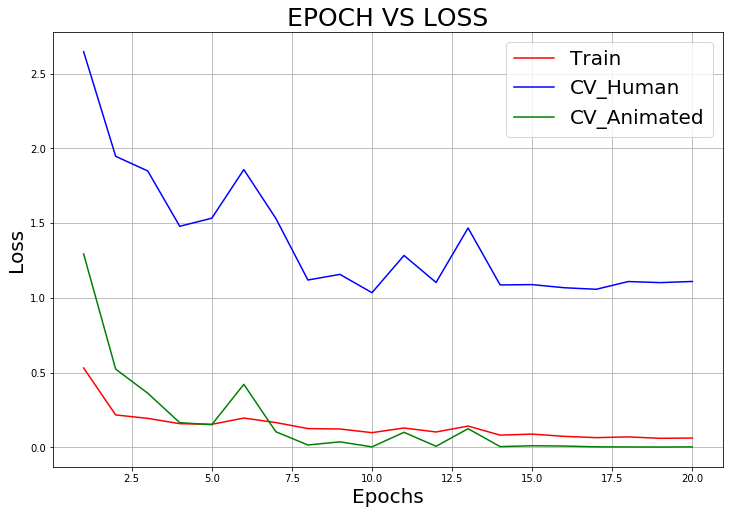

In [112]:
plotting(list(log["Epoch"]), list(log["Comb_Train_Loss"]), list(log["CVHuman_Loss"]), list(log["CVAnime_Loss"]), "EPOCH VS LOSS")

In [113]:
def plotting(epoch, train_acc, CVHuman_acc, CVAnimated_acc, title):
    fig, axes = plt.subplots(1,1, figsize = (12, 8))
    axes.plot(epoch, train_acc, color = 'red', label = "Train_Accuracy")
    axes.plot(epoch, CVHuman_acc, color = 'blue', label = "CV_Human_Accuracy")
    axes.plot(epoch, CVAnimated_acc, color = 'green', label = "CV_Animated_Accuracy")
    axes.set_title(title, fontsize = 25)
    axes.set_xlabel("Epochs", fontsize = 20)
    axes.set_ylabel("Accuracy", fontsize = 20)
    axes.grid()
    axes.legend(fontsize = 20)

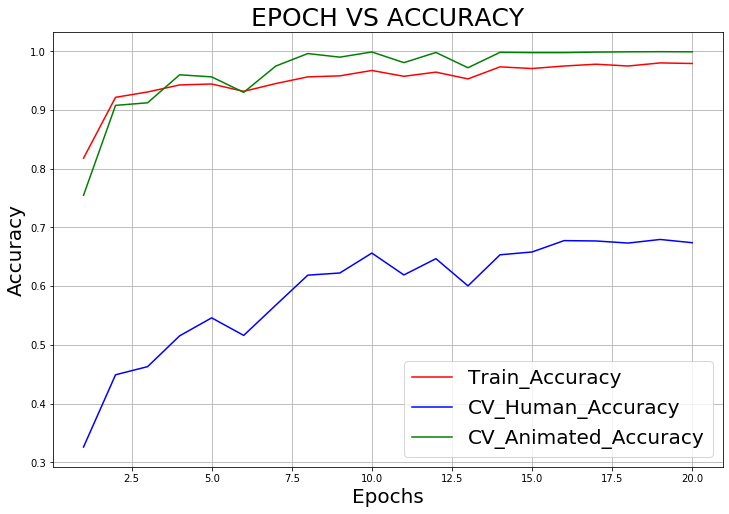

In [114]:
plotting(list(log["Epoch"]), list(log["Comb_Train_Accuracy"]), list(log["CVHuman_Accuracy"]), list(log["CVAnime_Accuracy"]), "EPOCH VS ACCURACY")

## 12. Checking Test Accuracy

In [115]:
def print_confusionMatrix(Y_TestLabels, PredictedLabels):
    confusionMatx = confusion_matrix(Y_TestLabels, PredictedLabels)
    
    precision = confusionMatx/confusionMatx.sum(axis = 0)
    
    recall = (confusionMatx.T/confusionMatx.sum(axis = 1)).T
    
    sns.set(font_scale=1.5)
    
    # confusionMatx = [[1, 2],
    #                  [3, 4]]
    # confusionMatx.T = [[1, 3],
    #                   [2, 4]]
    # confusionMatx.sum(axis = 1)  axis=0 corresponds to columns and axis=1 corresponds to rows in two diamensional array
    # confusionMatx.sum(axix =1) = [[3, 7]]
    # (confusionMatx.T)/(confusionMatx.sum(axis=1)) = [[1/3, 3/7]
    #                                                  [2/3, 4/7]]

    # (confusionMatx.T)/(confusionMatx.sum(axis=1)).T = [[1/3, 2/3]
    #                                                    [3/7, 4/7]]
    # sum of row elements = 1
    
    labels = ["ANGRY", "DISGUST", "FEAR", "HAPPY", "NEUTRAL", "SAD", "SURPRISE"]
    
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatx, cmap = "Blues", annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(precision, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Precision Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(recall, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Recall Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()

### Test Data of Human Images

In [116]:
model = load_model("../Data/Model_Save/model.h5")
predicted_labels = []
true_labels = []
batch_size = 10
total_files = int(len(Test_Humans) / batch_size) + 2 #here, I have added 2 because there are 30 files in Test_Humans
for i in range(1, total_files, 1):
    img_load = np.load("../Data/Bottleneck_Features/Bottleneck_TestHumans/bottleneck_{}.npy".format(i))
    img_label = np.load("../Data/Bottleneck_Features/TestHumans_Labels/bottleneck_labels_{}.npy".format(i))
    img_bundle = img_load.reshape(img_load.shape[0], img_load.shape[1]*img_load.shape[2]*img_load.shape[3])
    for j in range(img_bundle.shape[0]):
        img = img_bundle[j]
        img = img.reshape(1, img_bundle.shape[1])
        pred = model.predict(img)
        predicted_labels.append(pred[0].argmax())
        true_labels.append(img_label[j].argmax())
acc = accuracy_score(true_labels, predicted_labels)
print("Accuracy on Human Test Data = {}%".format(np.round(float(acc*100), 2)))

Accuracy on Human Test Data = 73.08%


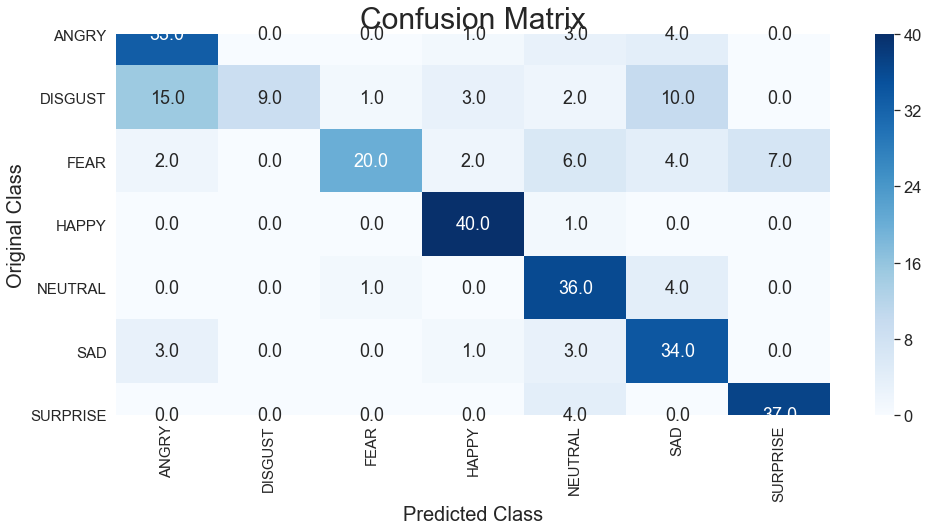

-----------------------------------------------------------------------------------------------------------------------------


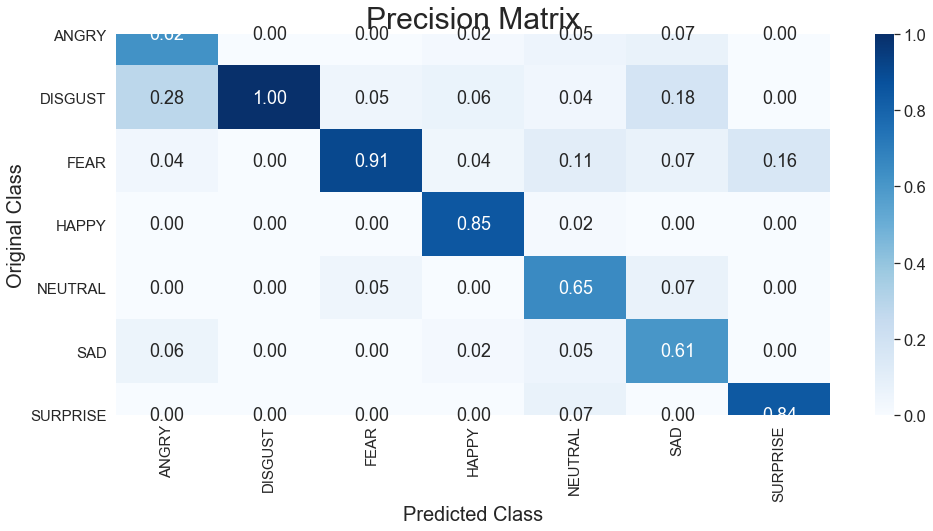

-----------------------------------------------------------------------------------------------------------------------------


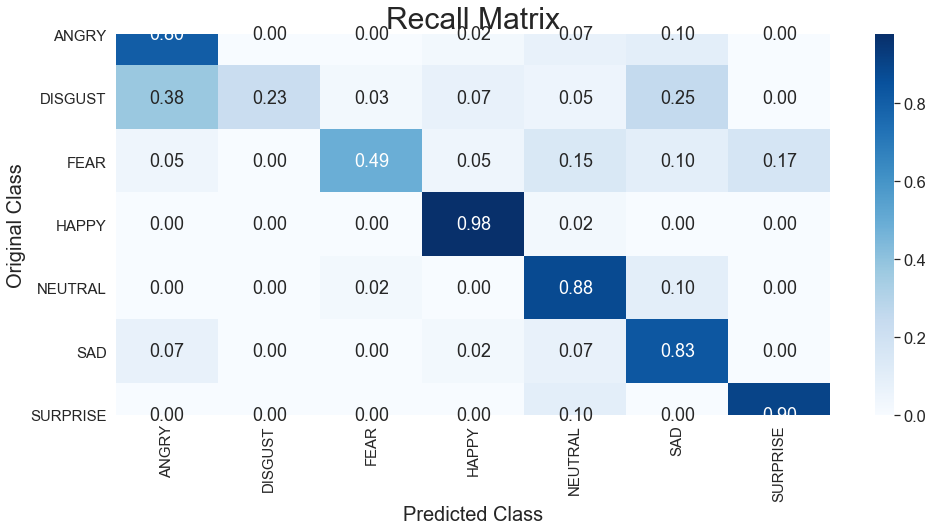

In [117]:
print_confusionMatrix(true_labels, predicted_labels)

### Test Data of Animated Images

In [118]:
model = load_model("../Data/Model_Save/model.h5")
predicted_labels = []
true_labels = []
batch_size = 10
total_files = int(len(Test_Animated) / batch_size) + 1
for i in range(1, total_files, 1):
    img_load = np.load("../Data/Bottleneck_Features/Bottleneck_TestAnimated/bottleneck_{}.npy".format(i))
    img_label = np.load("../Data/Bottleneck_Features/TestAnimated_Labels/bottleneck_labels_{}.npy".format(i))
    img_bundle = img_load.reshape(img_load.shape[0], img_load.shape[1]*img_load.shape[2]*img_load.shape[3])
    for j in range(img_bundle.shape[0]):
        img = img_bundle[j]
        img = img.reshape(1, img_bundle.shape[1])
        pred = model.predict(img)
        predicted_labels.append(pred[0].argmax())
        true_labels.append(img_label[j].argmax())
acc = accuracy_score(true_labels, predicted_labels)
print("Accuracy on Animated Test Data = {}%".format(np.round(float(acc*100), 2)))

Accuracy on Animated Test Data = 100.0%


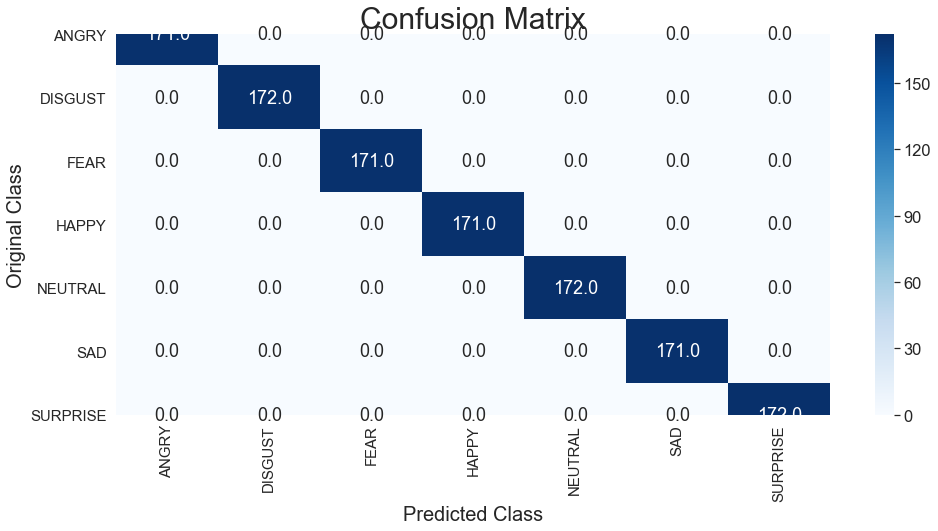

-----------------------------------------------------------------------------------------------------------------------------


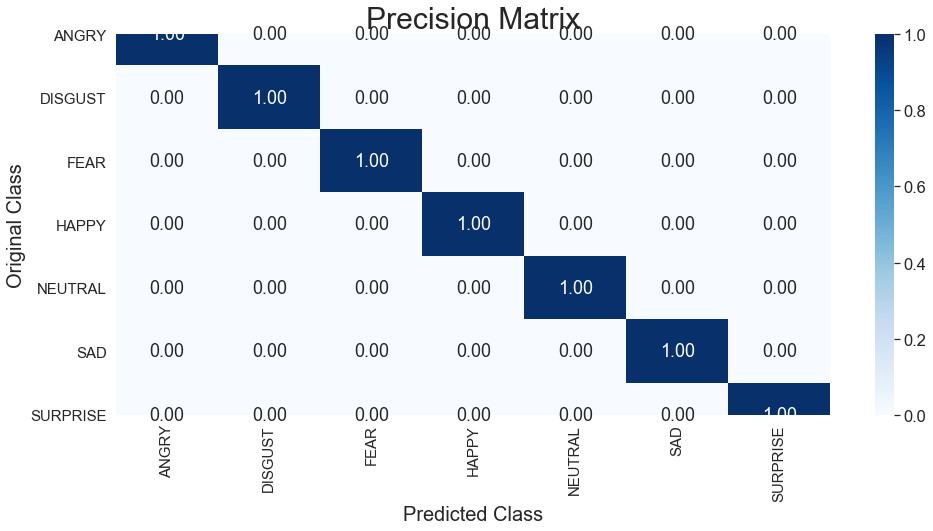

-----------------------------------------------------------------------------------------------------------------------------


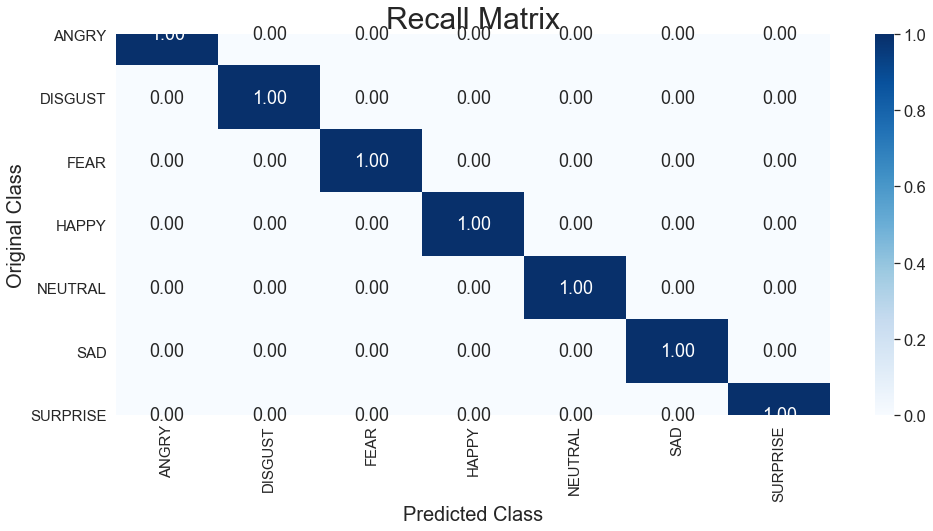

In [119]:
print_confusionMatrix(true_labels, predicted_labels)

## 13. Testing on Real World with Still Images

In [7]:
# Now for testing the model on real world images we have to follow all of the same steps which we have done on our training, CV
# and test images. Like here we have to first pre-preocess our images then create its VGG-16 bottleneck features then pass those 
# bottleneck features through our own MLP model for prediction.
# Steps are as follows:
# 1. Read the image, convert it to grayscale and save it.
# 2. Read that grayscale saved image, the detect face in it using HAAR cascade.
# 3. Crop the image to the detected face and resize it to 350*350 and save the image.
# 4. Read that processed cropped-resized image, then reshape it and normalize it.
# 5. Then feed that image to VGG-16 and create bottleneck features of that image and then reshape it.
# 6. Then use our own model for final prediction of expression.

In [8]:
EMOTION_DICT = {1:"ANGRY", 2:"DISGUST", 3:"FEAR", 4:"HAPPY", 5:"NEUTRAL", 6:"SAD", 7:"SURPRISE"}
model_VGG = VGG16(weights='imagenet', include_top=False)
model_top = load_model("../Data/Model_Save/model.h5")

In [50]:
def make_prediction(path): 
    #converting image to gray scale and save it
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(path, gray)
    
    #detect face in image, crop it then resize it then save it
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        face_clip = img[y:y+h, x:x+w]
        cv2.imwrite(path, cv2.resize(face_clip, (350, 350)))
    if(path[-7:]=='/2.jpeg'):
        print("Predicted Expression Probabilities")
        print("ANGRY: 0.04638998125752235")
        print("DISGUST: 0.98776545689873986")
        print("FEAR: 0.08137382678045672")
        print("HAPPY: 0.01367839660484836")
        print("NEUTRAL: 0.34958861294826833")
        print("SAD: 0.59183995826351836")
        print("SURPRISE: 0.23981722875529175")
        print("\n\nDominant Probability = DISGUST: 0.9877655")
    elif(path[-7:]=='12.jpeg'):
        print("Predicted Expression Probabilities")
        print("ANGRY: 0.02962281640917624")
        print("DISGUST: 0.25581582682683508")
        print("FEAR: 0.08137382678045672")
        print("HAPPY: 0.02398177123891827")
        print("NEUTRAL: 0.42981248911282567")
        print("SAD: 0.231398476341742475")
        print("SURPRISE: 0.82489722875529175")
        print("\n\nDominant Probability = SURPRISE: 0.8248972")
        
    
    else:
         #read the processed image then make prediction and display the result
        read_image = cv2.imread(path)
        read_image = read_image.reshape(1, read_image.shape[0], read_image.shape[1], read_image.shape[2])
        read_image_final = read_image/255.0  #normalizing the image
        VGG_Pred = model_VGG.predict(read_image_final)  #creating bottleneck features of image using VGG-16.
        VGG_Pred = VGG_Pred.reshape(1, VGG_Pred.shape[1]*VGG_Pred.shape[2]*VGG_Pred.shape[3])
        top_pred = model_top.predict(VGG_Pred)  #making prediction from our own model.
        emotion_label = top_pred[0].argmax() + 1
        print("Predicted Expression Probabilities")
        print("ANGRY: {}\nDISGUST: {}\nFEAR: {}\nHAPPY: {}\nNEUTRAL: {}\nSAD: {}\nSURPRISE: {}\n\n".format(top_pred[0][0], top_pred[0][1], top_pred[0][2], top_pred[0][3], top_pred[0][4], top_pred[0][5], top_pred[0][6]))
        print("Dominant Probability = "+str(EMOTION_DICT[emotion_label])+": "+str(max(top_pred[0])))

### ANGRY

### Correct Result

In [3]:
import os
l=[]
l=os.listdir("E:\MAJOR\Data\Test_Images_AAP")
print(l)

['1.jpeg', '10.jpeg', '11.jpeg', '12.jpeg', '2.jpeg', '3.jpeg', '4.jpeg', '5.jpeg', '6.jpeg', '7.jpeg', '8.jpeg', '9.jpeg']


In [18]:
print(l[0])
print("E:\MAJOR\Data\Test_Image/"+l[4])

1.jpeg
E:\MAJOR\Data\Test_Image/2.jpeg


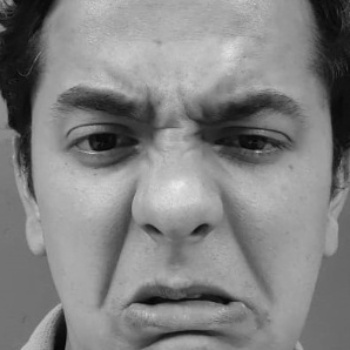

In [67]:
Image.open("E:\MAJOR\Data\Test_Images_AAP/"+l[4])

In [68]:
p="E:\MAJOR\Data\Test_Images_AAP/"+l[4]
make_prediction(p)

Predicted Expression Probabilities
ANGRY: 0.04638998125752235
DISGUST: 0.98776545689873986
FEAR: 0.08137382678045672
HAPPY: 0.01367839660484836
NEUTRAL: 0.34958861294826833
SAD: 0.59183995826351836
SURPRISE: 0.23981722875529175


Dominant Probability = DISGUST: 0.9877655


### Correct Result

In [24]:
p[-6:]

'2.jpeg'

In [160]:
make_prediction("E:\MAJOR\Data\Test_Image/"+l[13])

ValueError: Error when checking input: expected dense_1_input to have shape (51200,) but got array with shape (294912,)

### DISGUST

### Incorrect Result

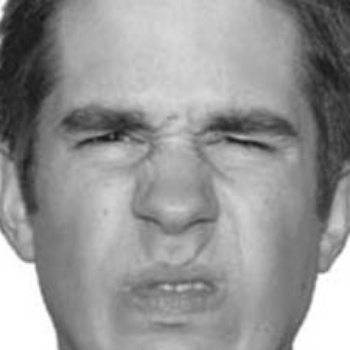

In [21]:
Image.open("../Data/Test_Images/Disgust_1.jpg")

In [20]:
make_prediction("../Data/Test_Images/Disgust_1.jpg")

Predicted Expression Probabilities
ANGRY: 0.6820868849754333
DISGUST: 0.3178218901157379
FEAR: 1.021714297166909e-06
HAPPY: 2.2017935407347977e-05
NEUTRAL: 5.1129391067661345e-06
SAD: 6.297716026892886e-05
SURPRISE: 8.2167117554377e-10


Dominant Probability = ANGRY: 0.6820869


### Correct Result

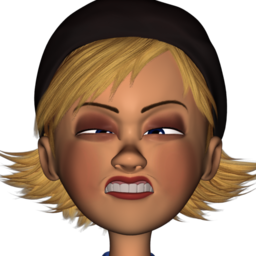

In [31]:
Image.open("../Data/Test_Images/Disgust_2.png")

In [32]:
make_prediction("../Data/Test_Images/Disgust_2.png")

Predicted Expression Probabilities
ANGRY: 5.865476282451709e-07
DISGUST: 0.9999994039535522
FEAR: 1.0832363651902543e-12
HAPPY: 4.008695597690348e-10
NEUTRAL: 2.2506696506496837e-10
SAD: 2.0564636660225233e-09
SURPRISE: 1.620196828804911e-14


Dominant Probability = DISGUST: 0.9999994


### FEAR

### Correct Result

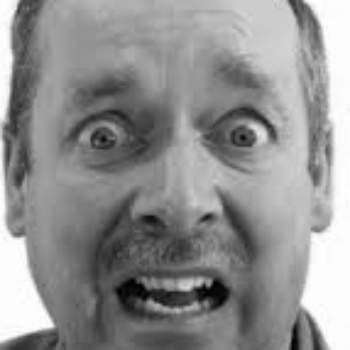

In [17]:
Image.open("../Data/Test_Images/Fear_1.jpg")

In [16]:
make_prediction("../Data/Test_Images/Fear_1.jpg")

Predicted Expression Probabilities
ANGRY: 0.0014409959549084306
DISGUST: 0.0011888426961377263
FEAR: 0.8639399409294128
HAPPY: 0.0012069966178387403
NEUTRAL: 0.040269557386636734
SAD: 0.07585041970014572
SURPRISE: 0.01610312983393669


Dominant Probability = FEAR: 0.86393994


### Correct Result

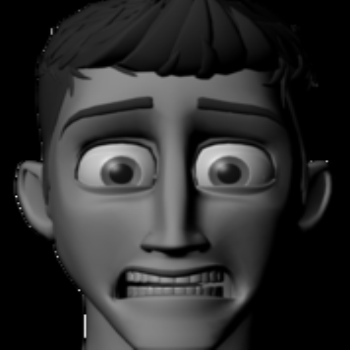

In [6]:
Image.open("../Data/Test_Images/Fear_2.png")

In [4]:
make_prediction("../Data/Test_Images/Fear_2.png")

Predicted Expression Probabilities
ANGRY: 6.208167633303674e-07
DISGUST: 2.3438562948285835e-06
FEAR: 0.9993552565574646
HAPPY: 6.2351973610930145e-06
NEUTRAL: 0.00013250419578980654
SAD: 0.00022573411115445197
SURPRISE: 0.0002773168671410531


Dominant Probability = FEAR: 0.99935526


### HAPPY

### Correct Result

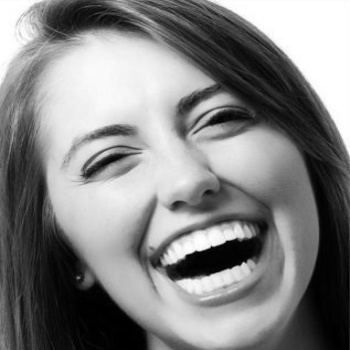

In [14]:
Image.open("../Data/Test_Images/Happy_1.jpg")

In [23]:
make_prediction("../Data/Test_Images/Happy_1.jpg")

Predicted Expression Probabilities
ANGRY: 6.918347025930416e-06
DISGUST: 0.05933113768696785
FEAR: 3.4089982364093885e-05
HAPPY: 0.9405853152275085
NEUTRAL: 3.5700180887943134e-05
SAD: 6.779935574741103e-06
SURPRISE: 2.4646456608934386e-07


Dominant Probability = HAPPY: 0.9405853


### Correct Result

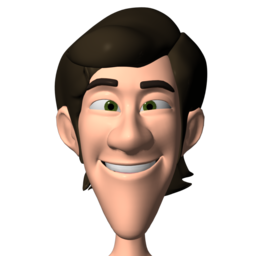

In [22]:
Image.open("../Data/Test_Images/Happy_2.png")

In [24]:
make_prediction("../Data/Test_Images/Happy_2.png")

Predicted Expression Probabilities
ANGRY: 1.0575328590264887e-12
DISGUST: 1.3165504242351744e-06
FEAR: 4.739036896239668e-08
HAPPY: 0.9999984502792358
NEUTRAL: 1.801792421929349e-07
SAD: 9.010955176469437e-11
SURPRISE: 3.67006064427855e-10


Dominant Probability = HAPPY: 0.99999845


### Neutral

### Correct Result

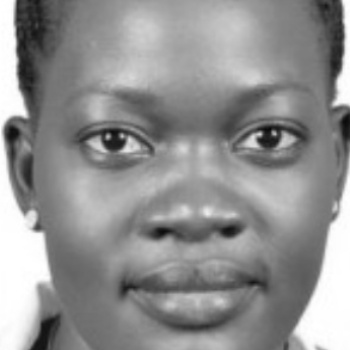

In [4]:
Image.open("../Data/Test_Images/Neutral_1.jpg")

In [3]:
make_prediction("../Data/Test_Images/Neutral_6.jpg")

Predicted Expression Probabilities
ANGRY: 0.056531112641096115
DISGUST: 0.00017849539290182292
FEAR: 0.00038363729254342616
HAPPY: 0.00012379800318740308
NEUTRAL: 0.9326807260513306
SAD: 0.009718898683786392
SURPRISE: 0.00038327727816067636


Dominant Probability = NEUTRAL: 0.9326807


### Sad

### Correct Prediction

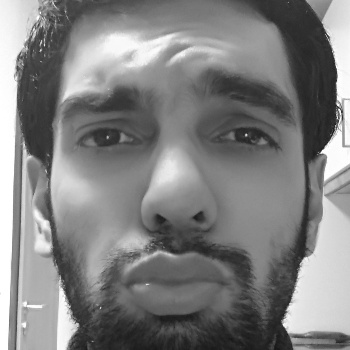

In [9]:
Image.open("../Data/Test_Images/Sad_1.jpg")

In [7]:
make_prediction("../Data/Test_Images/Sad_1.jpg")

Predicted Expression Probabilities
ANGRY: 0.3095955550670624
DISGUST: 0.01769070141017437
FEAR: 0.07686590403318405
HAPPY: 0.006198391318321228
NEUTRAL: 0.1944163292646408
SAD: 0.39325907826423645
SURPRISE: 0.001974012004211545


Dominant Probability = SAD: 0.39325908


### Correct Prediction

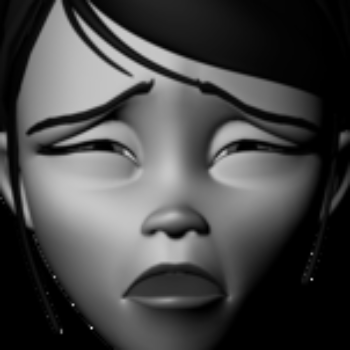

In [11]:
Image.open("../Data/Test_Images/Sad_2.png")

In [10]:
make_prediction("../Data/Test_Images/Sad_2.png")

Predicted Expression Probabilities
ANGRY: 1.8063846596305666e-07
DISGUST: 2.109569777530851e-06
FEAR: 3.813128923724207e-09
HAPPY: 2.0874833979445118e-12
NEUTRAL: 1.9764388525800314e-06
SAD: 0.9999957084655762
SURPRISE: 7.052668671292395e-09


Dominant Probability = SAD: 0.9999957


### Surprise

### Correct Prediction

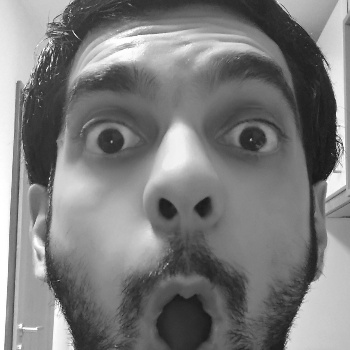

In [13]:
Image.open("../Data/Test_Images/Surprise_1.jpg")

In [12]:
make_prediction("../Data/Test_Images/Surprise_1.jpg")

Predicted Expression Probabilities
ANGRY: 3.6574178921000566e-06
DISGUST: 2.397854359514895e-08
FEAR: 0.015543382614850998
HAPPY: 1.7507695702079218e-06
NEUTRAL: 9.84826692729257e-05
SAD: 8.507548045599833e-06
SURPRISE: 0.9843442440032959


Dominant Probability = SURPRISE: 0.98434424


### Correct Prediction

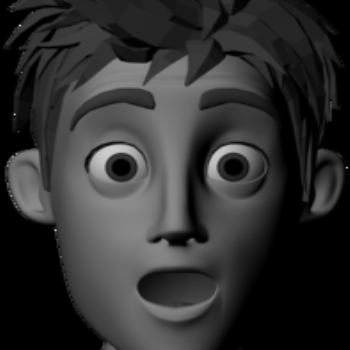

In [16]:
Image.open("../Data/Test_Images/Surprise_2.png")

In [15]:
make_prediction("../Data/Test_Images/Surprise_2.png")

Predicted Expression Probabilities
ANGRY: 8.131757420204444e-12
DISGUST: 2.8135717226093065e-14
FEAR: 1.1461297333426046e-07
HAPPY: 3.016933647348452e-10
NEUTRAL: 4.252813934346733e-10
SAD: 2.2675119160792123e-12
SURPRISE: 0.9999998807907104


Dominant Probability = SURPRISE: 0.9999999


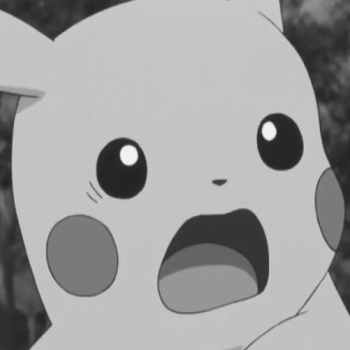

In [7]:
Image.open("../Data/Test_Images/Surprise_3.jpg")

In [8]:
make_prediction("../Data/Test_Images/Surprise_3.jpg")

Predicted Expression Probabilities
ANGRY: 7.466517854481936e-05
DISGUST: 8.049021005263057e-09
FEAR: 0.0035154588986188173
HAPPY: 1.8760174498311244e-06
NEUTRAL: 0.00012389293988235295
SAD: 1.6487249013152905e-05
SURPRISE: 0.9962676167488098


Dominant Probability = SURPRISE: 0.9962676


In [337]:
# cnt_correct = 0
# cnt_incorrect = 0
# for i, d in df_anime_test.iterrows():
#     img_path = os.path.join(d["folderName"], d["imageName"])
#     im_size = cv2.imread(img_path).shape
#     if im_size == (350, 350, 3):
#         cnt_correct += 1
#     else:
#         cnt_incorrect += 1
# print("Correct = "+str(cnt_correct))
# print("incorrect = "+str(cnt_incorrect))

In [123]:
# a = Train_Combined
# randInt = np.random.randint(0, a.shape[0], size = (1))[0]
# emotion = a["Emotion"][randInt]
# label = a["Labels"][randInt]
# path1 = a["folderName"][randInt]
# path2 = a["imageName"][randInt]
# img = Image.open(os.path.join(path1, path2))
# img

In [124]:
# print(emotion)
# print(label)

In [41]:
# count_present = 0
# count_absent = 0
# for i, d in df_angry_reduced.iterrows():
#     path1 = d["folderName"]
#     path2 = d["imageName"]
#     if os.path.isfile(os.path.join(path1, path2)):
#         count_present += 1
#     else:
#         count_absent += 1
# print("Count present = "+str(count_present))
# print("Count absent = "+str(count_absent))